# Librairies

In [1]:
# Basic librairies (all the librairies used for the machine learning are imported in the tools.py file)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Data importation
data = pd.read_sas("datas/total_red.sas7bdat")

/opt/anaconda3/envs/cvxpy_env/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from DreamLib.linear_models import *
from DreamLib.processing_datas import *
import datas.selected_columns_24 as cl

# Models Formulas


## Linear Regression
LinearRegression fits a linear model with coefficients $w = (w_1, ..., w_p)$ to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation. Mathematically it solves a problem of the form:

$$
\underset{\omega}{\text{min}}||X{\omega}-y||_{2}^{2}
$$

## Ridge Regression
Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of the coefficients. The ridge coefficients minimize a penalized residual sum of squares:
$$\min_{w} || X w - y||_2^2 + \alpha ||w||_2^2$$

The complexity parameter 
α
≥
0
 controls the amount of shrinkage: the larger the value of $\alpha>0$, the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.

## Lasso
The Lasso is a linear model that estimates sparse coefficients. It is useful in some contexts due to its tendency to prefer solutions with fewer non-zero coefficients, effectively reducing the number of features upon which the given solution is dependent. For this reason, Lasso and its variants are fundamental to the field of compressed sensing. Under certain conditions, it can recover the exact set of non-zero coefficients.

Mathematically, it consists of a linear model with an added regularization term. The objective function to minimize is:

$$\min_{w} { \frac{1}{2n_{\text{samples}}} ||X w - y||_2 ^ 2 + \alpha ||w||_1}$$

## Elastic Net
ElasticNet is a linear regression model trained with both $\ell_1$ and $\ell_2$-norm regularization of the coefficients. This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge. We control the convex combination of $\ell_1$ and $\ell_2$ using the l1_ratio parameter.

Elastic-net is useful when there are multiple features that are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.

A practical advantage of trading-off between Lasso and Ridge is that it allows Elastic-Net to inherit some of Ridge’s stability under rotation.

The objective function to minimize is in this case:
$$\min_{w} { \frac{1}{2n_{\text{samples}}} ||X w - y||_2 ^ 2 + \alpha \rho ||w||_1 +
\frac{\alpha(1-\rho)}{2} ||w||_2 ^ 2}$$

The class ElasticNetCV can be used to set the parameters alpha ($\alpha$) and l1_ratio ($\rho$) by cross-validation.

# Focus on Chronique CHR2

In [10]:
chronique=b'CHR2'
start = 1
period = 24
norm = "MinMax"
split = 0.2
# Useful to plot the model 
X_train, X_test, y_train, y_test,X_validation = clean_data(data,start,chronique=chronique,period=period,col_used=cl.col_2_corr,split=split,norm=norm)
index = pd.concat([X_train, X_test], axis=1).index

In [16]:
print(y_train.shape,y_test.shape)
print(X_train.shape,X_test.shape)
print(index.shape)

(20,) (5,)
(20, 4) (5, 4)
(25,)


## Machine Learning
We will focus on all the different features selection and after we choose the best model, with the best features we will focus on doing a grid search on this model

### Correlation Features

In [11]:
X_train, X_test, y_train, y_test,X_validation = clean_data(data,start,chronique=chronique,period=period,col_used=cl.col_2_corr,split=split,norm=norm)
summary = summary_ml(X_train,y_train,X_test,y_test)
summary

/opt/anaconda3/envs/cvxpy_env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


rmse           mse       mae        r2
Index                                                            
XGBRegressor           0.000299  8.962482e-08  0.000245 -2.027865
Ridge                  0.000307  9.423481e-08  0.000288 -2.183609
CatBoostRegressor      0.000348  1.207824e-07  0.000317 -3.080486
LinearRegression       0.000359  1.287064e-07  0.000323 -3.348188
KNeighborsRegressor    0.000384  1.474400e-07  0.000356 -3.981081
DecisionTreeRegressor  0.000449  2.020000e-07  0.000380 -5.824324
LinearSVR              0.000458  2.096803e-07  0.000426 -6.083793

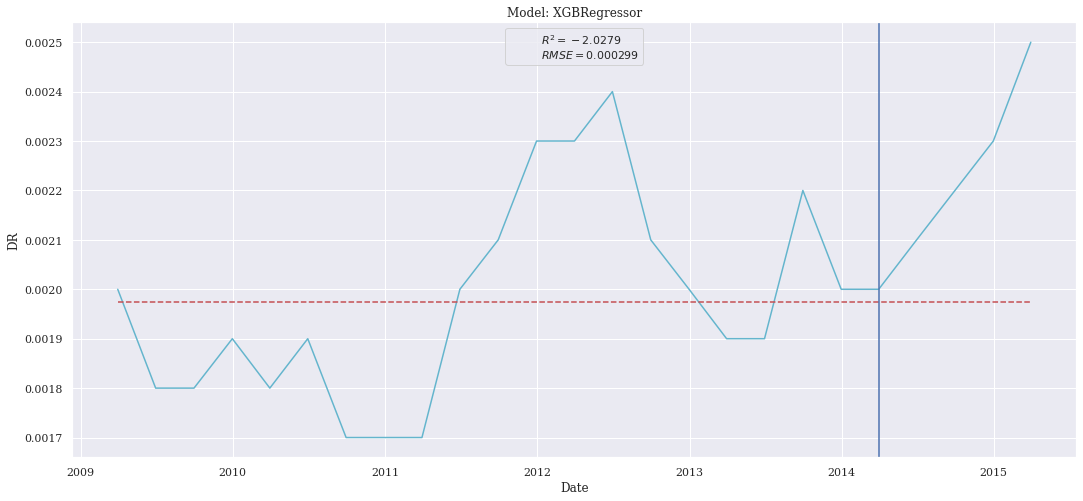

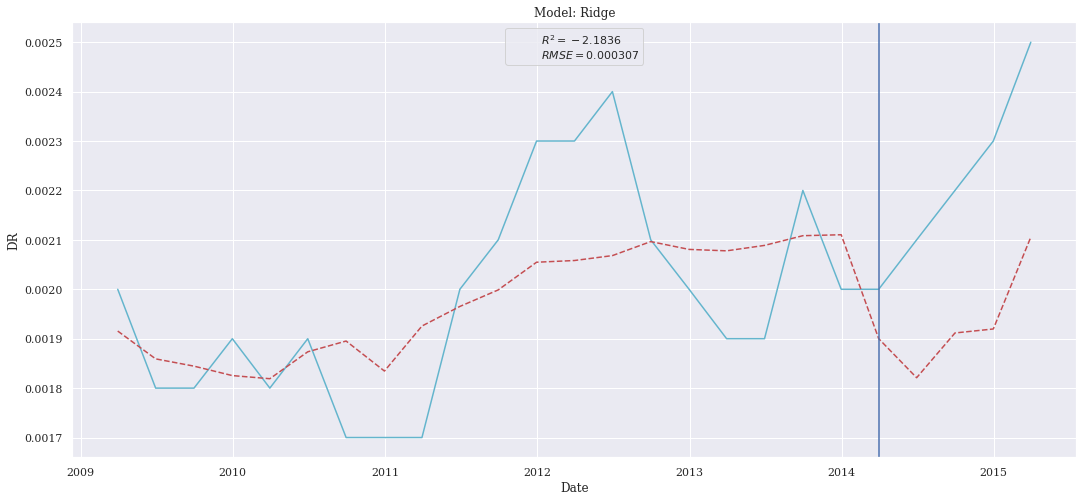

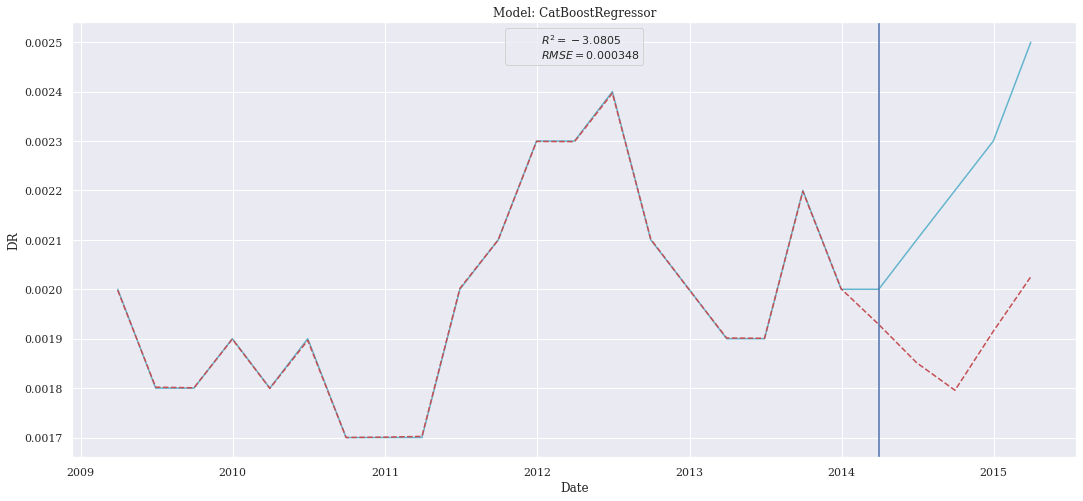

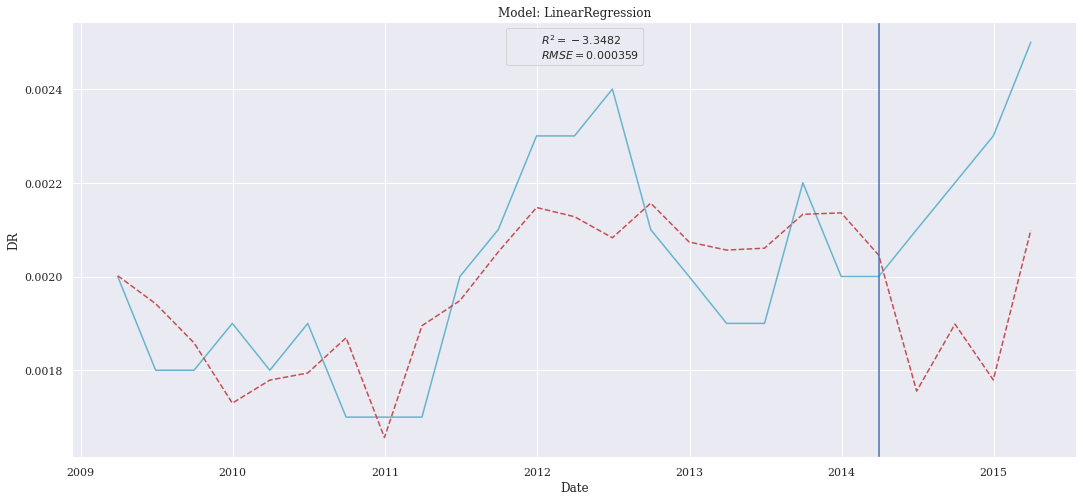

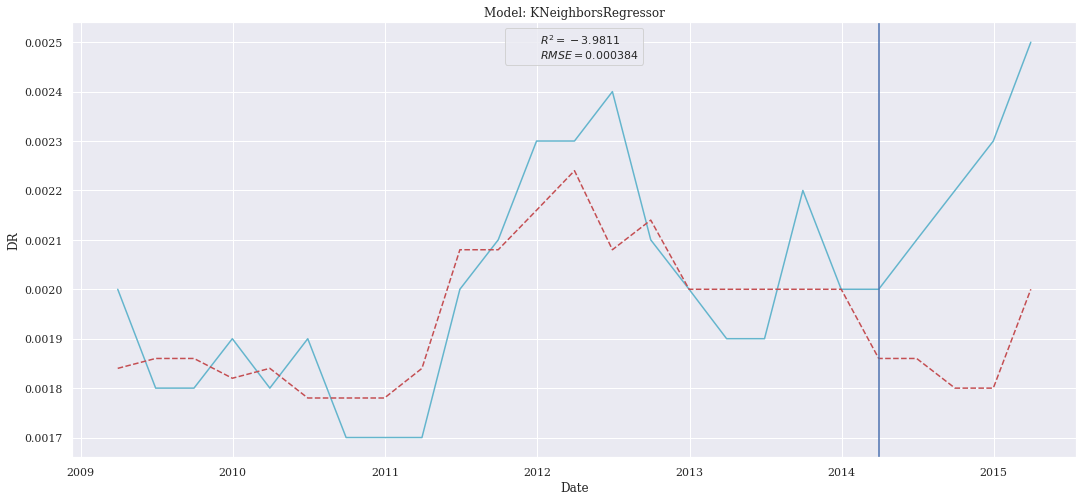

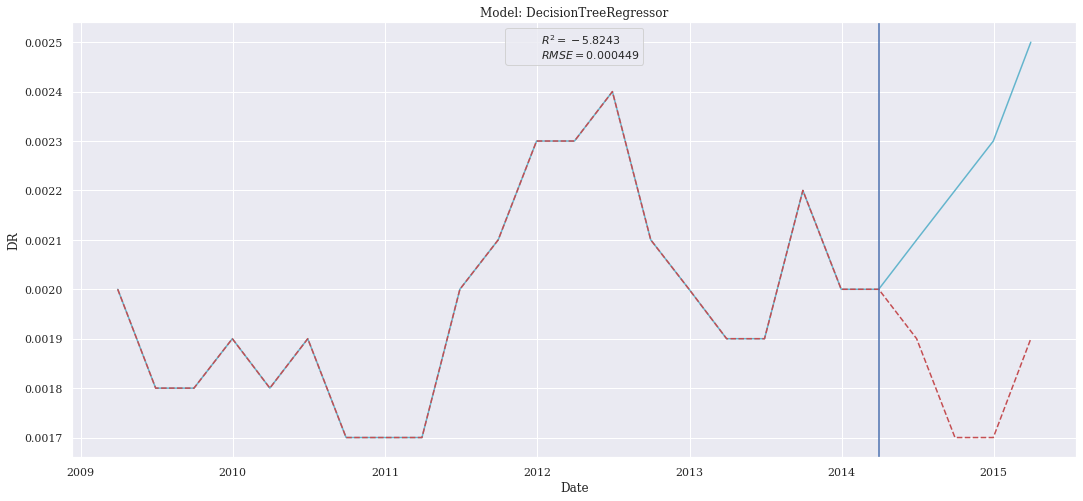

/opt/anaconda3/envs/cvxpy_env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/envs/cvxpy_env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


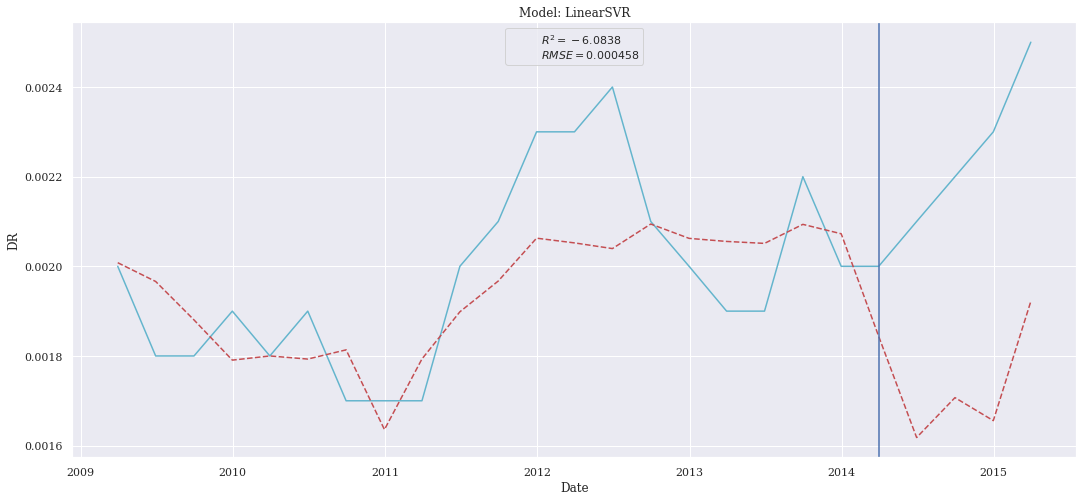

In [17]:
for i in range(summary.shape[0]): 
  y_train_pred = y_pred(X_train,y_train,X_train,y_train,model=summary.index[i])
  y_test_pred = y_pred(X_train,y_train,X_test,y_test,model=summary.index[i])
  plot_pred_detail(y_train,y_test,y_train_pred,y_test_pred,index,name_model=summary.index[i],df_score=summary)

### Low Variance Features

In [18]:
X_train, X_test, y_train, y_test,X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_2_low_var,split=split,norm=norm)
summary = summary_ml(X_train,y_train,X_test,y_test)
summary

/opt/anaconda3/envs/cvxpy_env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


rmse           mse       mae        r2
Index                                                            
Ridge                  0.000298  8.882235e-08  0.000204 -2.000755
XGBRegressor           0.000299  8.962482e-08  0.000245 -2.027865
KNeighborsRegressor    0.000303  9.192000e-08  0.000236 -2.105405
CatBoostRegressor      0.000305  9.274791e-08  0.000237 -2.133375
DecisionTreeRegressor  0.000463  2.140000e-07  0.000420 -6.229730
LinearSVR              0.000555  3.077067e-07  0.000397 -9.395497
LinearRegression       0.000561  3.151226e-07  0.000413 -9.646035

ValueError: x and y must have same first dimension, but have shapes (24,) and (25,)

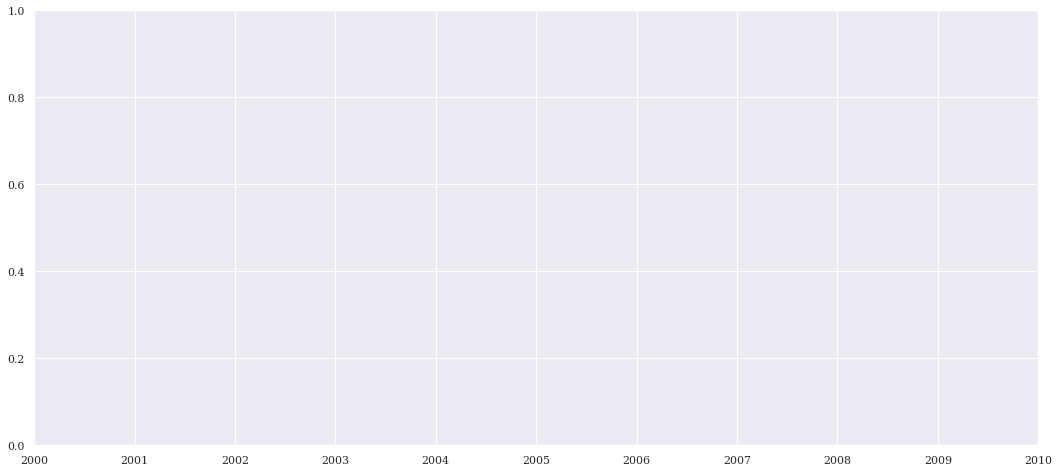

In [19]:
for i in range(summary.shape[0]): 
  y_train_pred = y_pred(X_train,y_train,X_train,y_train,model=summary.index[i])
  y_test_pred = y_pred(X_train,y_train,X_test,y_test,model=summary.index[i])
  plot_pred_detail(y_train,y_test,y_train_pred,y_test_pred,index[start:],name_model=summary.index[i],df_score=summary)

### KBest Features

In [21]:
X_train, X_test, y_train, y_test,X_validation = clean_data(data,start,chronique=chronique,period=period,col_used=cl.col_2_kbest,split=split,norm=norm)
summary = summary_ml(X_train,y_train,X_test,y_test)
summary

/opt/anaconda3/envs/cvxpy_env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


rmse           mse       mae           r2
Index                                                               
CatBoostRegressor      0.000289  8.324605e-08  0.000239    -1.812367
XGBRegressor           0.000299  8.962482e-08  0.000245    -2.027865
KNeighborsRegressor    0.000310  9.592000e-08  0.000228    -2.240541
DecisionTreeRegressor  0.000341  1.160000e-07  0.000320    -2.918919
Ridge                  0.000343  1.173983e-07  0.000228    -2.966159
LinearSVR              0.000975  9.507855e-07  0.000883   -31.121133
LinearRegression       0.007927  6.284397e-05  0.005915 -2122.107058

ValueError: x and y must have same first dimension, but have shapes (24,) and (25,)

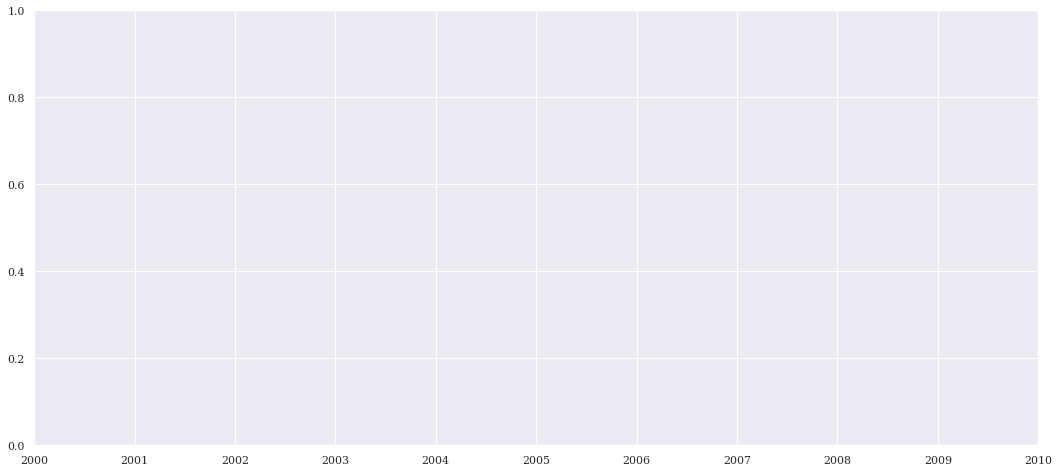

In [22]:
for i in range(summary.shape[0]): 
  y_train_pred = y_pred(X_train,y_train,X_train,y_train,model=summary.index[i])
  y_test_pred = y_pred(X_train,y_train,X_test,y_test,model=summary.index[i])
  plot_pred_detail(y_train,y_test,y_train_pred,y_test_pred,index[start:],name_model=summary.index[i],df_score=summary)

### Recursive Features

In [25]:
X_train, X_test, y_train, y_test,X_validation = clean_data(data,start,chronique=chronique,period=period,col_used=cl.col_2_recur,split=split,norm=norm)
summary = summary_ml(X_train,y_train,X_test,y_test)
summary

/opt/anaconda3/envs/cvxpy_env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


rmse           mse       mae         r2
Index                                                             
DecisionTreeRegressor  0.000279  7.800000e-08  0.000260  -1.635135
XGBRegressor           0.000299  8.962482e-08  0.000245  -2.027865
CatBoostRegressor      0.000301  9.046604e-08  0.000254  -2.056285
Ridge                  0.000308  9.458639e-08  0.000211  -2.195486
KNeighborsRegressor    0.000405  1.643200e-07  0.000360  -4.551351
LinearRegression       0.000532  2.828244e-07  0.000450  -8.554878
LinearSVR              0.000598  3.573600e-07  0.000503 -11.072972

ValueError: x and y must have same first dimension, but have shapes (24,) and (25,)

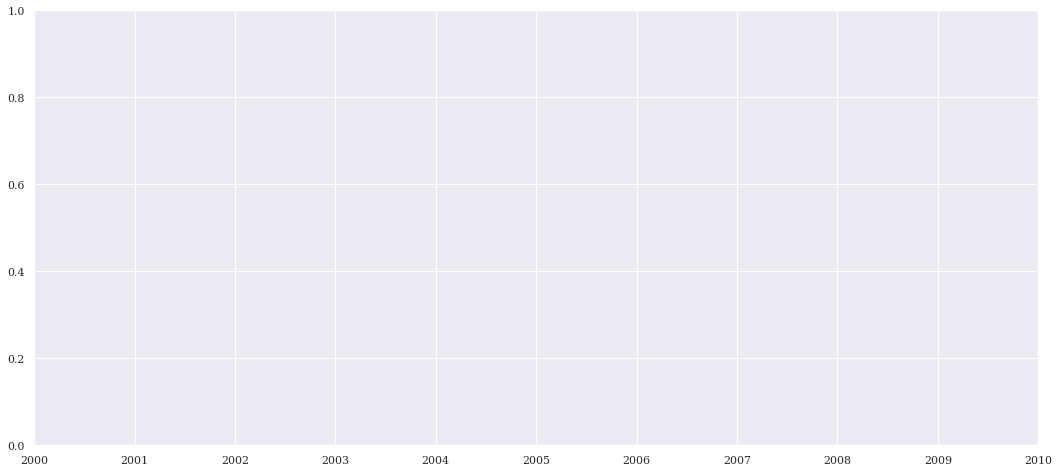

In [26]:
for i in range(summary.shape[0]): 
  y_train_pred = y_pred(X_train,y_train,X_train,y_train,model=summary.index[i])
  y_test_pred = y_pred(X_train,y_train,X_test,y_test,model=summary.index[i])
  plot_pred_detail(y_train,y_test,y_train_pred,y_test_pred,index[start:],name_model=summary.index[i],df_score=summary)

### SelectFromModel Features

In [27]:
X_train, X_test, y_train, y_test,X_validation = clean_data(data,start,chronique=chronique,period=period,col_used=cl.col_2_sfm,split=split,norm=norm)
summary = summary_ml(X_train,y_train,X_test,y_test)
summary

/opt/anaconda3/envs/cvxpy_env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


rmse           mse       mae         r2
Index                                                             
XGBRegressor           0.000299  8.962482e-08  0.000245  -2.027865
DecisionTreeRegressor  0.000335  1.120000e-07  0.000320  -2.783784
CatBoostRegressor      0.000338  1.140099e-07  0.000274  -2.851685
KNeighborsRegressor    0.000351  1.230400e-07  0.000288  -3.156757
Ridge                  0.000425  1.802498e-07  0.000316  -5.089521
LinearSVR              0.001079  1.163901e-06  0.000898 -38.320969
LinearRegression       0.001455  2.117167e-06  0.001190 -70.525921

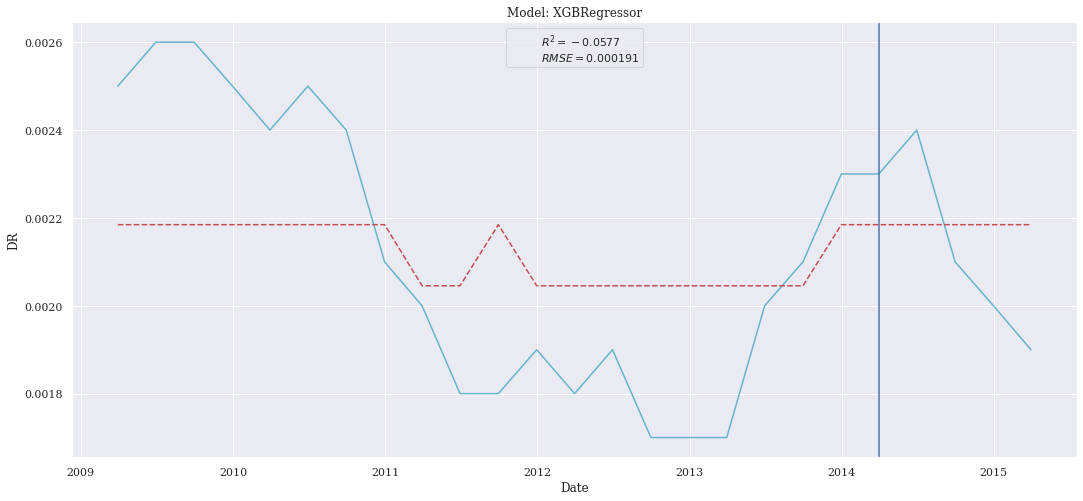

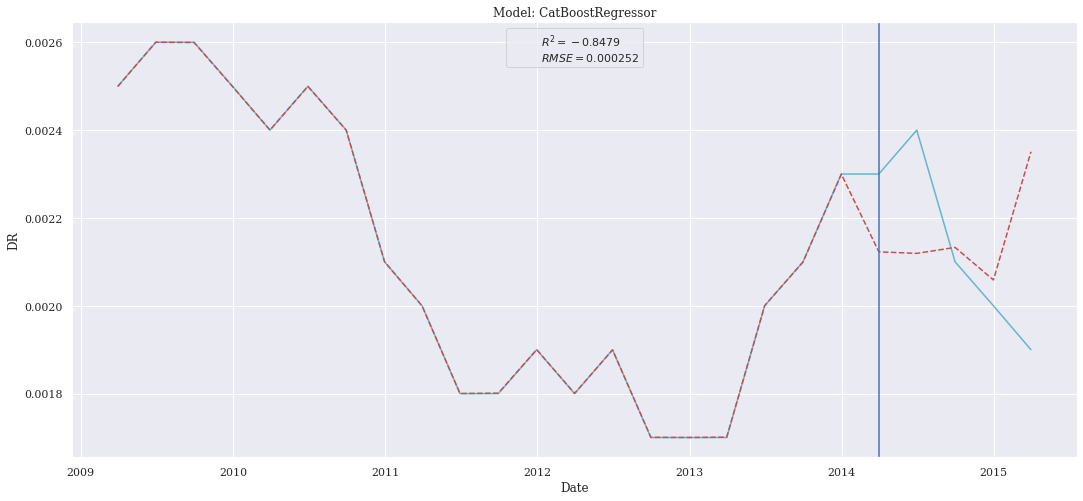

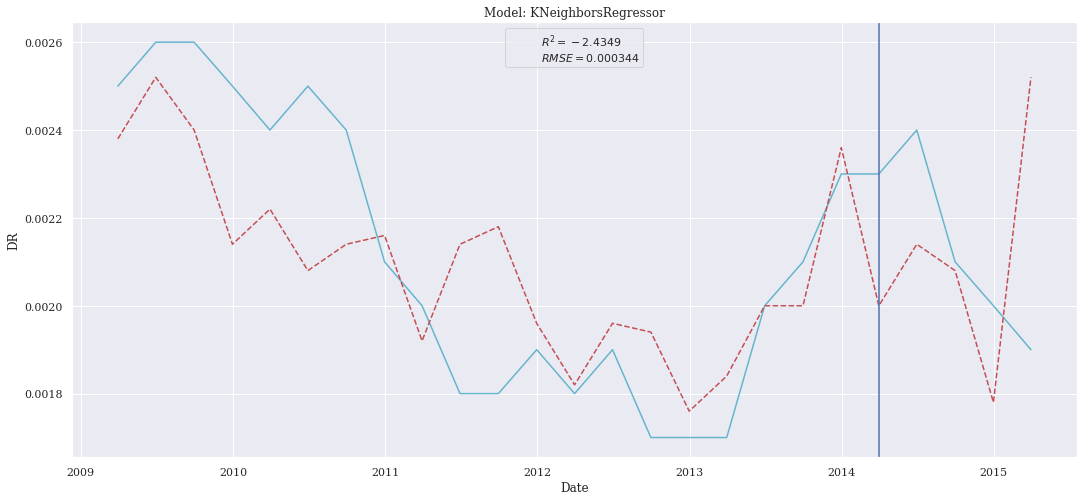

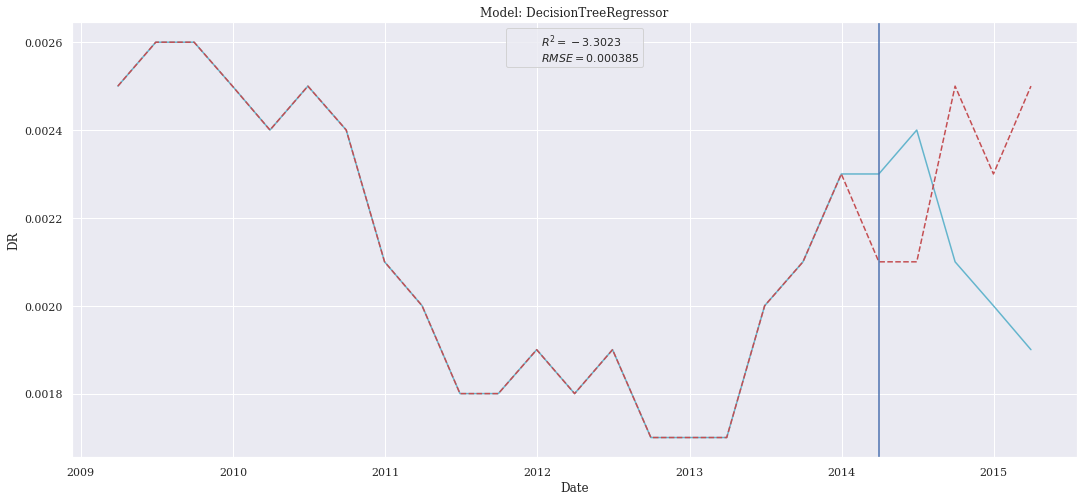

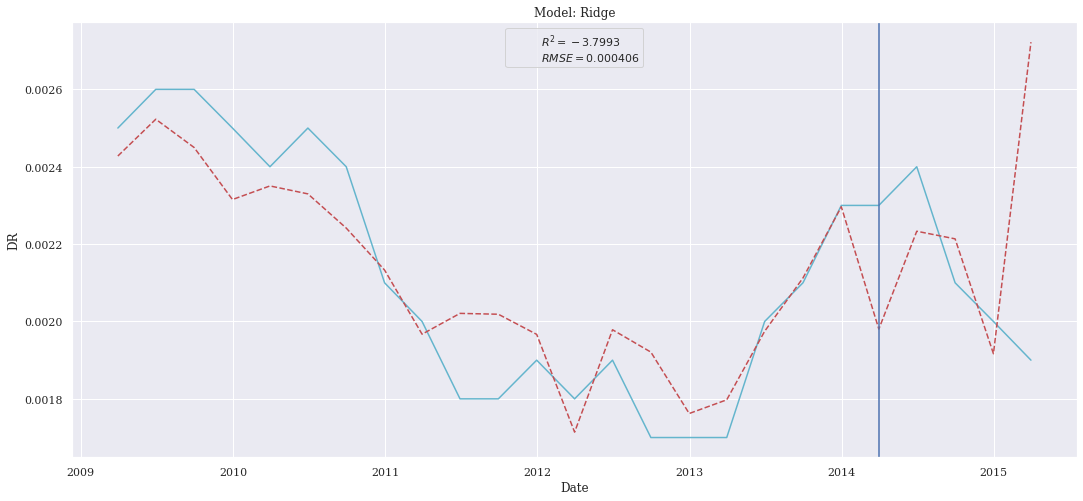

C:\Users\basho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\basho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


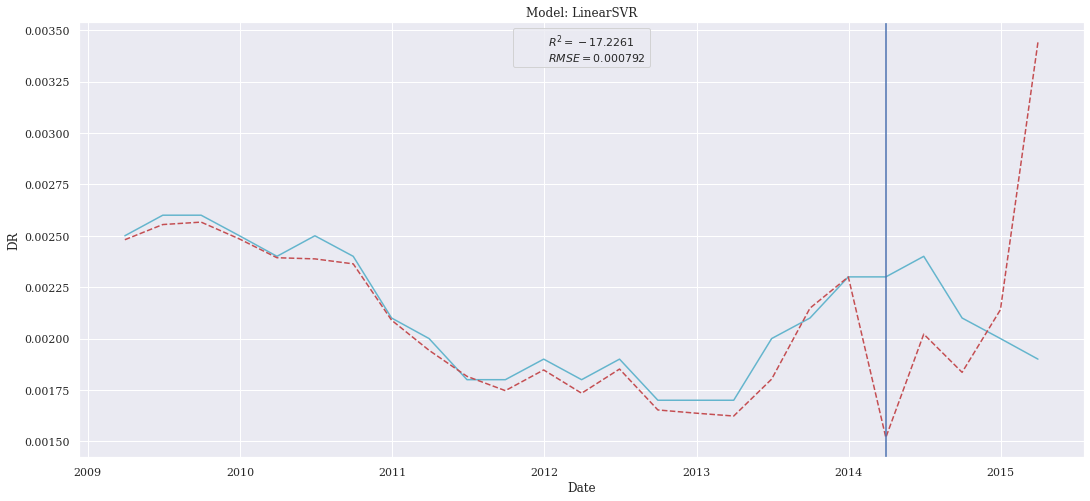

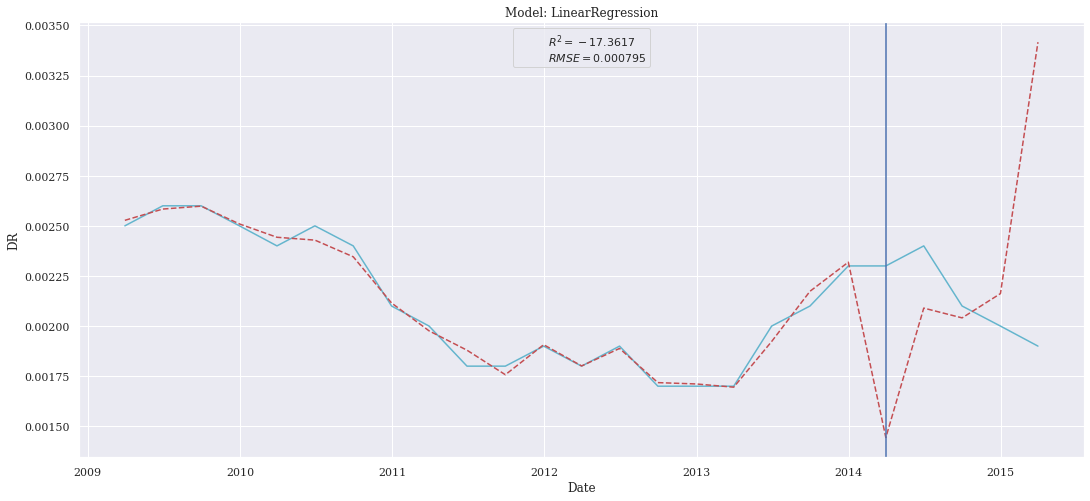

In [14]:
for i in range(summary.shape[0]): 
  y_train_pred = y_pred(X_train,y_train,X_train,y_train,model=summary.index[i])
  y_test_pred = y_pred(X_train,y_train,X_test,y_test,model=summary.index[i])
  plot_pred_detail(y_train,y_test,y_train_pred,y_test_pred,index[start:],name_model=summary.index[i],df_score=summary)

### Tree-Based Features

In [29]:
X_train, X_test, y_train, y_test,X_validation = clean_data(data,start,chronique=chronique,period=period,col_used=cl.col_2_tree,split=split,norm=norm)
summary = summary_ml(X_train,y_train,X_test,y_test)
summary

/opt/anaconda3/envs/cvxpy_env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


rmse           mse       mae          r2
Index                                                              
Ridge                  0.000286  8.184674e-08  0.000258   -1.765093
XGBRegressor           0.000299  8.962482e-08  0.000245   -2.027865
CatBoostRegressor      0.000308  9.484707e-08  0.000259   -2.204293
DecisionTreeRegressor  0.000316  1.000000e-07  0.000280   -2.378378
KNeighborsRegressor    0.000366  1.338400e-07  0.000332   -3.521622
LinearSVR              0.001429  2.042666e-06  0.001274  -68.008972
LinearRegression       0.002656  7.054077e-06  0.002391 -237.313422

ValueError: x and y must have same first dimension, but have shapes (24,) and (25,)

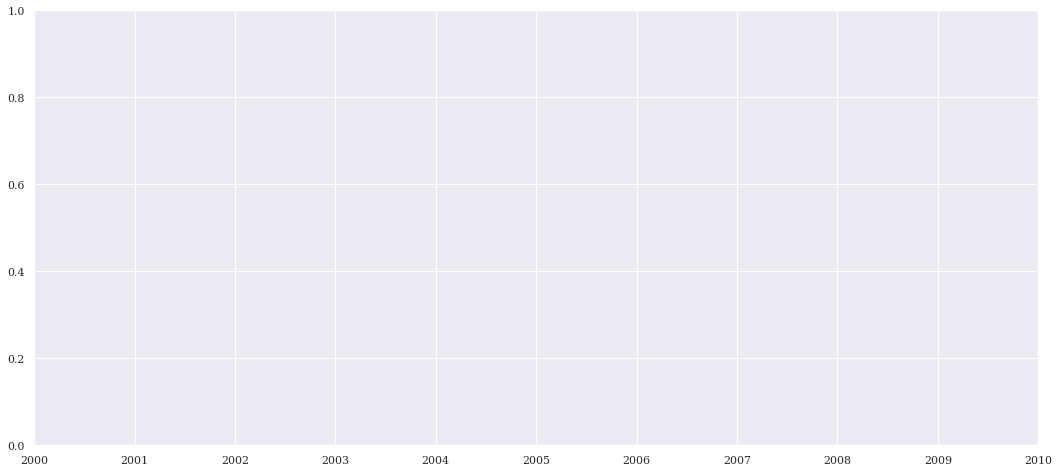

In [30]:
for i in range(summary.shape[0]): 
  y_train_pred = y_pred(X_train,y_train,X_train,y_train,model=summary.index[i])
  y_test_pred = y_pred(X_train,y_train,X_test,y_test,model=summary.index[i])
  plot_pred_detail(y_train,y_test,y_train_pred,y_test_pred,index[start:],name_model=summary.index[i],df_score=summary)

### Sequential Forward Features

In [31]:
X_train, X_test, y_train, y_test,X_validation= clean_data(data,start,chronique=chronique,period=period,col_used=cl.col_2_seq_for,split=split,norm=norm)
summary = summary_ml(X_train,y_train,X_test,y_test)
summary

/opt/anaconda3/envs/cvxpy_env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


rmse           mse       mae        r2
Index                                                            
XGBRegressor           0.000299  8.962482e-08  0.000245 -2.027865
KNeighborsRegressor    0.000321  1.028000e-07  0.000284 -2.472973
CatBoostRegressor      0.000321  1.031814e-07  0.000291 -2.485859
DecisionTreeRegressor  0.000344  1.180000e-07  0.000300 -2.986486
Ridge                  0.000364  1.321933e-07  0.000349 -3.465991
LinearRegression       0.000524  2.743460e-07  0.000406 -8.268446
LinearSVR              0.000553  3.054615e-07  0.000408 -9.319645

ValueError: x and y must have same first dimension, but have shapes (24,) and (25,)

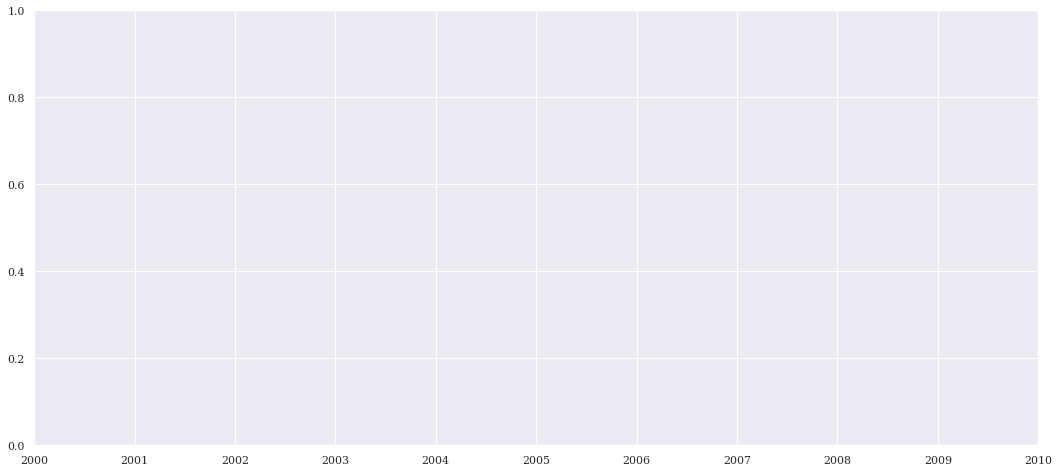

In [32]:
for i in range(summary.shape[0]):
  y_train_pred = y_pred(X_train,y_train,X_train,y_train,model=summary.index[i])
  y_test_pred = y_pred(X_train,y_train,X_test,y_test,model=summary.index[i])
  plot_pred_detail(y_train,y_test,y_train_pred,y_test_pred,index[start:],name_model=summary.index[i],df_score=summary)

### Sequential Backward Features

In [33]:
X_train, X_test, y_train, y_test,X_validation = clean_data(data,start,chronique=chronique,period=period,col_used=cl.col_2_seq_bac,split=split,norm=norm)
summary = summary_ml(X_train,y_train,X_test,y_test)
summary

/opt/anaconda3/envs/cvxpy_env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


rmse           mse       mae        r2
Index                                                            
XGBRegressor           0.000299  8.962482e-08  0.000245 -2.027865
CatBoostRegressor      0.000329  1.084774e-07  0.000264 -2.664778
Ridge                  0.000335  1.120044e-07  0.000267 -2.783931
KNeighborsRegressor    0.000348  1.210400e-07  0.000308 -3.089189
DecisionTreeRegressor  0.000427  1.820000e-07  0.000340 -5.148649
LinearRegression       0.000495  2.449659e-07  0.000403 -7.275875
LinearSVR              0.000544  2.956919e-07  0.000416 -8.989590

ValueError: x and y must have same first dimension, but have shapes (24,) and (25,)

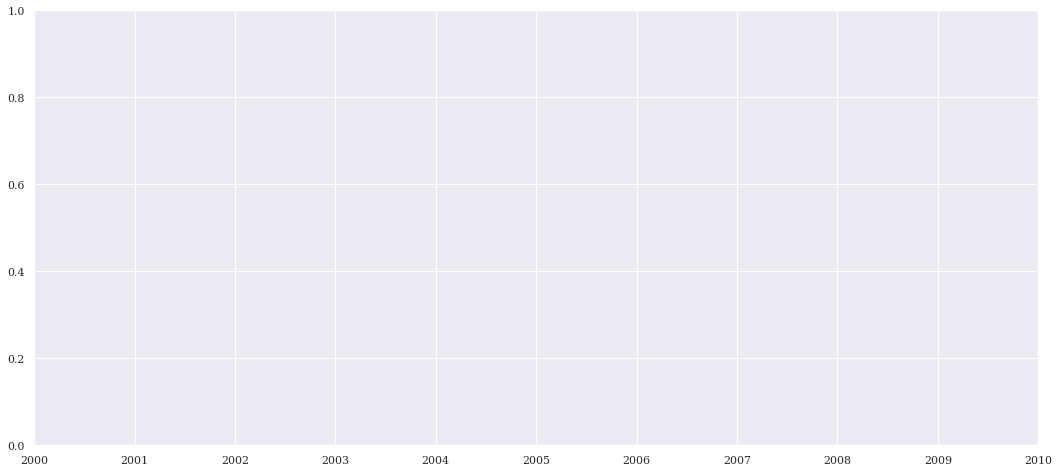

In [34]:
for i in range(summary.shape[0]):
  y_train_pred = y_pred(X_train,y_train,X_train,y_train,model=summary.index[i])
  y_test_pred = y_pred(X_train,y_train,X_test,y_test,model=summary.index[i])
  plot_pred_detail(y_train,y_test,y_train_pred,y_test_pred,index[start:],name_model=summary.index[i],df_score=summary)

## First Conclusion
Given a first point of view we see that the xgboost and catboost are the best models to predict CHR2. We generally have a rmse equals to 0.000184 for the xgboost with a r2 positive but very low (all the r2 are negative, that show that the model doesn't follow the trend of y_test). One exception is observed for the KNeighborsRegressor with recursive features were we have a r2 of 0.73 and a rmse equals to 0.0.000096 (best result). We decided to apply a grid search on xgboost, catboostregressor and kneighborsregressor to find if a better parameter is possible

### GridSearch on KNeighborsRegressor

In [21]:
X_train, X_test, y_train, y_test = clean_data(data,start,b"CHR2",col_used=cl.col_2_recur,split=split,norm=norm)
params_knr = {"n_neighbors":[5,6,7,8,9,10],"weights":["uniform"],"algorithm":["auto","ball_tree","kd_tree","brute"],"p":[1,2],"leaf_size":[5,10,20,30,40,50]}
params,score = params_grid(X_train,y_train,X_test,y_test,"knn",params_knr)
print(params,score)

Fitting 2 folds for each of 288 candidates, totalling 576 fits
{'algorithm': 'auto', 'leaf_size': 5, 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'} 7.042726744663612e-05


In [22]:
summary = summary_ml(X_train,y_train,X_test,y_test,models=["knn"],parameters={"p_knn":params})
summary

rmse           mse       mae        r2
Index                                                         
KNeighborsRegressor  0.00007  4.960000e-09  0.000056  0.855814

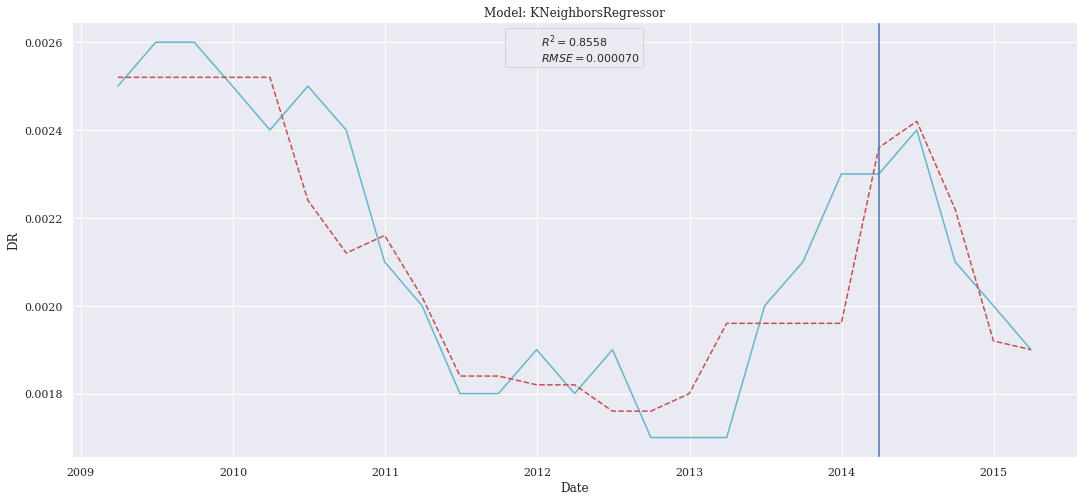

In [23]:
y_train_pred = y_pred(X_train,y_train,X_train,y_train,model=summary.index[0],parameters={"p_knn":params})
y_test_pred = y_pred(X_train,y_train,X_test,y_test,model=summary.index[0],parameters={"p_knn":params})
plot_pred_detail(y_train,y_test,y_train_pred,y_test_pred,index[start:],name_model=summary.index[0],df_score=summary)

### GridSearch on XGBoost

In [24]:
X_train, X_test, y_train, y_test = clean_data(data,start,b"CHR2",col_used=cl.col_2_kbest,split=split,norm=norm)
params_xgb = {"booster":["gbtree"],"eta":[0.1*i for i in range(1,11)],"gamma":[5*i for i in range(5)],"max_depth":[i for i in range(3,11)],"num_parallel_tree":[1,2,3,4,5],"verbose":[0]}
params,score = params_grid(X_train,y_train,X_test,y_test,"xgb",params_xgb)
print(params,score)

Fitting 2 folds for each of 2000 candidates, totalling 4000 fits
[23:57:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[23:57:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[23:57:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[23:57:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[23:57:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.

KeyboardInterrupt: 

In [ ]:
summary = summary_ml(X_train,y_train,X_test,y_test,models=["xgb"],parameters={"p_xgb":params})
summary

In [ ]:
y_train_pred = y_pred(X_train,y_train,X_train,y_train,model=summary.index[0],parameters={"p_xgb":params})
y_test_pred = y_pred(X_train,y_train,X_test,y_test,model=summary.index[0],parameters={"p_xgb":params})
plot_pred_detail(y_train,y_test,y_train_pred,y_test_pred,index[start:],name_model=summary.index[0],df_score=summary)

### GridSearch on CatBoost

In [ ]:
X_train, X_test, y_train, y_test = clean_data(data,start,b"CHR2",col_used=cl.col_2_recur,split=split,norm=norm)
params_cat = {'depth': [i for i in range(1,7)],'learning_rate':[0.01*i for i in range(25,60)],'iterations':[10*i for i in range(15,30)],"verbose":[0]}
params,score = params_grid(X_train,y_train,X_test,y_test,"cat",params_cat)
print(params,score)

Fitting 2 folds for each of 3150 candidates, totalling 6300 fits
{'depth': 4, 'iterations': 150, 'learning_rate': 0.45, 'verbose': 0} 0.0002429227268599995


In [ ]:
summary = summary_ml(X_train,y_train,X_test,y_test,models=["cat"],parameters={"p_cat":params})
summary

rmse           mse       mae        r2
Index                                                        
CatBoostRegressor  0.000243  5.901145e-08  0.000214 -0.715449

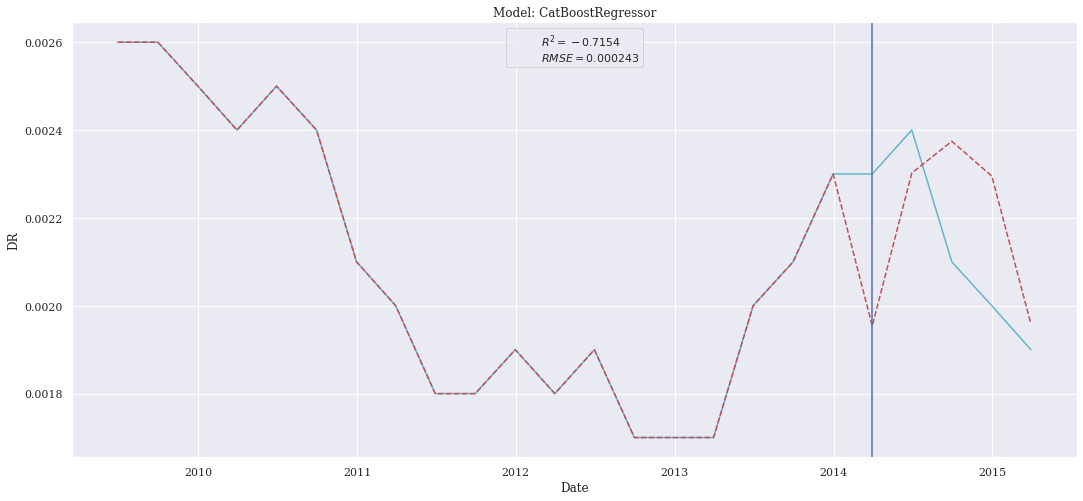

In [ ]:
y_train_pred = y_pred(X_train,y_train,X_train,y_train,model=summary.index[0],parameters={"p_cat":params})
y_test_pred = y_pred(X_train,y_train,X_test,y_test,model=summary.index[0],parameters={"p_cat":params})
plot_pred_detail(y_train,y_test,y_train_pred,y_test_pred,index[start:],name_model=summary.index[0],df_score=summary)

## Final Conclusion
Grid Search is relevant for the KNN model but not for the catboost and xgboost model.
With the knn we have now a r2 equals to 0.855.

# Focus on the Chronique CHR8

## Machine Learning
We will focus on all the different features selection and after we choose the best model, with the best features we will focus on doing a grid search on this model

In [45]:
chronique=b'CHR8'
start = 1
period = 24
norm = "MinMax"
split = 0.2
# Useful to plot the model 
X_train, X_test, y_train, y_test,X_validation = clean_data(data,start,chronique=chronique,period=period,col_used=cl.col_2_corr,split=split,norm=norm)
index = pd.concat([X_train, X_test], axis=1).index

### Correlation Features

In [46]:
X_train, X_test, y_train, y_test,X_validation = clean_data(data,start,chronique=chronique,period=period,col_used=cl.col_8_corr,split=split,norm=norm)
summary = summary_ml(X_train,y_train,X_test,y_test)
summary

/opt/anaconda3/envs/cvxpy_env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


rmse       mse       mae         r2
Index                                                         
DecisionTreeRegressor  0.012674  0.000161  0.010900  -5.134288
CatBoostRegressor      0.012725  0.000162  0.012419  -5.183902
Ridge                  0.013075  0.000171  0.012813  -5.529011
XGBRegressor           0.013352  0.000178  0.012633  -5.808070
KNeighborsRegressor    0.014756  0.000218  0.014560  -7.315343
LinearSVR              0.017487  0.000306  0.015854 -10.678633
LinearRegression       0.021605  0.000467  0.017567 -16.825334

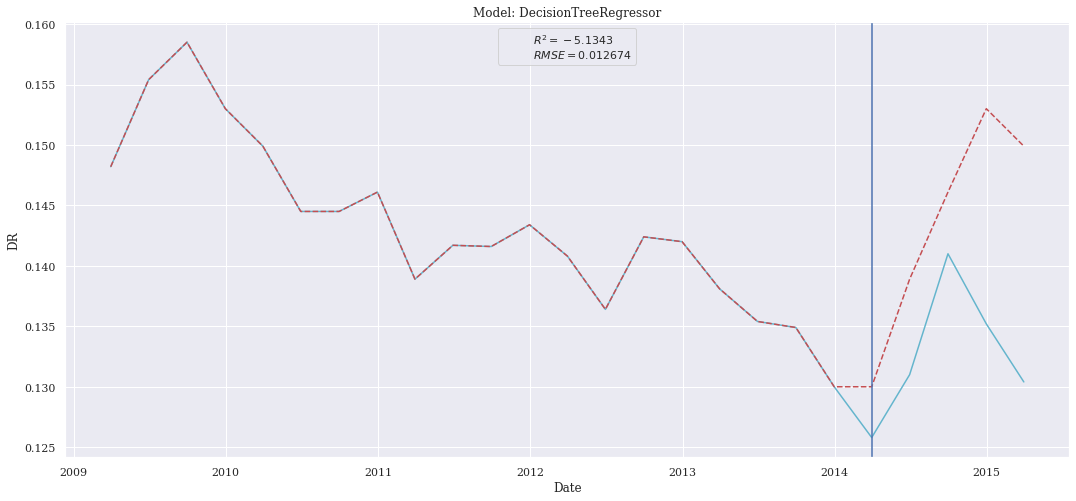

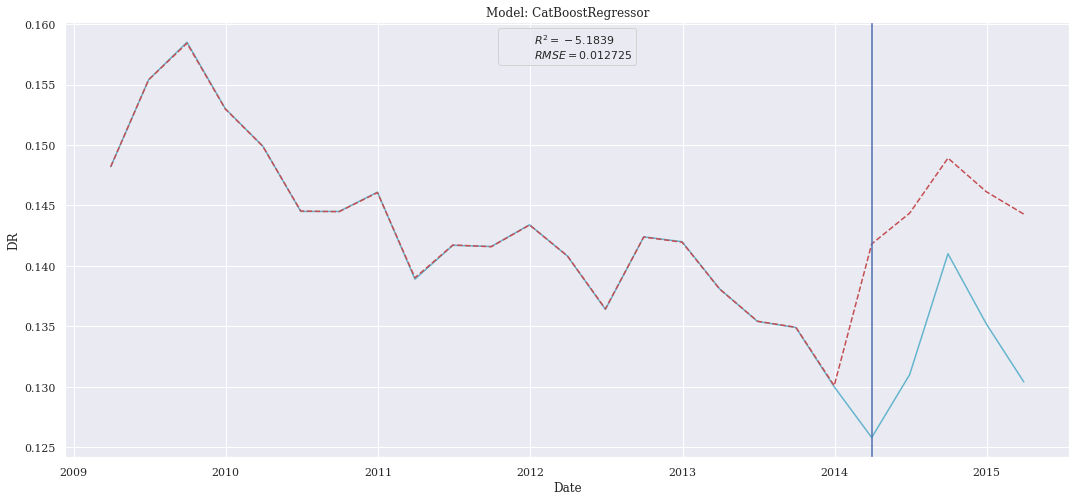

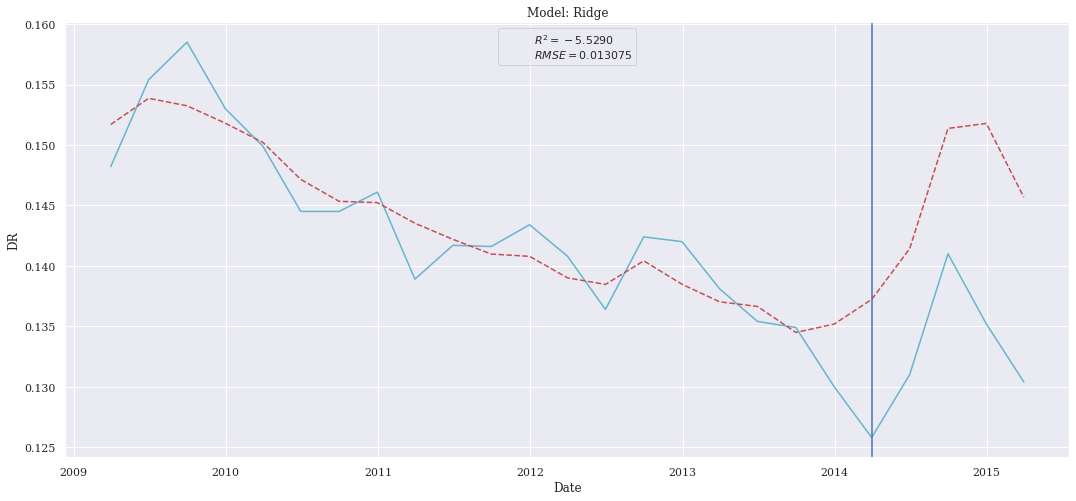

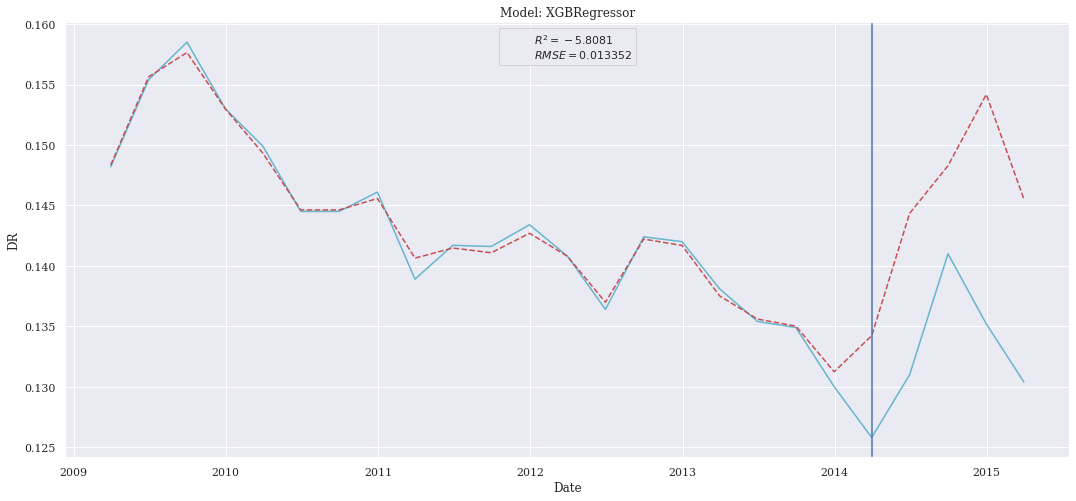

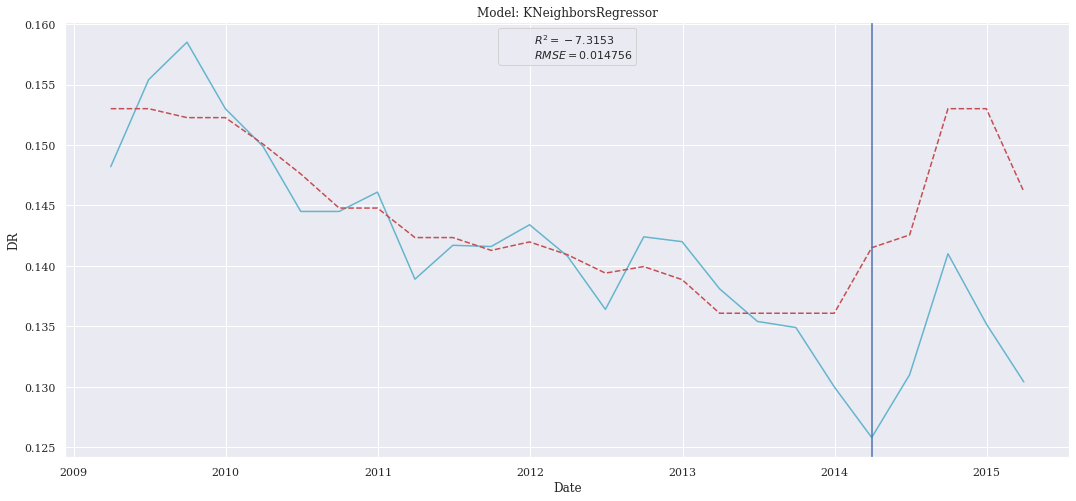

/opt/anaconda3/envs/cvxpy_env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/envs/cvxpy_env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


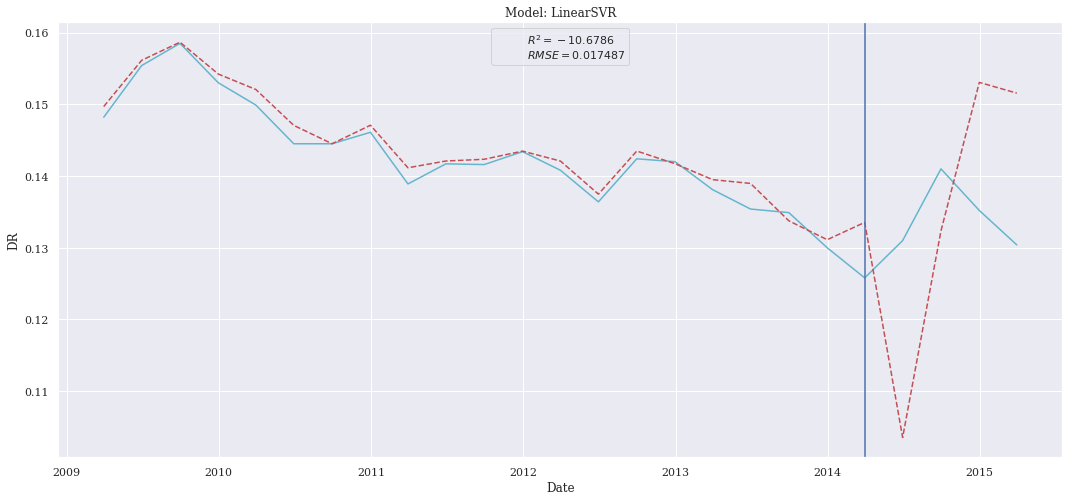

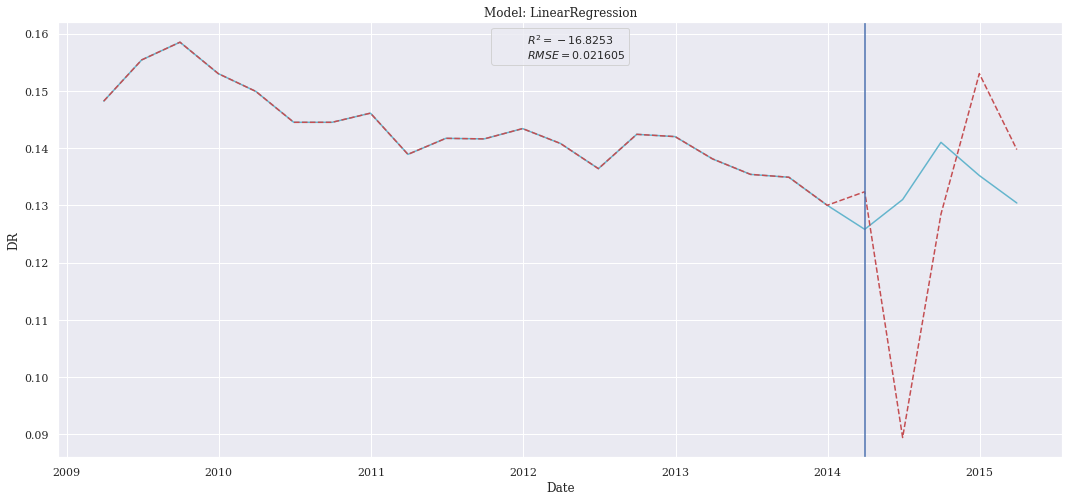

In [47]:
for i in range(summary.shape[0]): 
  y_train_pred = y_pred(X_train,y_train,X_train,y_train,model=summary.index[i])
  y_test_pred = y_pred(X_train,y_train,X_test,y_test,model=summary.index[i])
  plot_pred_detail(y_train,y_test,y_train_pred,y_test_pred,index,name_model=summary.index[i],df_score=summary)

### Low Variance Features

In [48]:
X_train, X_test, y_train, y_test,X_validation = clean_data(data,start,chronique=chronique,period=period,col_used=cl.col_8_low_var,split=split,norm=norm)
summary = summary_ml(X_train,y_train,X_test,y_test)
summary

/opt/anaconda3/envs/cvxpy_env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


rmse       mse       mae         r2
Index                                                         
Ridge                  0.011405  0.000130  0.010990  -3.967228
CatBoostRegressor      0.011534  0.000133  0.010923  -4.080448
XGBRegressor           0.012054  0.000145  0.011172  -4.549256
KNeighborsRegressor    0.012441  0.000155  0.012208  -4.910766
LinearRegression       0.012551  0.000158  0.010642  -5.015982
DecisionTreeRegressor  0.016153  0.000261  0.014640  -8.963797
LinearSVR              0.025081  0.000629  0.021349 -23.022128

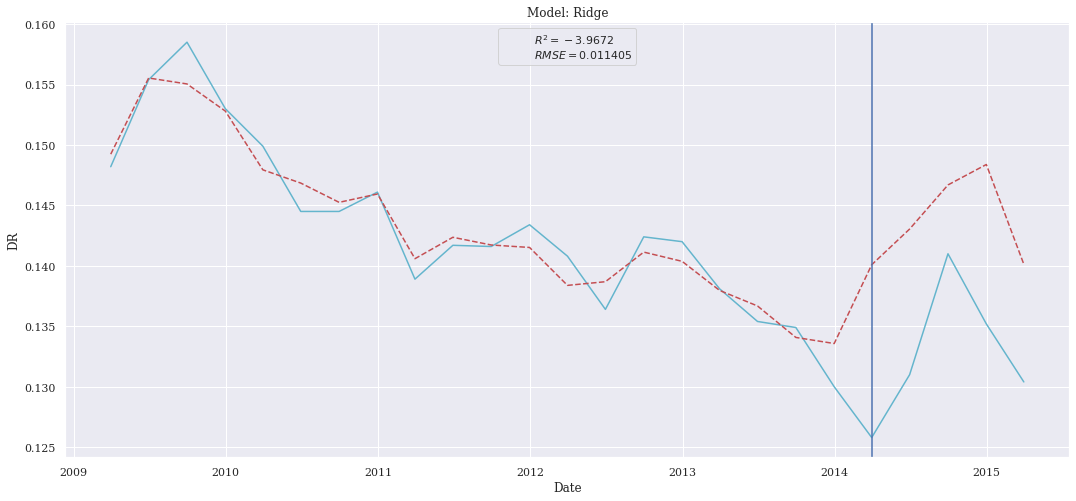

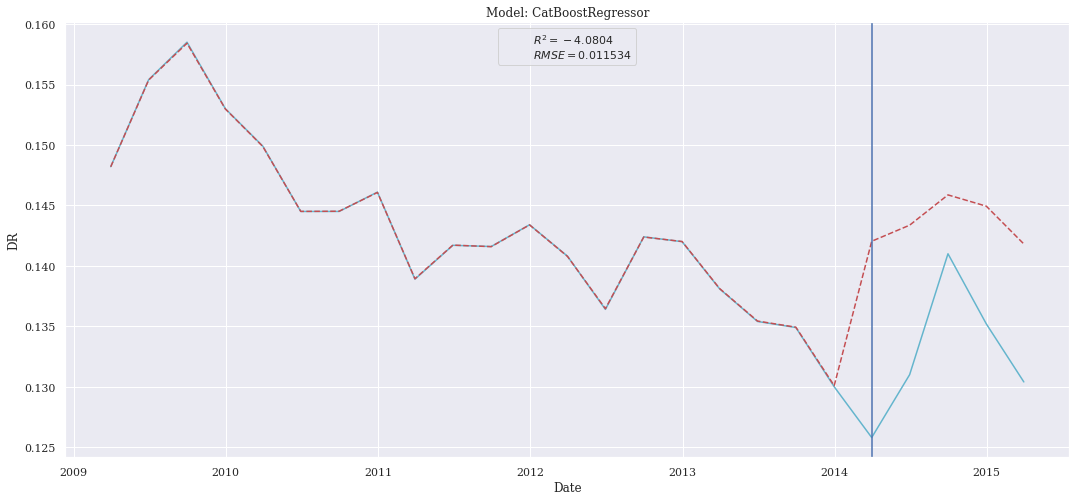

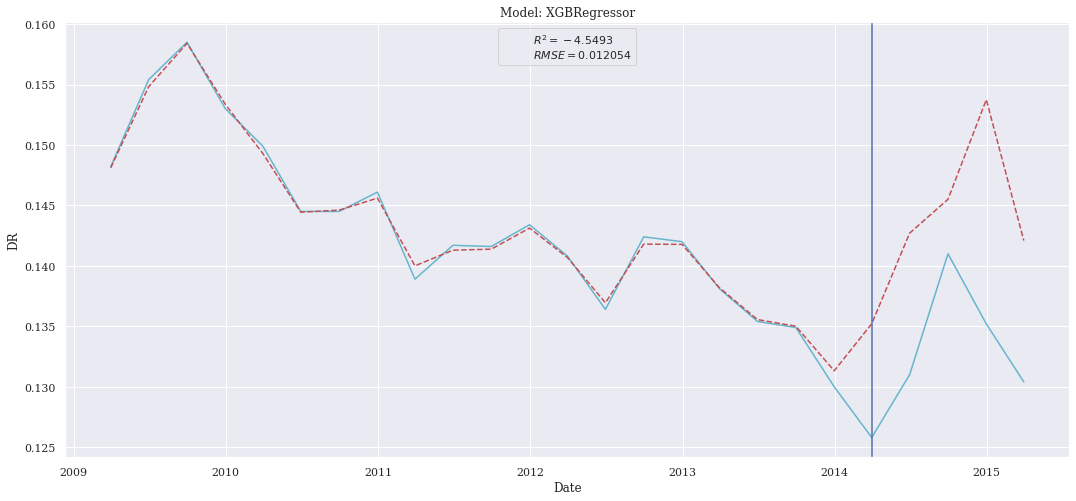

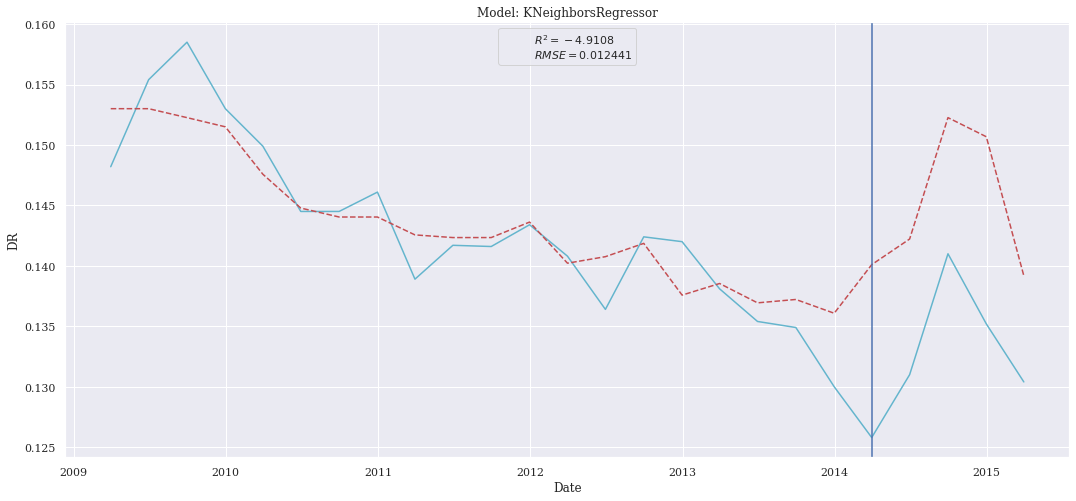

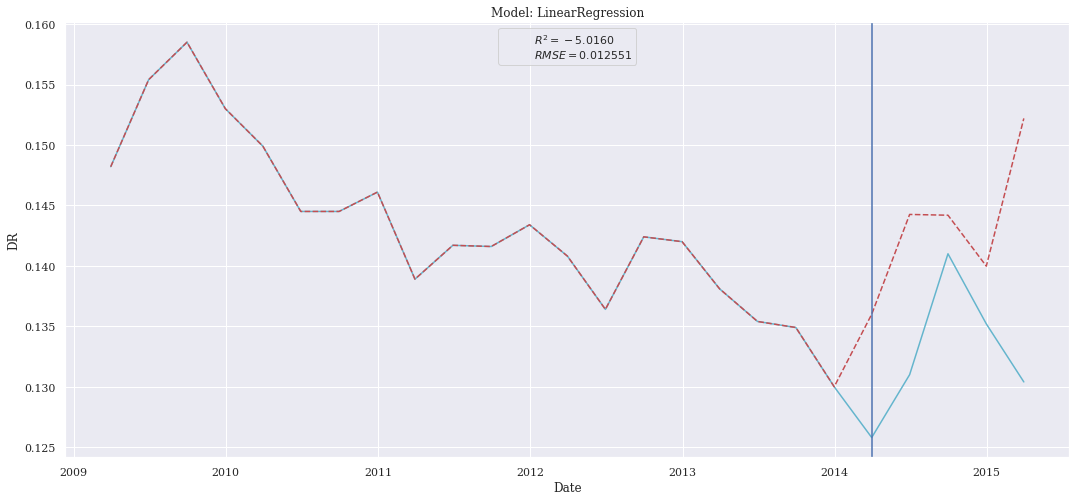

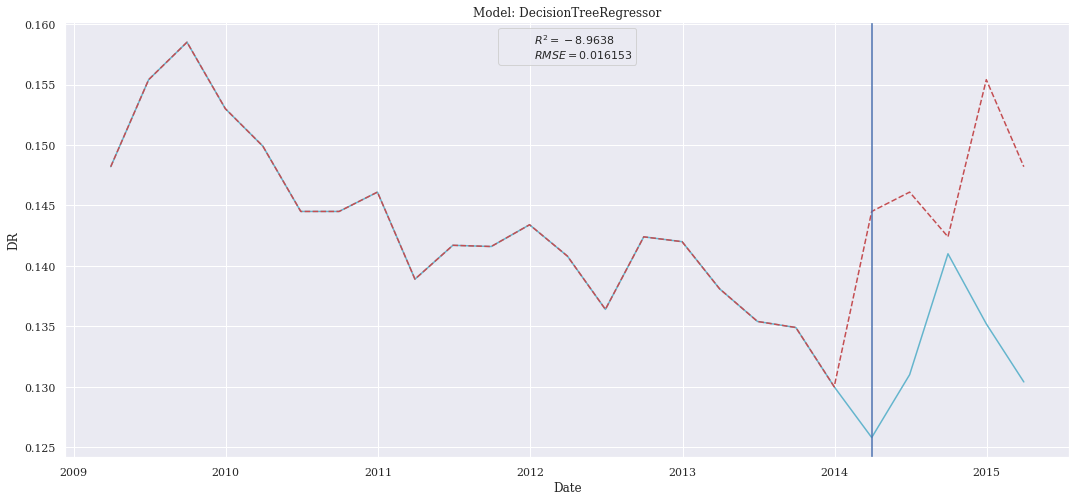

/opt/anaconda3/envs/cvxpy_env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/envs/cvxpy_env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


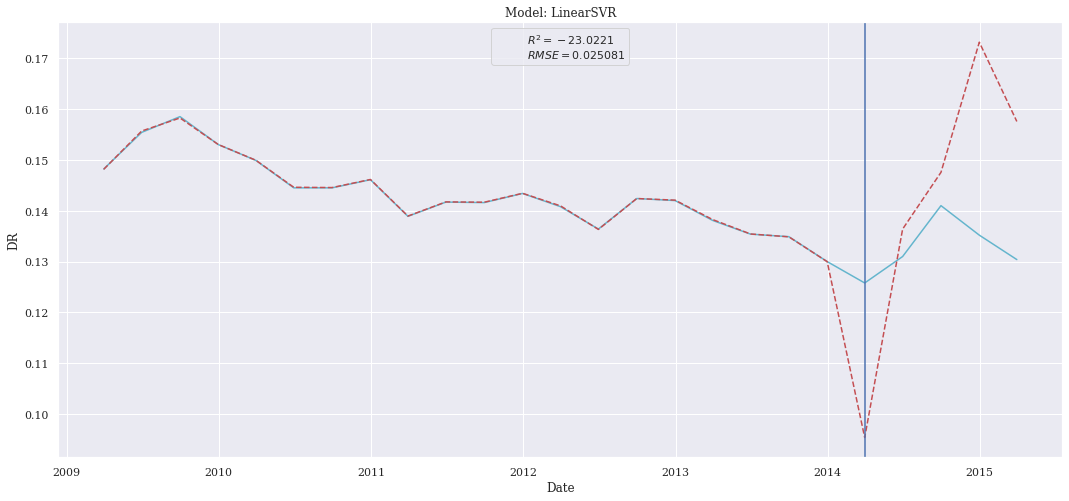

In [49]:
for i in range(summary.shape[0]): 
  y_train_pred = y_pred(X_train,y_train,X_train,y_train,model=summary.index[i])
  y_test_pred = y_pred(X_train,y_train,X_test,y_test,model=summary.index[i])
  plot_pred_detail(y_train,y_test,y_train_pred,y_test_pred,index,name_model=summary.index[i],df_score=summary)

### KBest Features

In [50]:
X_train, X_test, y_train, y_test,X_validation = clean_data(data,start,chronique=chronique,period=period,col_used=cl.col_8_kbest,split=split,norm=norm)
summary = summary_ml(X_train,y_train,X_test,y_test)
summary

/opt/anaconda3/envs/cvxpy_env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


rmse       mse       mae           r2
Index                                                           
CatBoostRegressor      0.011969  0.000143  0.011733    -4.470700
KNeighborsRegressor    0.012555  0.000158  0.012448    -5.019339
Ridge                  0.012603  0.000159  0.012476    -5.065871
XGBRegressor           0.013115  0.000172  0.012571    -5.568173
DecisionTreeRegressor  0.015851  0.000251  0.013760    -8.594739
LinearSVR              0.034730  0.001206  0.028730   -45.061151
LinearRegression       0.362649  0.131515  0.321023 -5021.403548

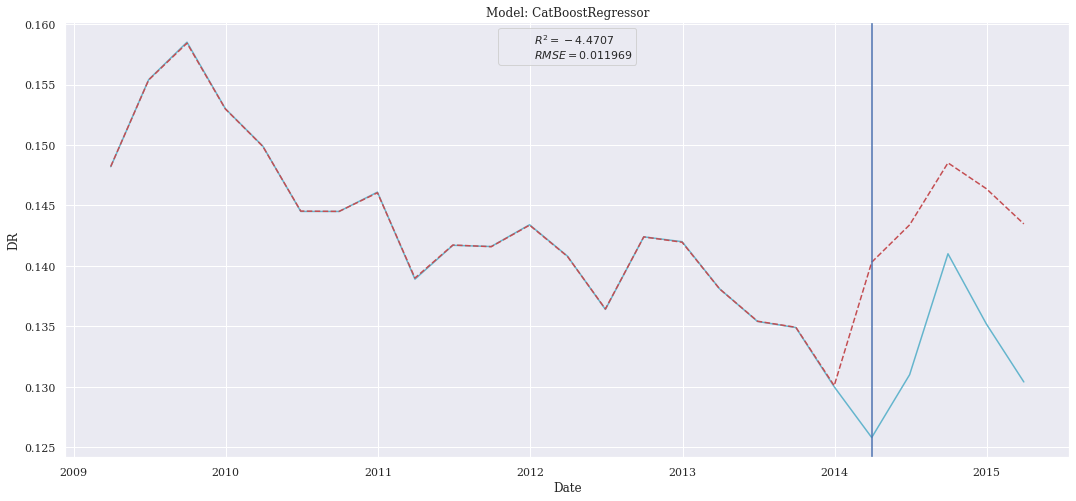

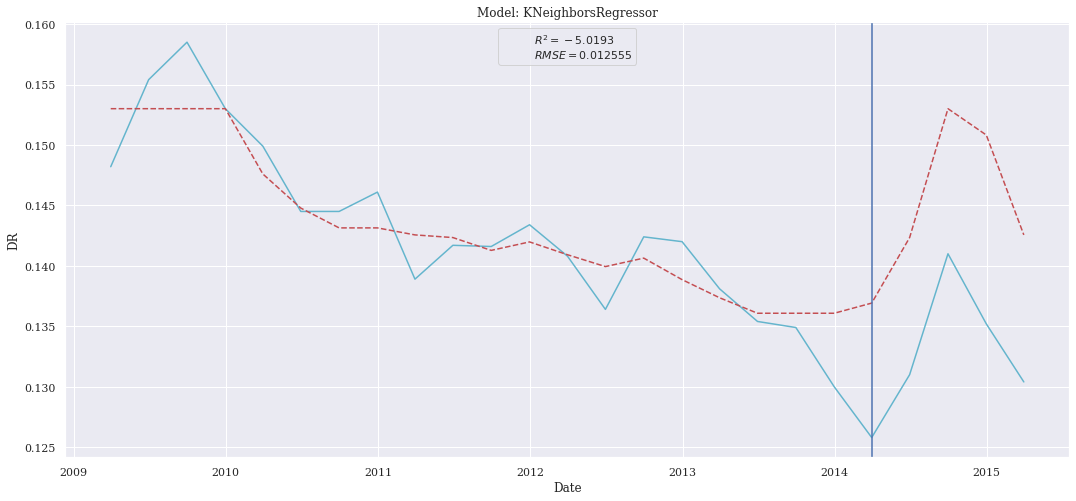

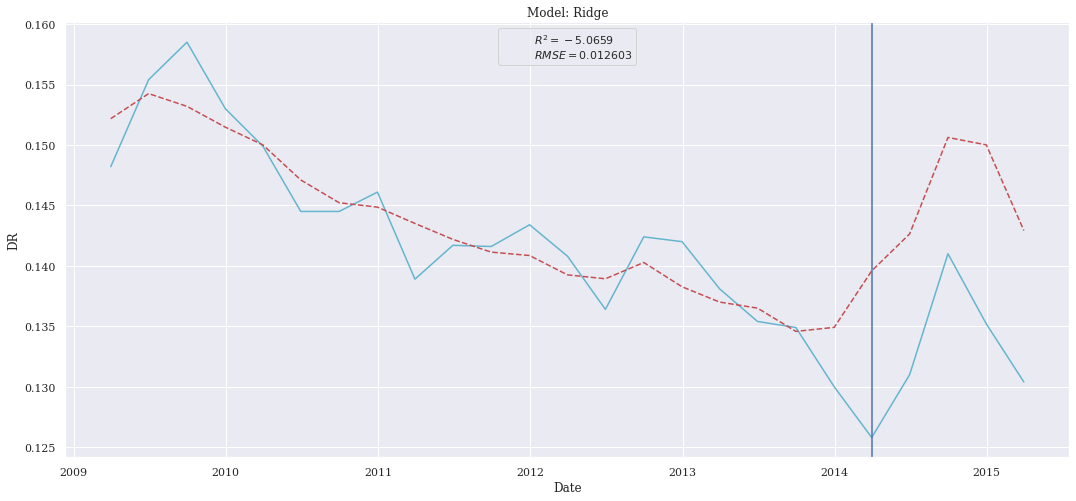

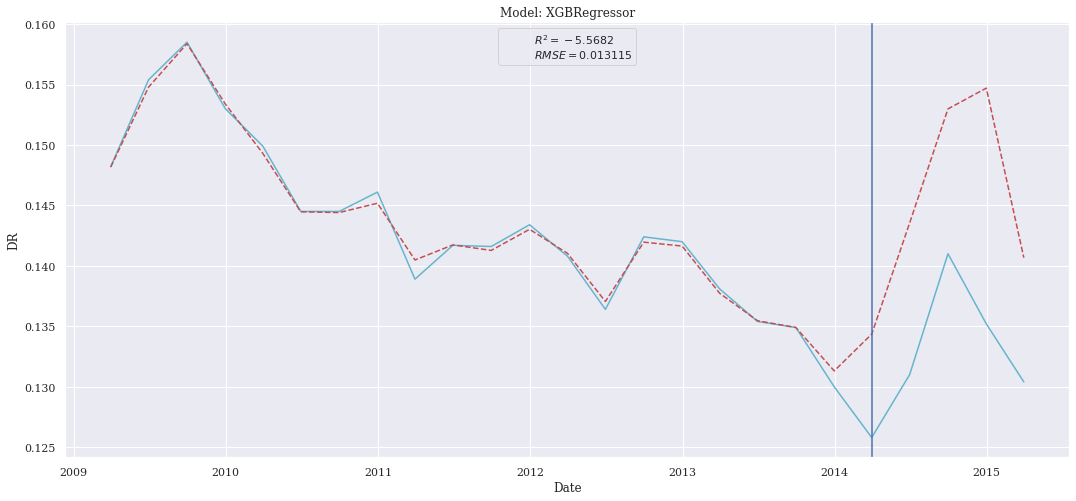

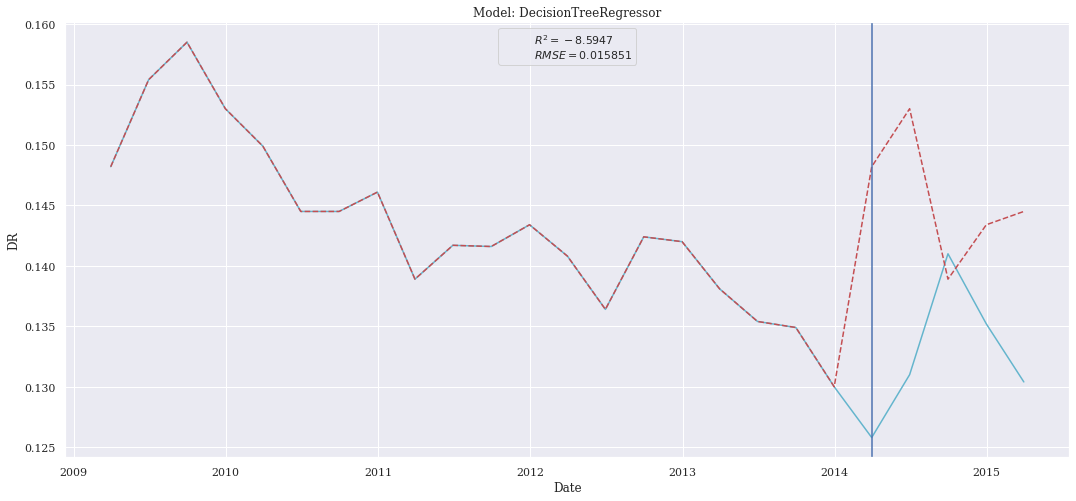

/opt/anaconda3/envs/cvxpy_env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/envs/cvxpy_env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


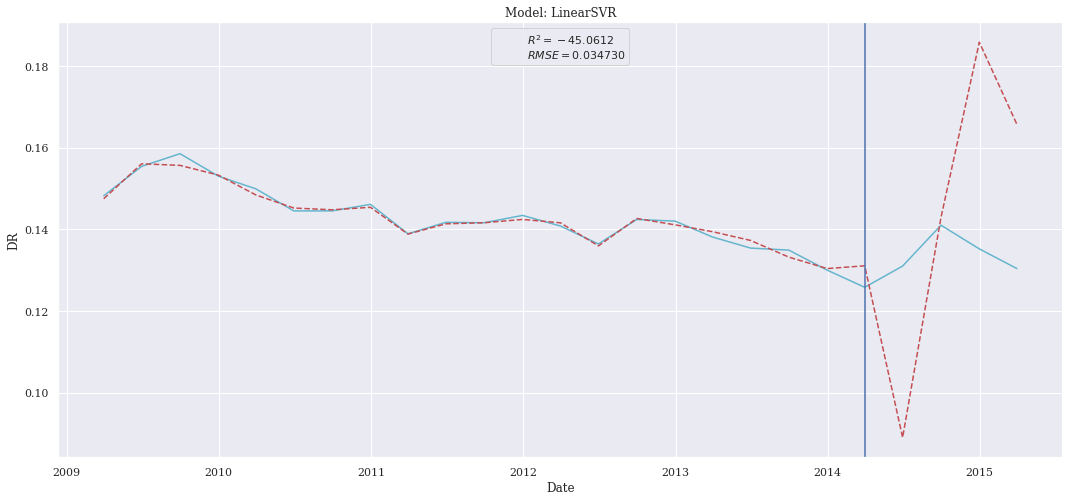

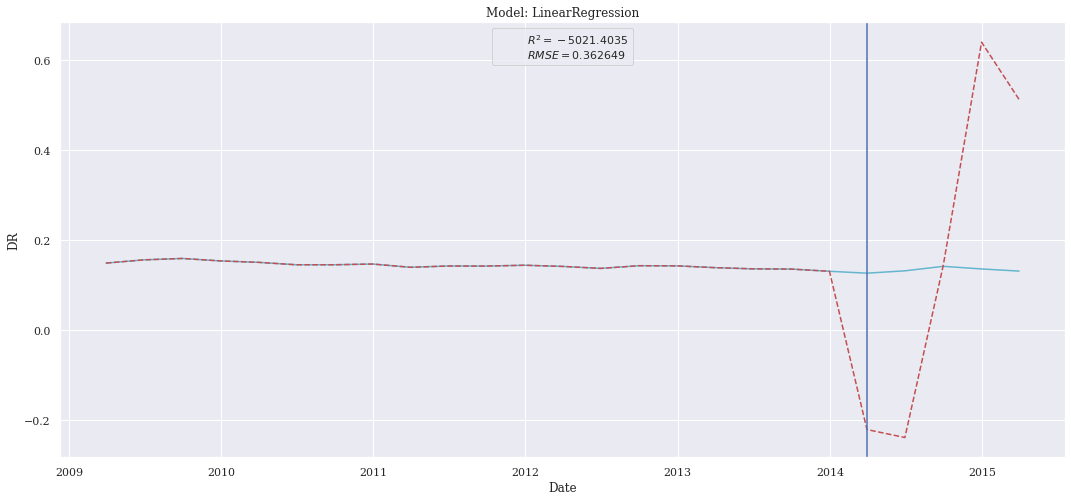

In [51]:
for i in range(summary.shape[0]): 
  y_train_pred = y_pred(X_train,y_train,X_train,y_train,model=summary.index[i])
  y_test_pred = y_pred(X_train,y_train,X_test,y_test,model=summary.index[i])
  plot_pred_detail(y_train,y_test,y_train_pred,y_test_pred,index,name_model=summary.index[i],df_score=summary)

### Recursive Features

In [52]:
X_train, X_test, y_train, y_test,X_validation = clean_data(data,start,chronique=chronique,period=period,col_used=cl.col_8_recur,split=split,norm=norm)
summary = summary_ml(X_train,y_train,X_test,y_test)
summary

rmse       mse       mae         r2
Index                                                         
CatBoostRegressor      0.012745  0.000162  0.012100  -5.203209
XGBRegressor           0.012891  0.000166  0.012128  -5.346315
KNeighborsRegressor    0.014586  0.000213  0.014208  -7.124838
DecisionTreeRegressor  0.014588  0.000213  0.013340  -7.126680
LinearRegression       0.014616  0.000214  0.012997  -7.158711
Ridge                  0.014871  0.000221  0.014499  -7.445100
LinearSVR              0.023930  0.000573  0.021441 -20.868359

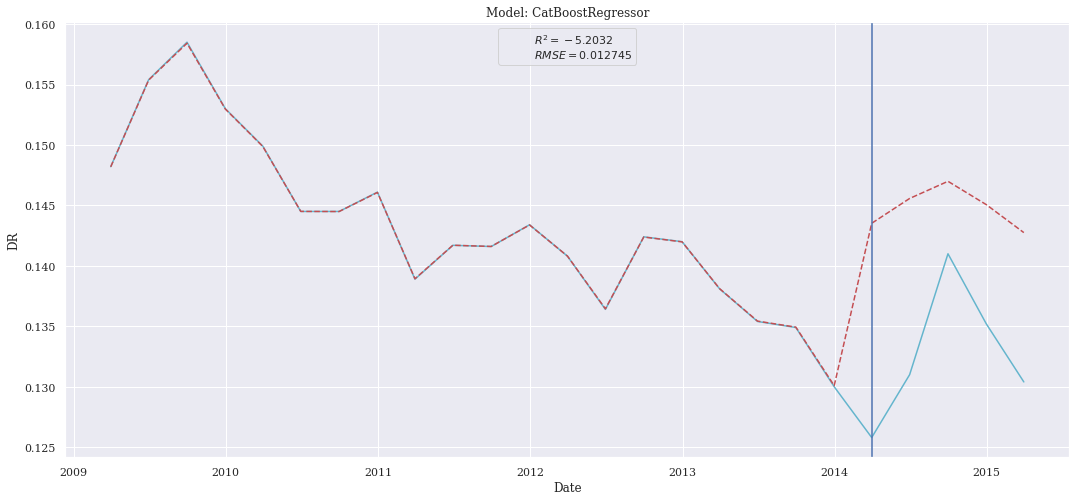

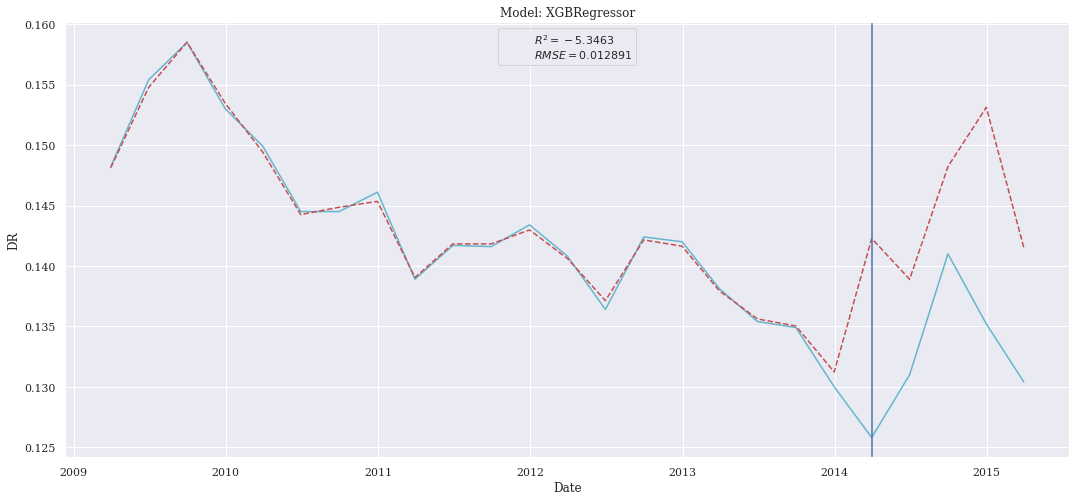

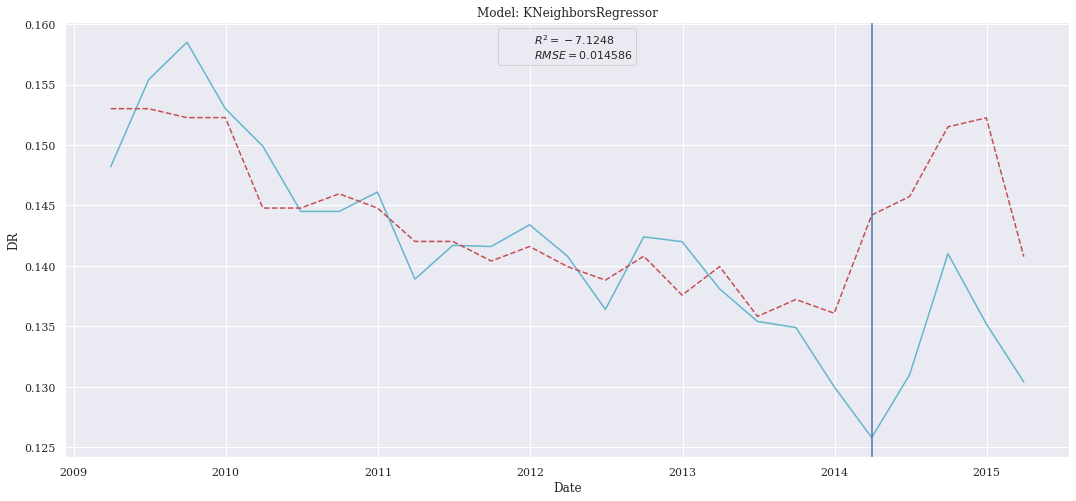

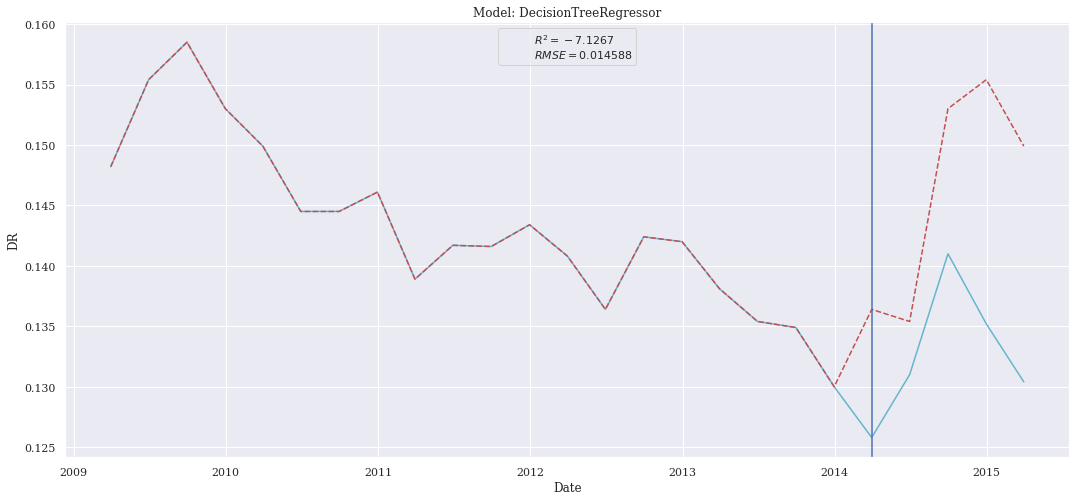

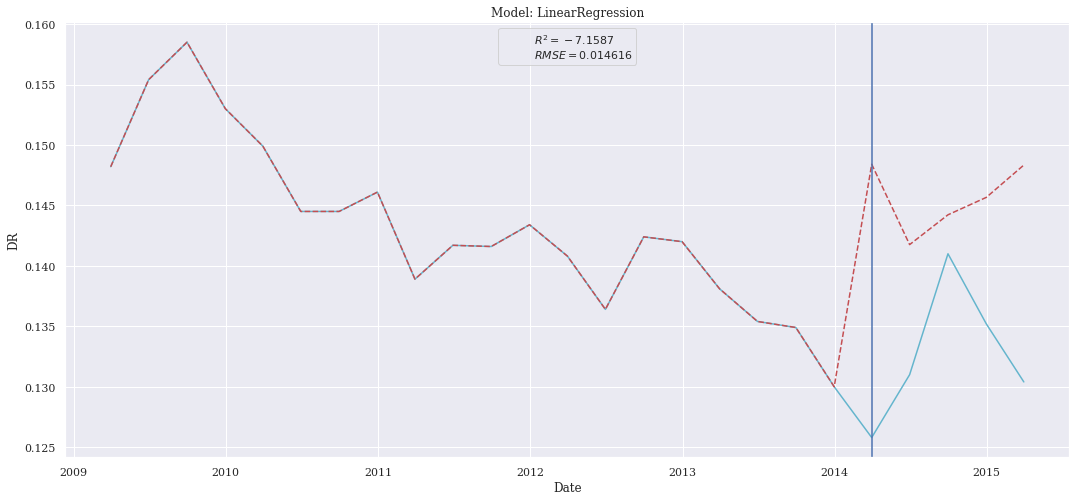

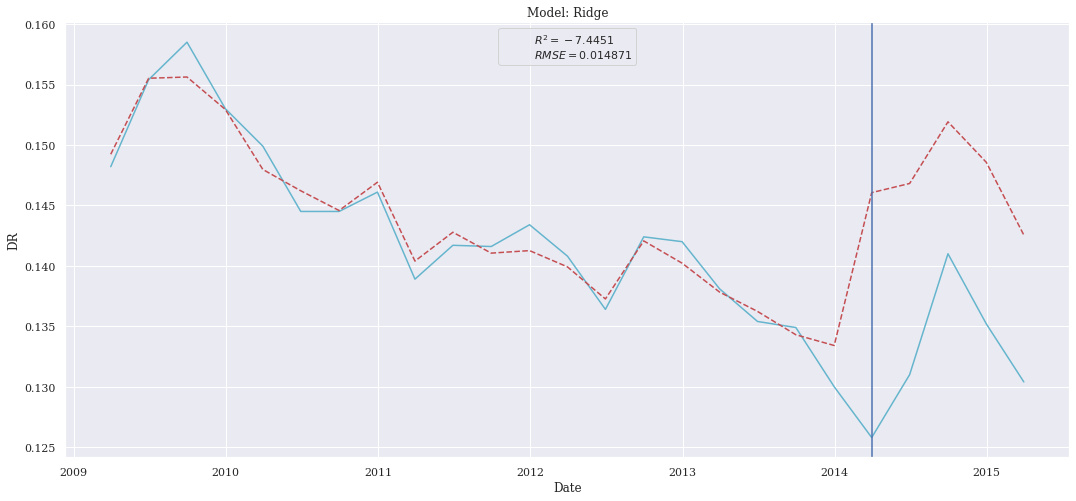

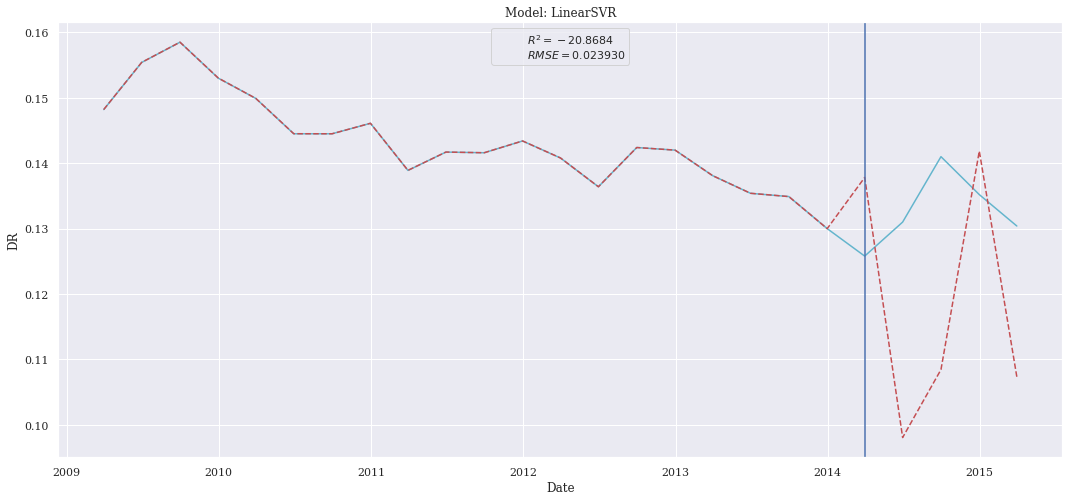

In [53]:
for i in range(summary.shape[0]): 
  y_train_pred = y_pred(X_train,y_train,X_train,y_train,model=summary.index[i])
  y_test_pred = y_pred(X_train,y_train,X_test,y_test,model=summary.index[i])
  plot_pred_detail(y_train,y_test,y_train_pred,y_test_pred,index,name_model=summary.index[i],df_score=summary)

### SelectFromModel Features

In [54]:
X_train, X_test, y_train, y_test,X_validation = clean_data(data,start,chronique=chronique,period=period,col_used=cl.col_8_sfm,split=split,norm=norm)
summary = summary_ml(X_train,y_train,X_test,y_test)
summary

/opt/anaconda3/envs/cvxpy_env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


rmse       mse       mae         r2
Index                                                         
XGBRegressor           0.010833  0.000117  0.009615  -3.481401
CatBoostRegressor      0.011147  0.000124  0.010487  -3.745376
KNeighborsRegressor    0.011228  0.000126  0.011032  -3.814475
Ridge                  0.012726  0.000162  0.012062  -5.184474
LinearSVR              0.013605  0.000185  0.013240  -6.068224
DecisionTreeRegressor  0.014275  0.000204  0.013220  -6.782369
LinearRegression       0.024543  0.000602  0.019484 -22.003438

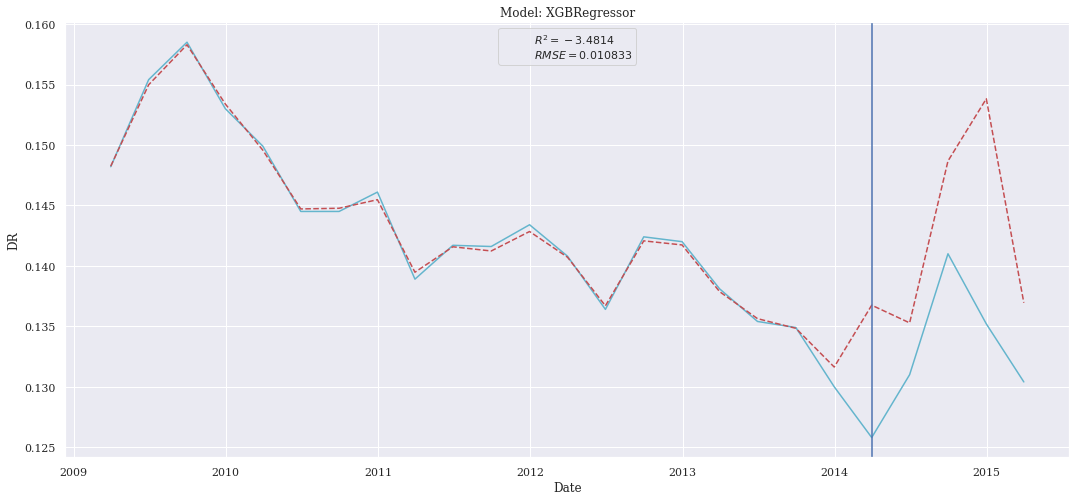

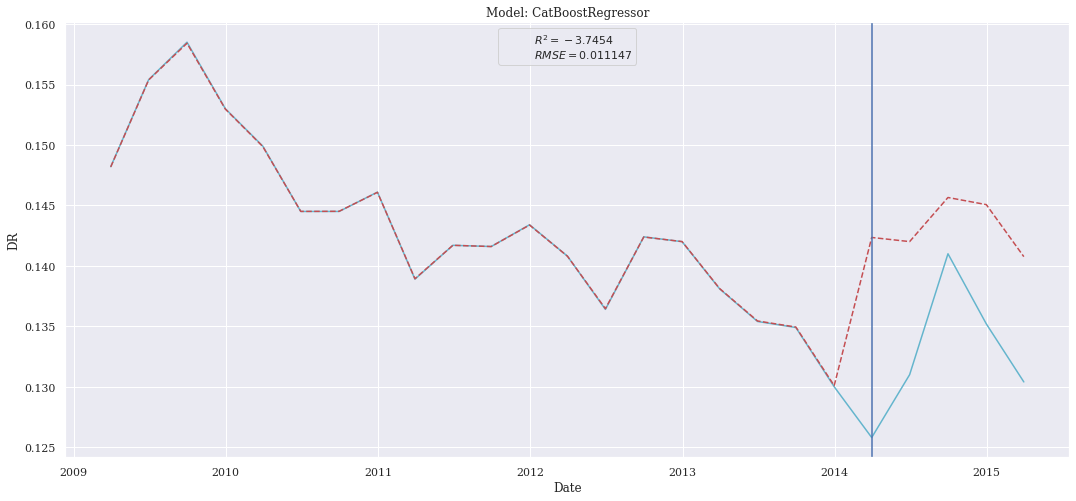

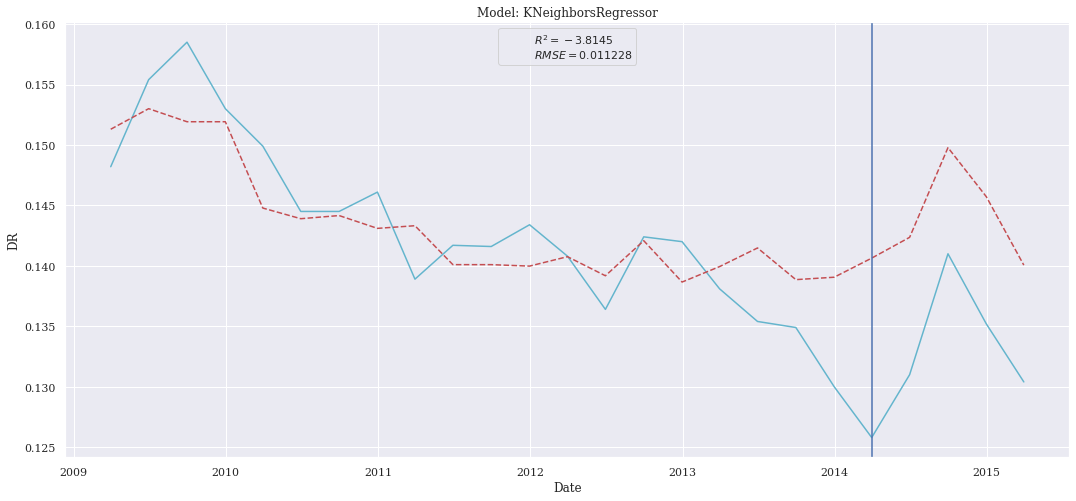

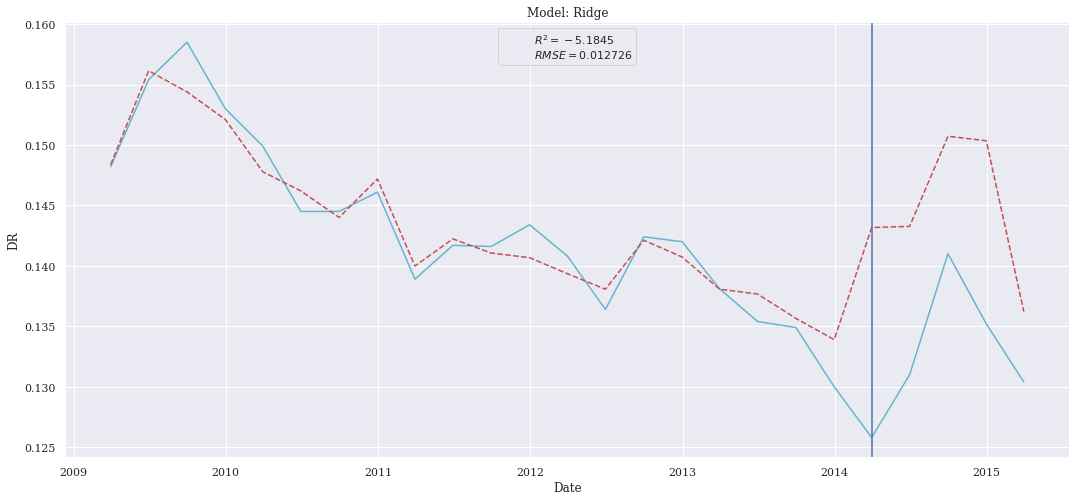

/opt/anaconda3/envs/cvxpy_env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/envs/cvxpy_env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


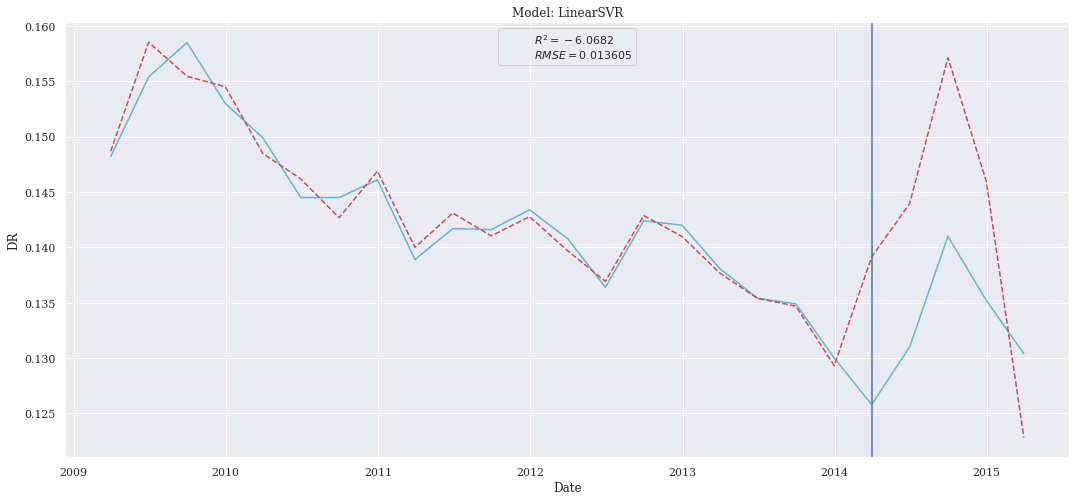

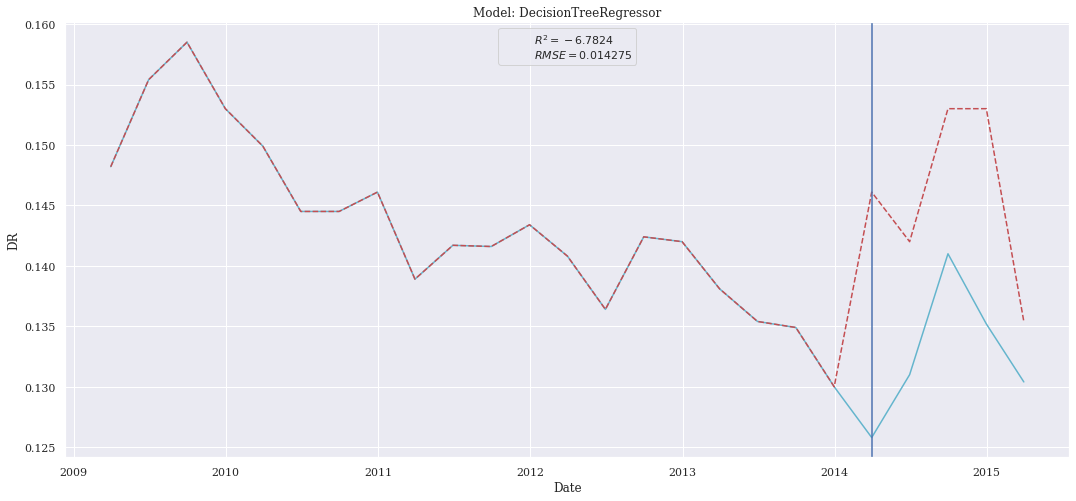

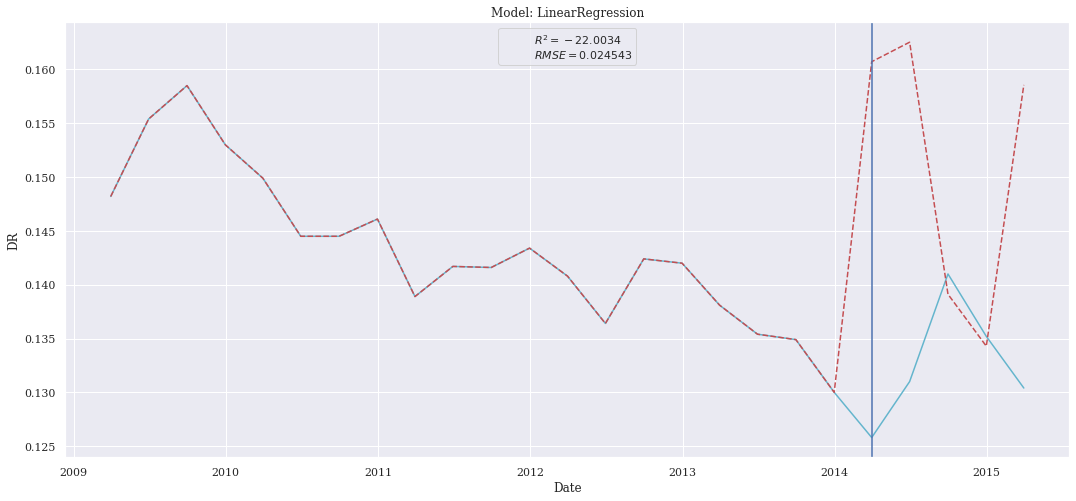

In [55]:
for i in range(summary.shape[0]): 
  y_train_pred = y_pred(X_train,y_train,X_train,y_train,model=summary.index[i])
  y_test_pred = y_pred(X_train,y_train,X_test,y_test,model=summary.index[i])
  plot_pred_detail(y_train,y_test,y_train_pred,y_test_pred,index,name_model=summary.index[i],df_score=summary)

### Tree-Based Features

In [56]:
X_train, X_test, y_train, y_test,X_validation = clean_data(data,start,chronique=chronique,period=period,col_used=cl.col_8_tree,split=split,norm=norm)
summary = summary_ml(X_train,y_train,X_test,y_test)
summary

/opt/anaconda3/envs/cvxpy_env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


rmse       mse       mae        r2
Index                                                        
LinearSVR              0.008507  0.000072  0.008349 -1.763723
CatBoostRegressor      0.012208  0.000149  0.011652 -4.691655
Ridge                  0.012295  0.000151  0.012011 -4.772532
XGBRegressor           0.012894  0.000166  0.012258 -5.348982
LinearRegression       0.013728  0.000188  0.012543 -6.197044
DecisionTreeRegressor  0.013811  0.000191  0.012340 -6.284233
KNeighborsRegressor    0.014028  0.000197  0.013516 -6.514924

/opt/anaconda3/envs/cvxpy_env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/envs/cvxpy_env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


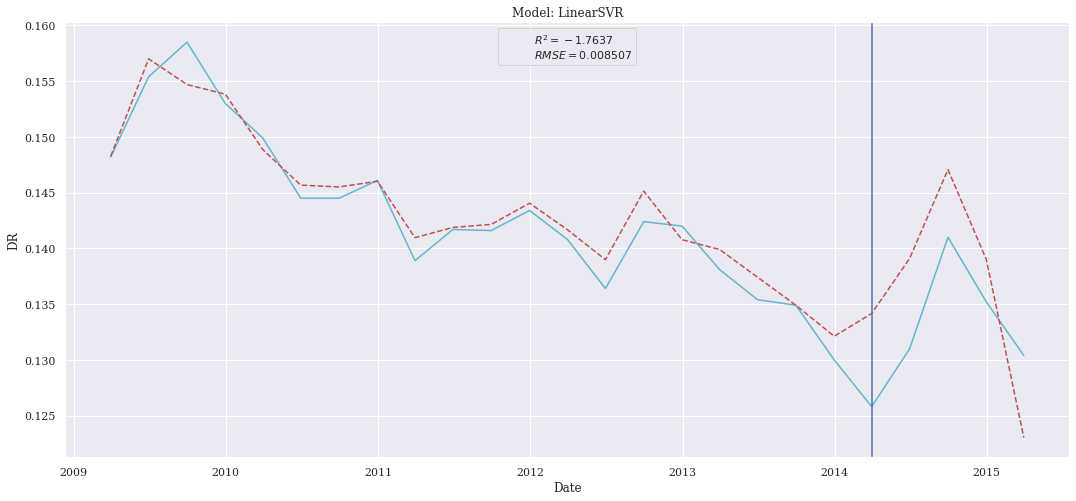

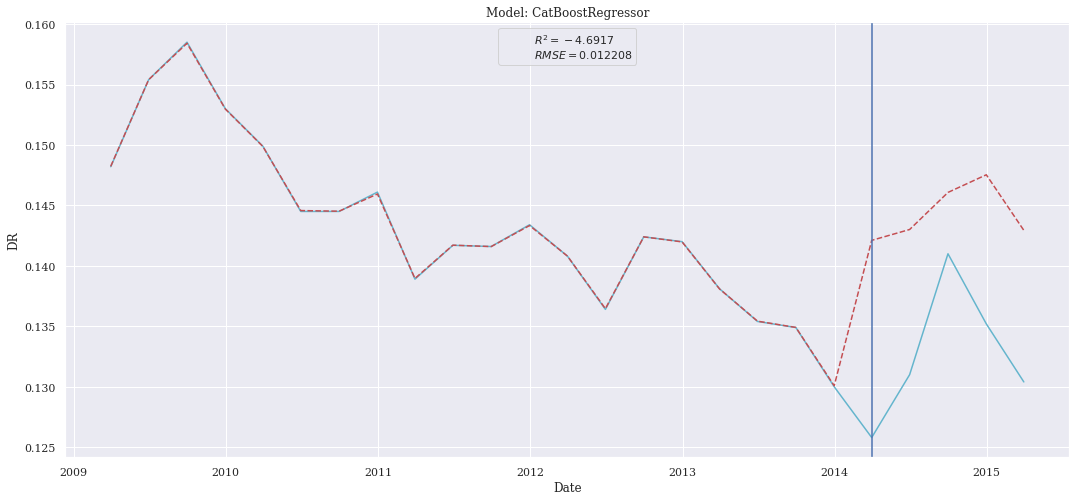

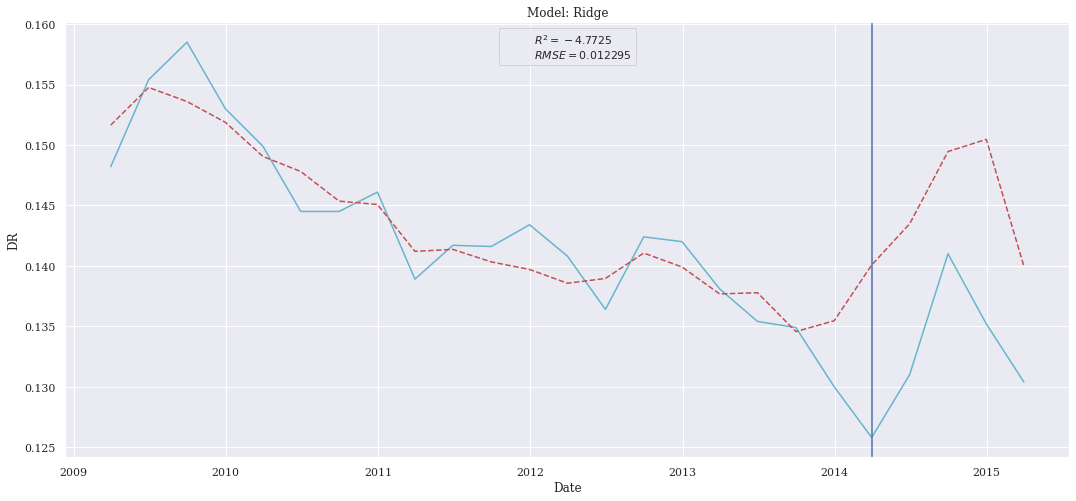

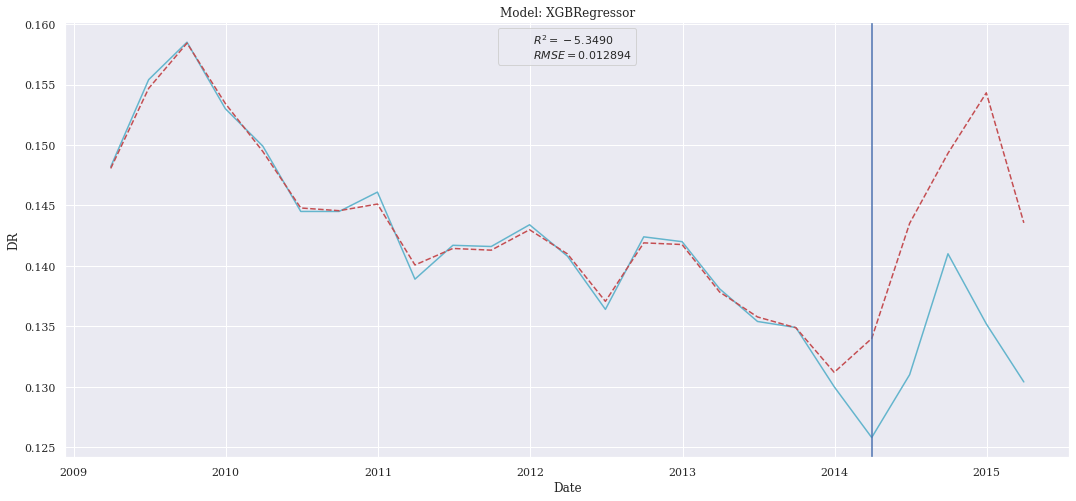

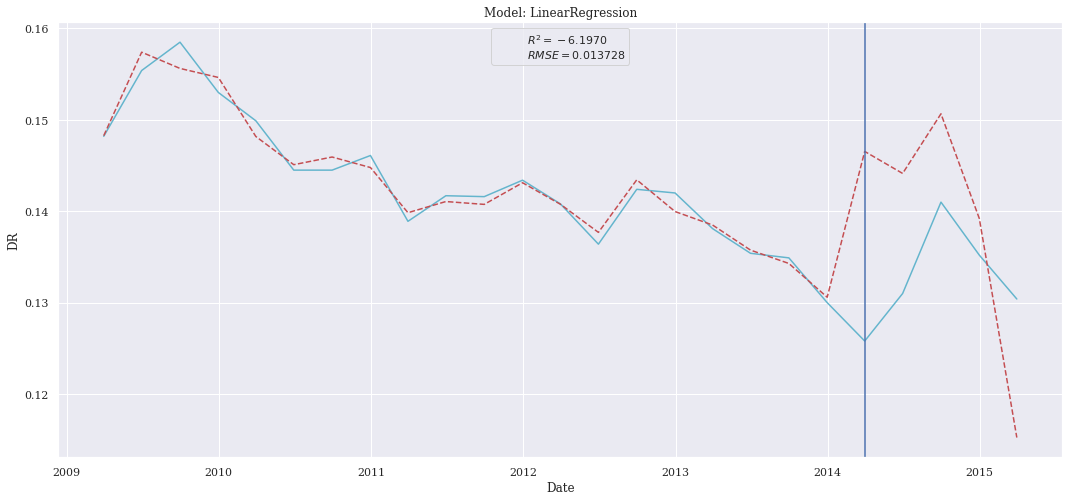

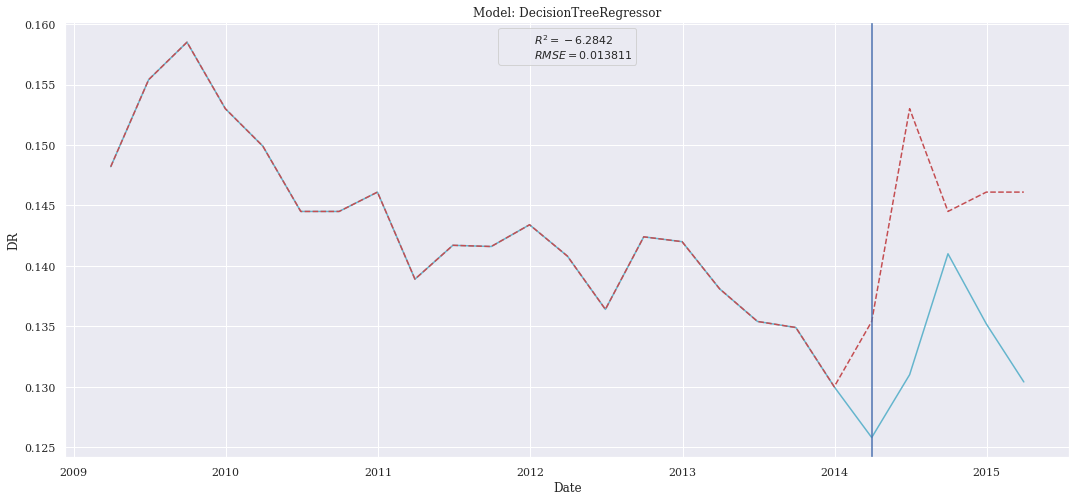

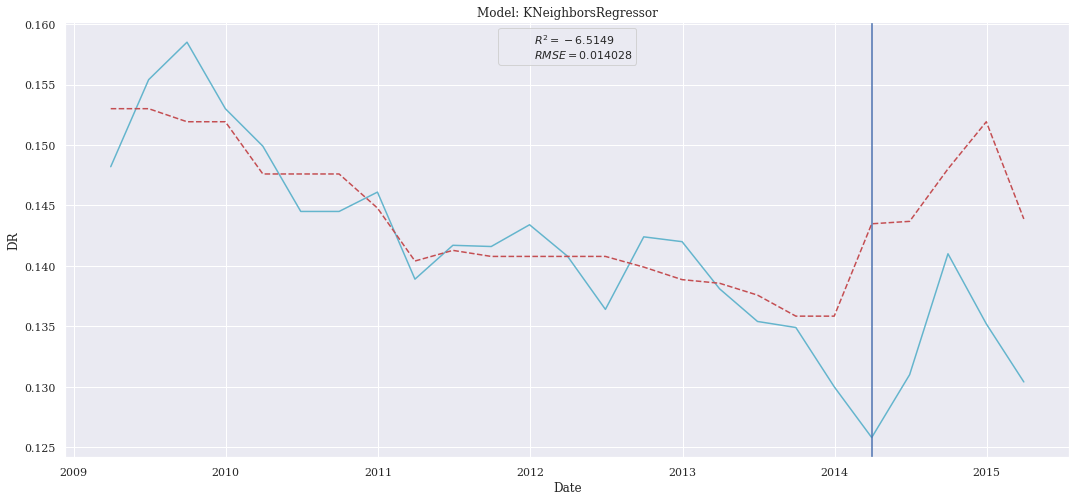

In [57]:
for i in range(summary.shape[0]): 
  y_train_pred = y_pred(X_train,y_train,X_train,y_train,model=summary.index[i])
  y_test_pred = y_pred(X_train,y_train,X_test,y_test,model=summary.index[i])
  plot_pred_detail(y_train,y_test,y_train_pred,y_test_pred,index,name_model=summary.index[i],df_score=summary)

### Sequential Forward Features

In [58]:
X_train, X_test, y_train, y_test,X_validation = clean_data(data,start,chronique=chronique,period=period,col_used=cl.col_8_seq_for,split=split,norm=norm)
summary = summary_ml(X_train,y_train,X_test,y_test)
summary

/opt/anaconda3/envs/cvxpy_env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


rmse       mse       mae         r2
Index                                                         
DecisionTreeRegressor  0.011381  0.000130  0.010740  -3.946612
CatBoostRegressor      0.012019  0.000144  0.011561  -4.516548
XGBRegressor           0.013520  0.000183  0.012468  -5.980429
Ridge                  0.013571  0.000184  0.013329  -6.033741
KNeighborsRegressor    0.014790  0.000219  0.014096  -7.354063
LinearSVR              0.022533  0.000508  0.021356 -18.389763
LinearRegression       0.025185  0.000634  0.023577 -23.222385

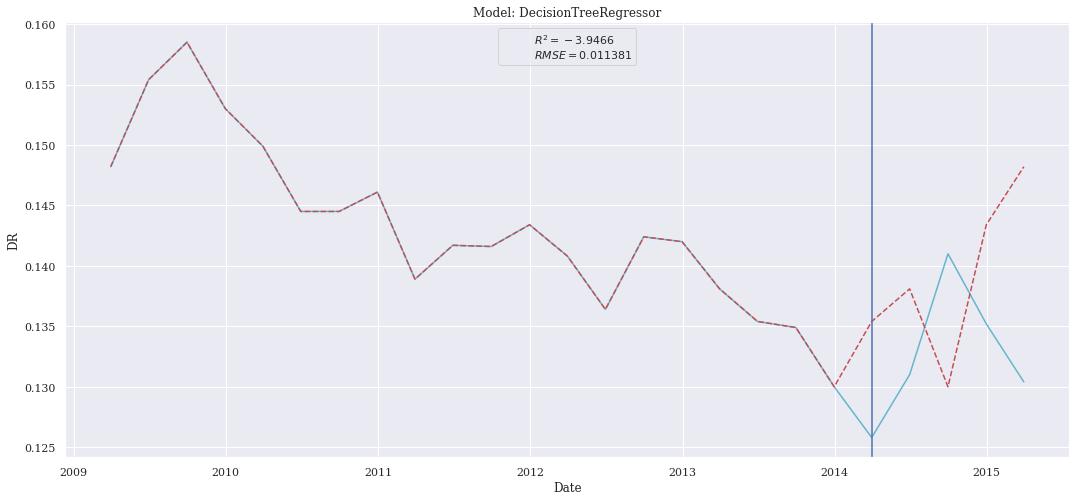

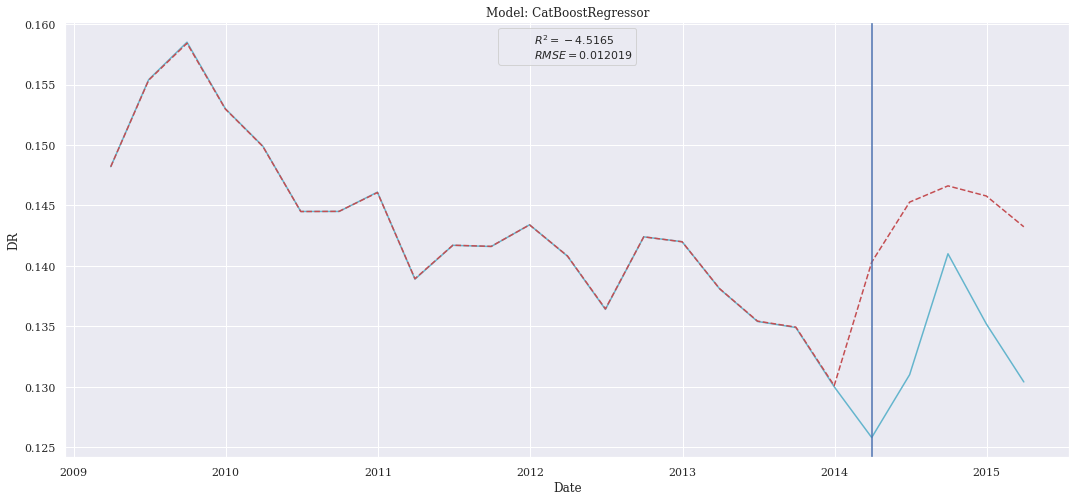

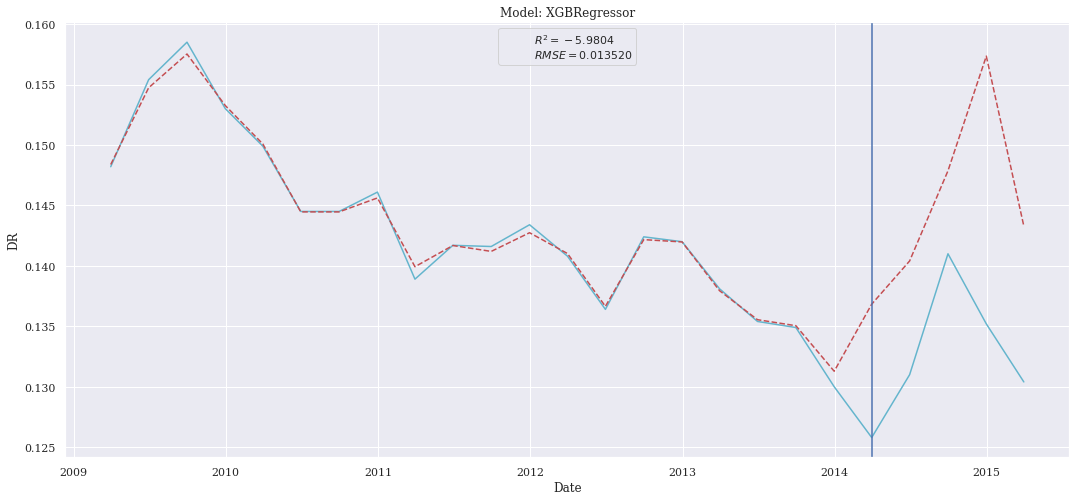

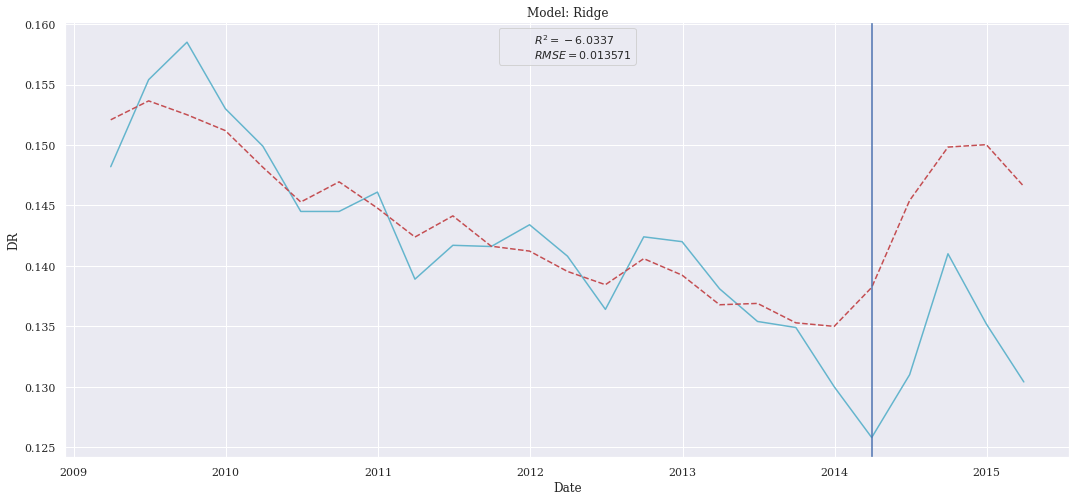

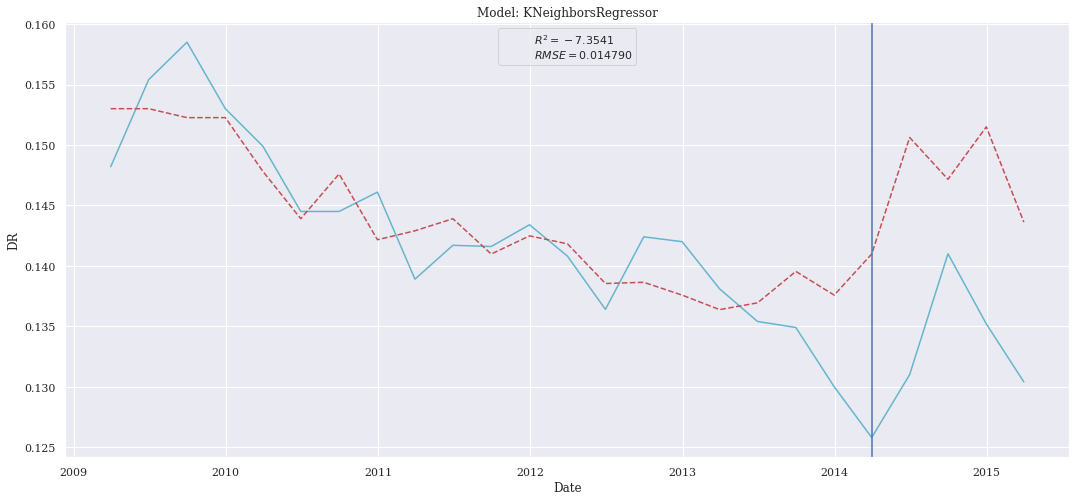

/opt/anaconda3/envs/cvxpy_env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/envs/cvxpy_env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


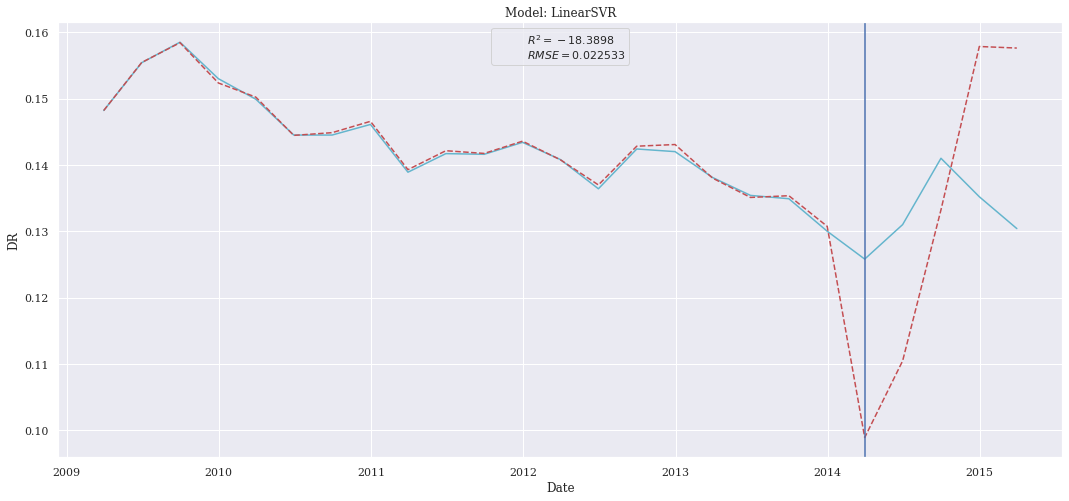

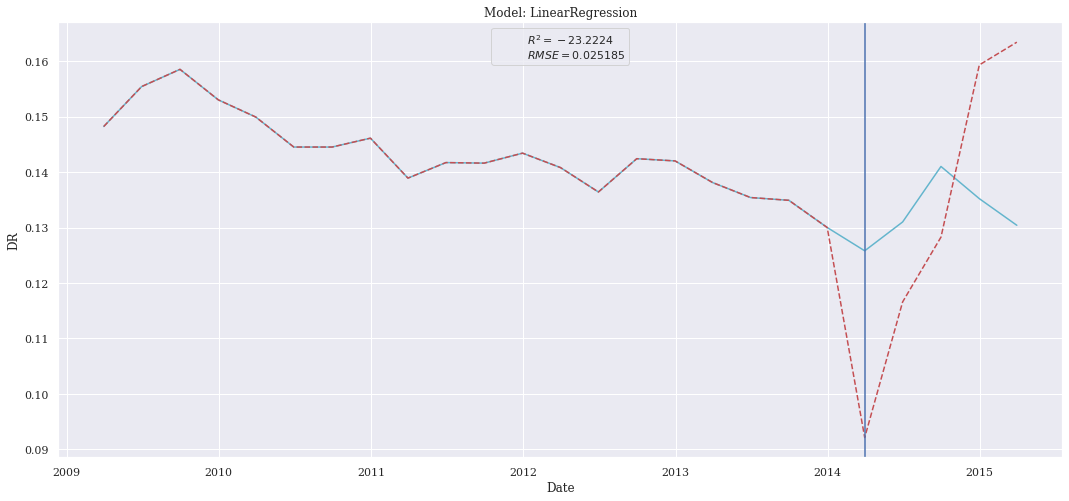

In [59]:
for i in range(summary.shape[0]):
  y_train_pred = y_pred(X_train,y_train,X_train,y_train,model=summary.index[i])
  y_test_pred = y_pred(X_train,y_train,X_test,y_test,model=summary.index[i])
  plot_pred_detail(y_train,y_test,y_train_pred,y_test_pred,index,name_model=summary.index[i],df_score=summary)

### Sequential Backward Features

In [60]:
X_train, X_test, y_train, y_test,X_validation = clean_data(data,start,chronique=chronique,period=period,col_used=cl.col_8_seq_bac,split=split,norm=norm)
summary = summary_ml(X_train,y_train,X_test,y_test)
summary

/opt/anaconda3/envs/cvxpy_env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


rmse       mse       mae         r2
Index                                                         
XGBRegressor           0.011099  0.000123  0.009691  -3.704108
Ridge                  0.011565  0.000134  0.011039  -4.107726
CatBoostRegressor      0.011700  0.000137  0.011084  -4.227245
KNeighborsRegressor    0.012933  0.000167  0.012756  -5.387978
DecisionTreeRegressor  0.016286  0.000265  0.013740  -9.128697
LinearRegression       0.023958  0.000574  0.022571 -20.920597
LinearSVR              0.028125  0.000791  0.024558 -29.207166

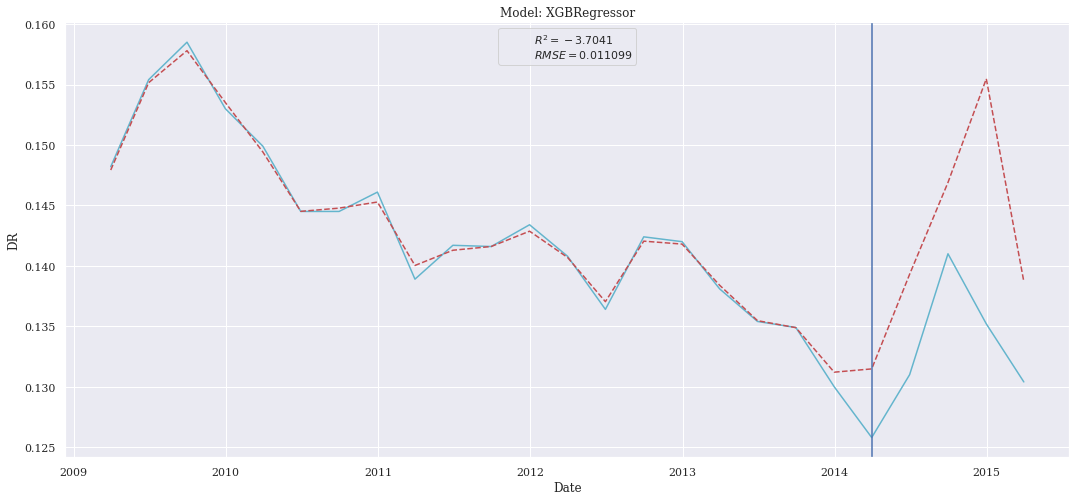

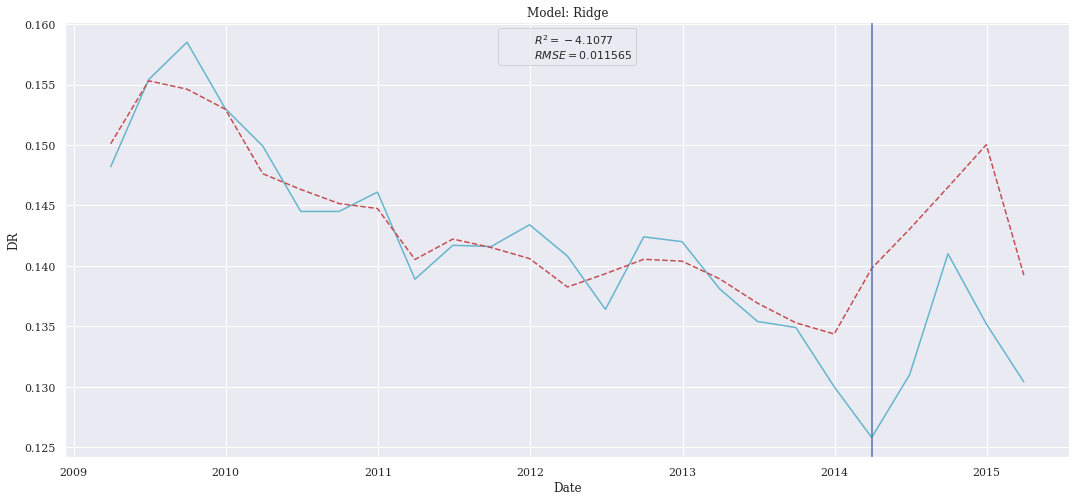

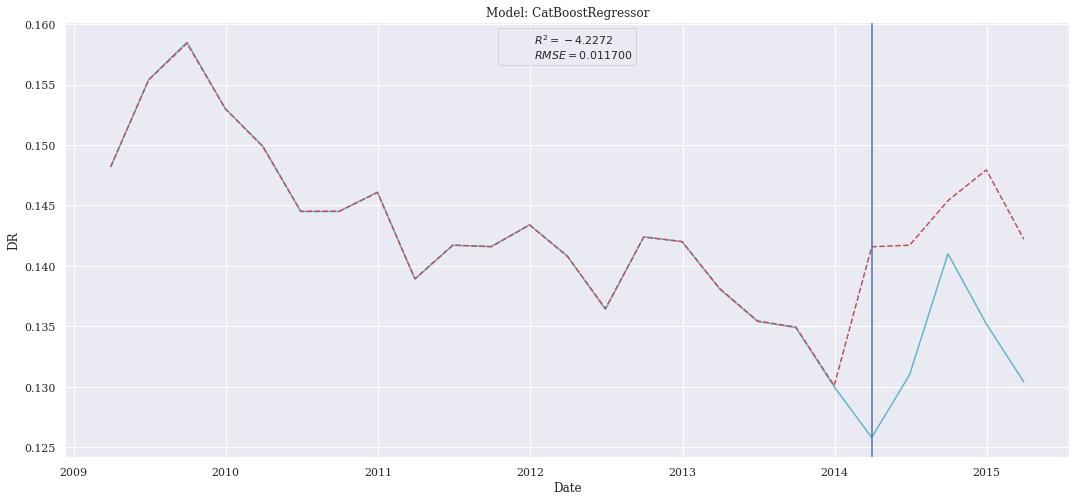

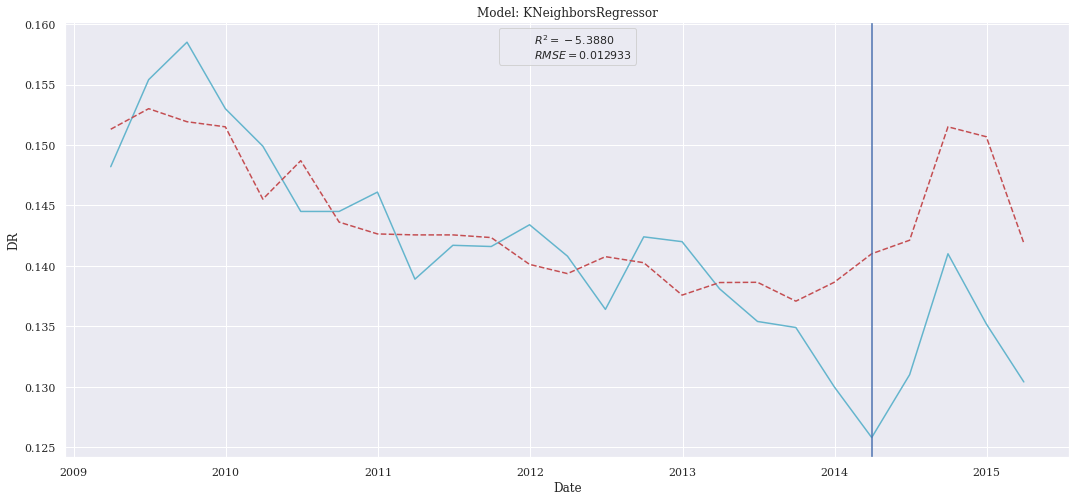

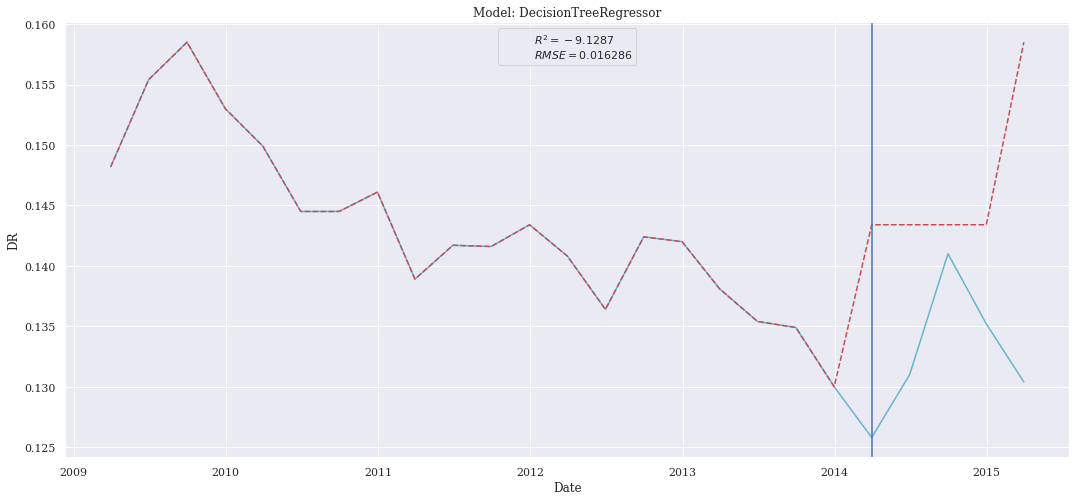

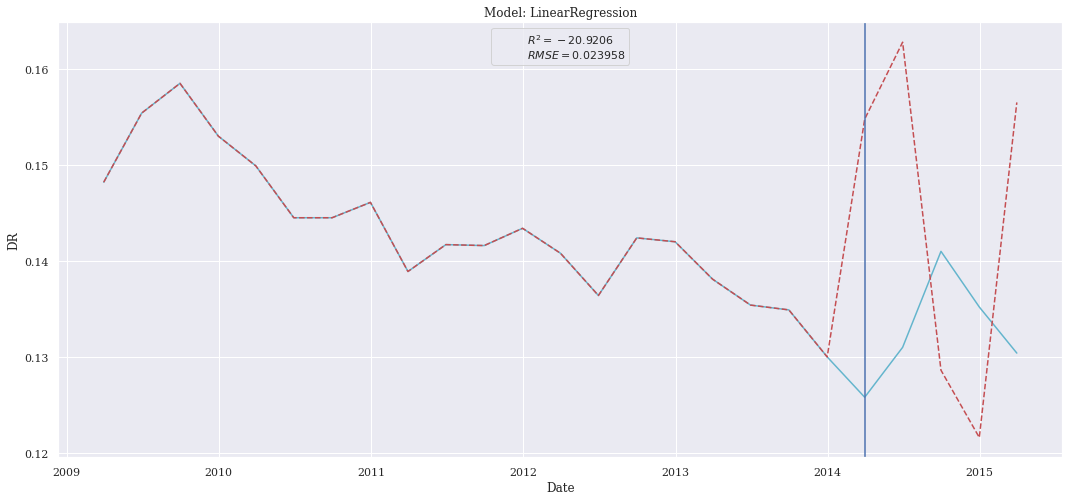

/opt/anaconda3/envs/cvxpy_env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/envs/cvxpy_env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


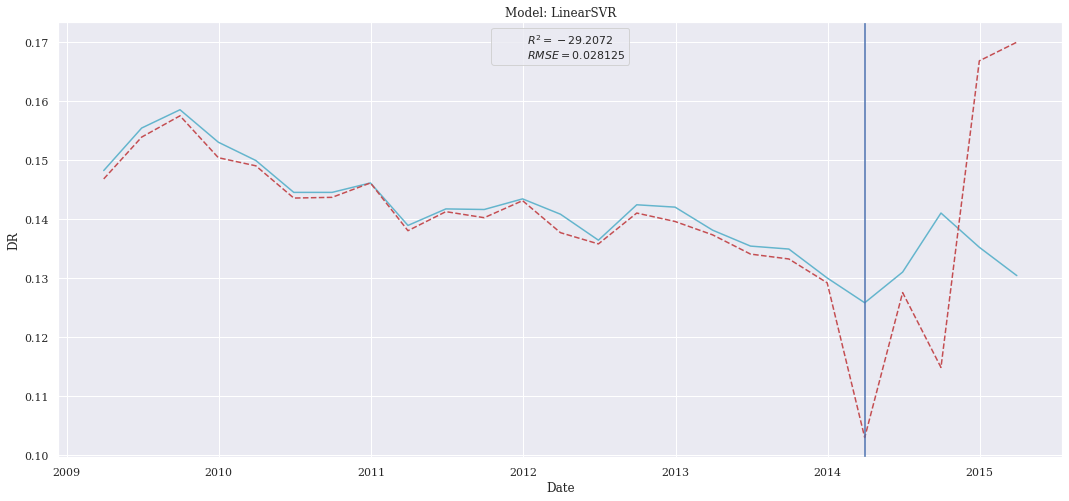

In [61]:
for i in range(summary.shape[0]):
  y_train_pred = y_pred(X_train,y_train,X_train,y_train,model=summary.index[i])
  y_test_pred = y_pred(X_train,y_train,X_test,y_test,model=summary.index[i])
  plot_pred_detail(y_train,y_test,y_train_pred,y_test_pred,index,name_model=summary.index[i],df_score=summary)

## First Conclusion
Ridge and DecisionTree give the best results for Kbest features and Sequential Forward Features, so we will use these two models for the GridSearch

### GridSearch on DecisionTree

In [ ]:
X_train, X_test, y_train, y_test = clean_data(data,start,b"CHR8",col_used=cl.col_8_seq_for,split=split,norm=norm)
params_tre = {"criterion":["squared_error","friedman_mse","absolute_error","poisson"],"splitter":["best"],"max_features":["auto","sqrt","log2"]}
params,score = params_grid(X_train,y_train,X_test,y_test,"tre",parameters=params_tre,metric='r2')
print(params,score)

NameError: ignored

In [ ]:
summary = summary_ml(X_train,y_train,X_test,y_test,models=["tre"],parameters={"p_tre":params})
summary

In [ ]:
y_train_pred = y_pred(X_train,y_train,X_train,y_train,model=summary.index[0],parameters={"p_tre":params})
y_test_pred = y_pred(X_train,y_train,X_test,y_test,model=summary.index[0],parameters={"p_tre":params})
plot_pred_detail(y_train,y_test,y_train_pred,y_test_pred,index[start:],name_model=summary.index[0],df_score=summary)

### GridSearch on Ridge

In [ ]:
X_train, X_test, y_train, y_test = clean_data(data,start,b"CHR8",col_used=cl.col_8_kbest,split=split,norm=norm)
params_rid = {"alpha":[1],"fit_intercept":[True,False],"solver":["auto","svd","cholesky","lsqr","sparse_cg","sag","saga"]}
params,score = params_grid(X_train,y_train,X_test,y_test,"rid",parameters=params_rid)
print(params,score)

In [ ]:
summary = summary_ml(X_train,y_train,X_test,y_test,models=["rid"],parameters={"p_rid":params})
summary

In [ ]:
y_train_pred = y_pred(X_train,y_train,X_train,y_train,model=summary.index[0],parameters={"p_tre":params})
y_test_pred = y_pred(X_train,y_train,X_test,y_test,model=summary.index[0],parameters={"p_tre":params})
plot_pred_detail(y_train,y_test,y_train_pred,y_test_pred,index[start:],name_model=summary.index[0],df_score=summary)

## Final Conclusion
Grid Search is relevant for the DecisionTree model but not for the Ridge. With the Grid we obtain a r2 equals to -1.007 against -1.95 before GridSearch. Concerning the rmse is now 0.003289 against 0.003982.

In [ ]:
X_train, X_test, y_train, y_test = clean_data(data,start,chronique,col_used=cl.col_8_seq_bac,split=split,norm=norm)
summary = summary_ml(X_train,y_train,X_test,y_test)
summary

[14:46:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


rmse       mse       mae          r2
Index                                                          
CatBoostRegressor      0.007563  0.000057  0.007264   -9.610997
Ridge                  0.007698  0.000059  0.006190   -9.994203
KNeighborsRegressor    0.008714  0.000076  0.008172  -13.085827
XGBRegressor           0.009451  0.000089  0.008653  -15.571811
DecisionTreeRegressor  0.009647  0.000093  0.007820  -16.264396
LinearSVR              0.020272  0.000411  0.015724  -75.236838
LinearRegression       0.045146  0.002038  0.044147 -377.113043

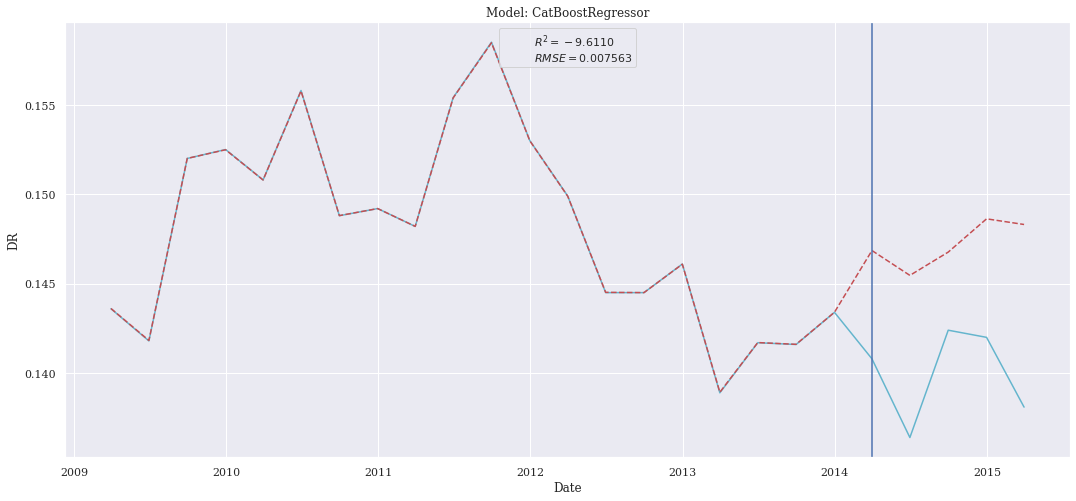

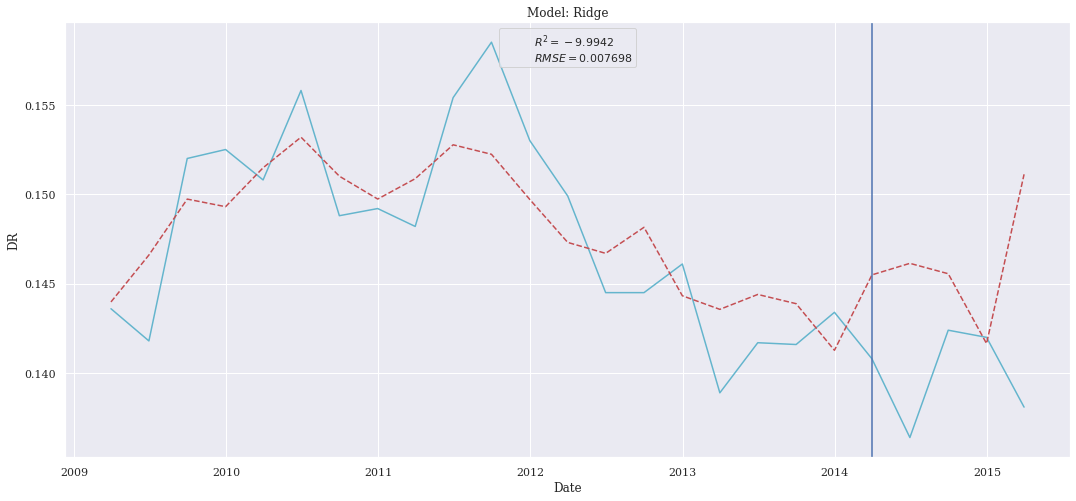

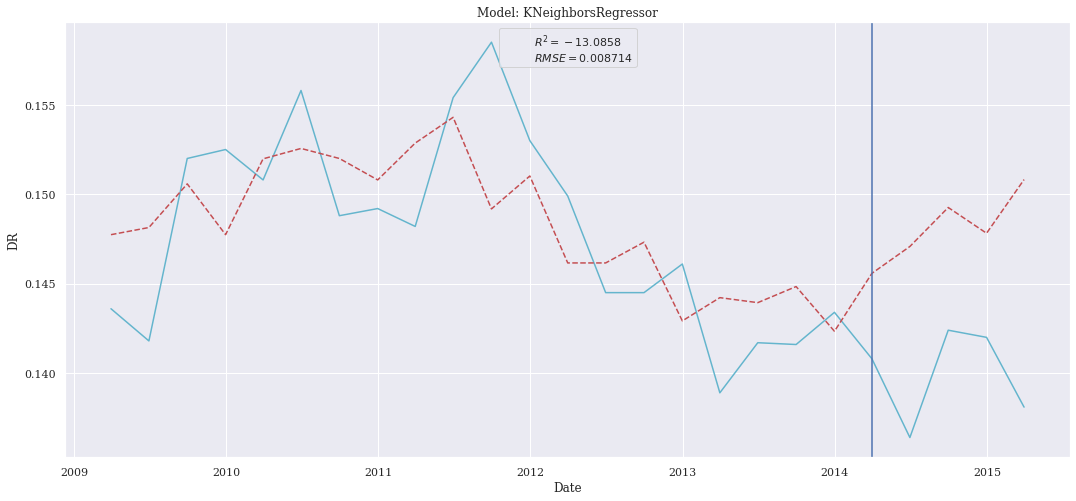

[14:46:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:46:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


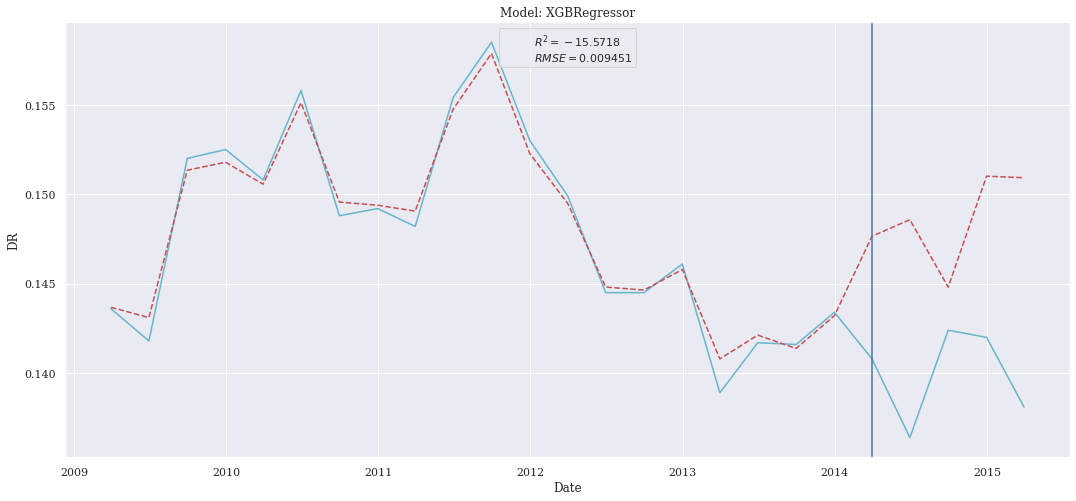

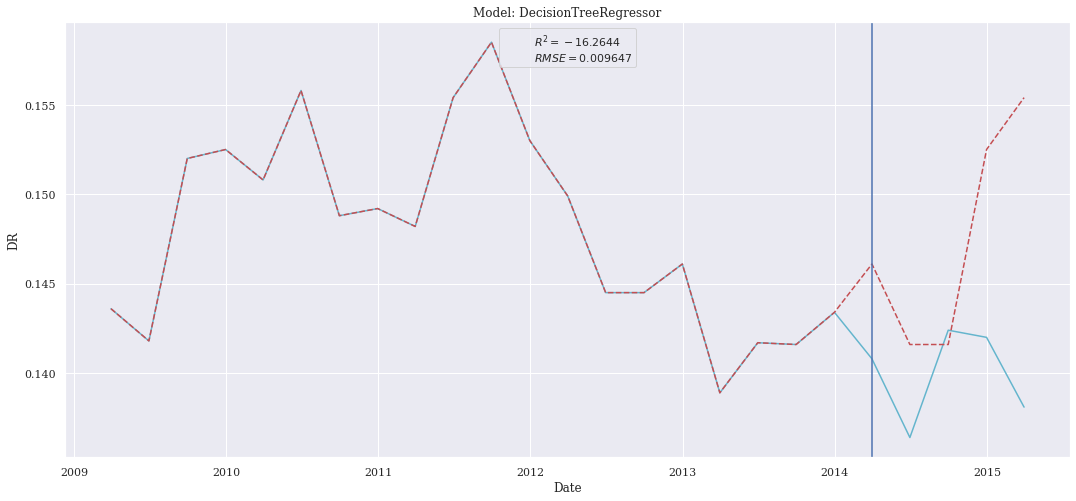

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


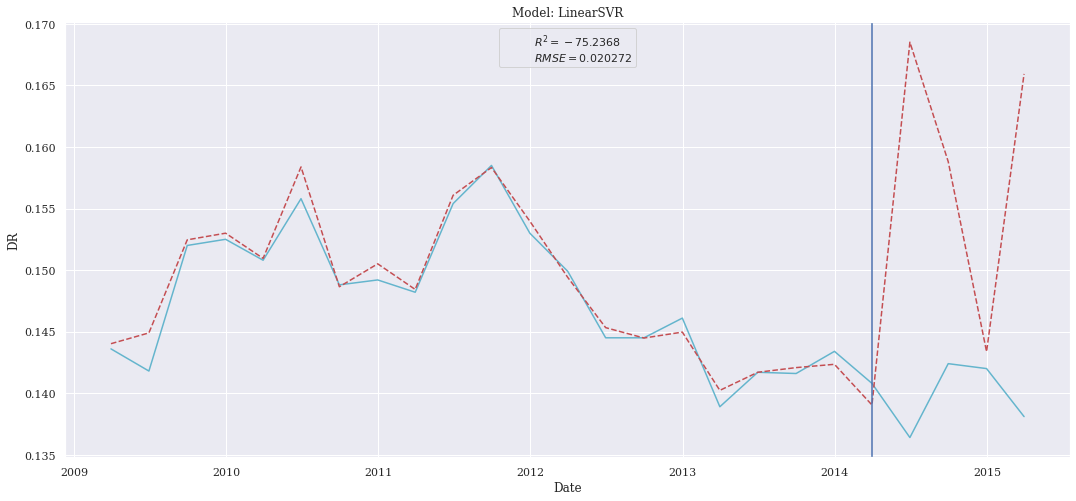

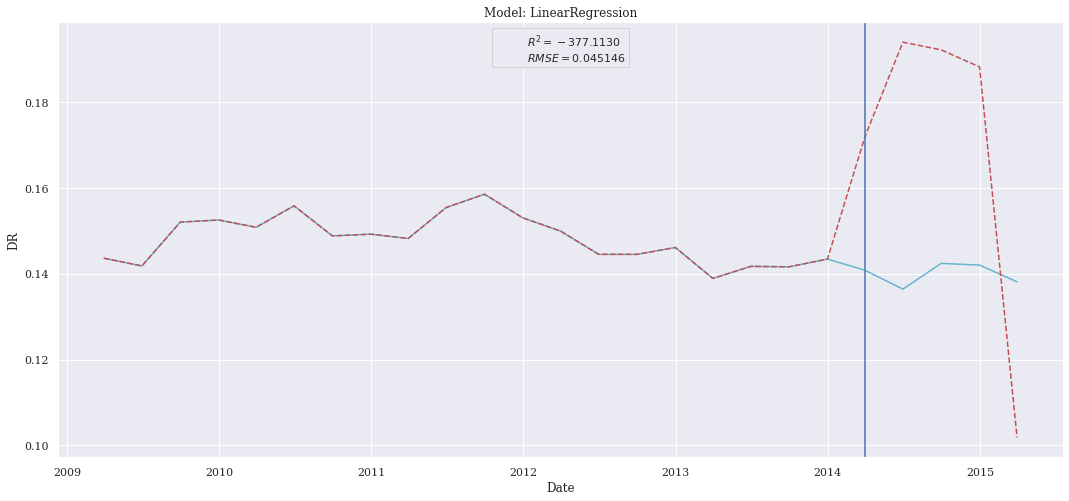

In [ ]:
for i in range(summary.shape[0]):
  y_train_pred = y_pred(X_train,y_train,X_train,y_train,model=summary.index[i])
  y_test_pred = y_pred(X_train,y_train,X_test,y_test,model=summary.index[i])
  plot_pred_detail(y_train,y_test,y_train_pred,y_test_pred,index[start:],name_model=summary.index[i],df_score=summary)

# Focus on Chronique Totale

## Machine Learning
We will focus on all the different features selection and after we choose the best model, with the best features we will focus on doing a grid search on this model

In [4]:
chronique=b'Totale'
start = 1
norm = "MinMax"
split = 0.2
period=24
# Useful to plot the model 
X_train, X_test, y_train, y_test,X_validation = clean_data(data,start,chronique=chronique,period=period,col_used=cl.col_2_corr,split=split,norm=norm)
index = pd.concat([X_train, X_test], axis=1).index

### Correlation Features

In [17]:
X_train, X_test, y_train, y_test,X_validation = clean_data(data,start,chronique=chronique,period=period,col_used=cl.col_totale_corr,split=split,norm=norm)
summary = summary_ml(X_train,y_train,X_test,y_test)
summary

/opt/anaconda3/envs/cvxpy_env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


rmse       mse       mae         r2
Index                                                         
LinearRegression       0.001984  0.000004  0.001719 -30.325867
XGBRegressor           0.002055  0.000004  0.001820 -32.628455
CatBoostRegressor      0.002326  0.000005  0.002018 -42.082935
LinearSVR              0.002427  0.000006  0.002243 -45.914296
Ridge                  0.002451  0.000006  0.002065 -46.848980
DecisionTreeRegressor  0.002592  0.000007  0.002320 -52.503185
KNeighborsRegressor    0.002639  0.000007  0.002312 -54.448408

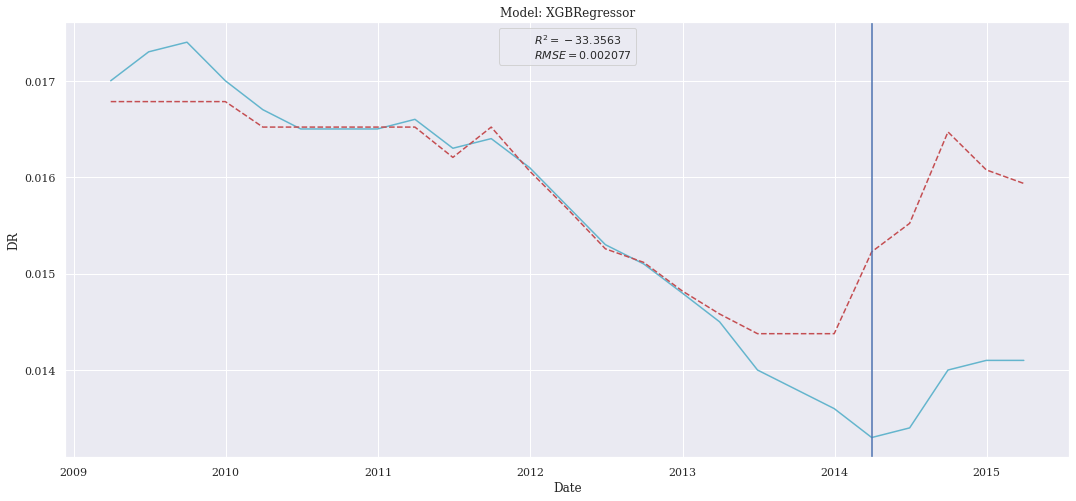

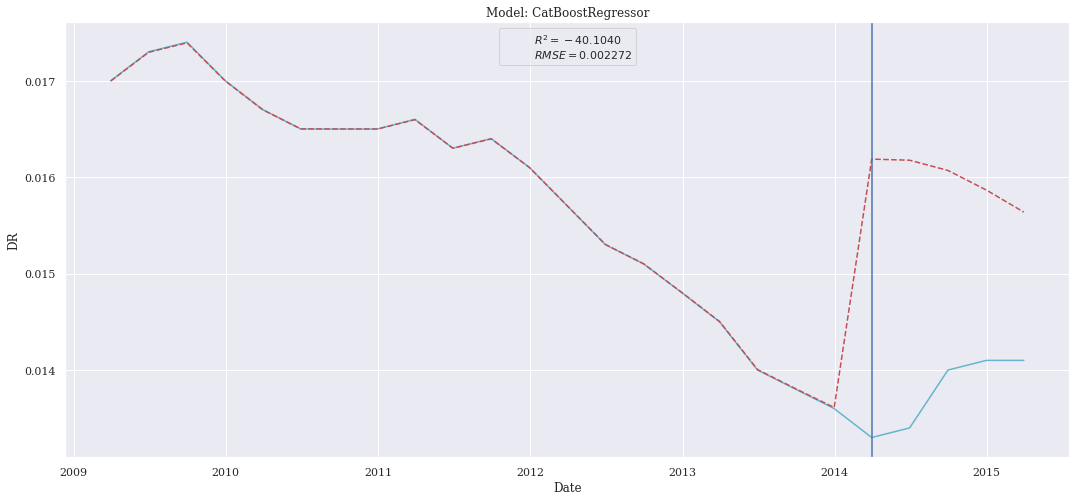

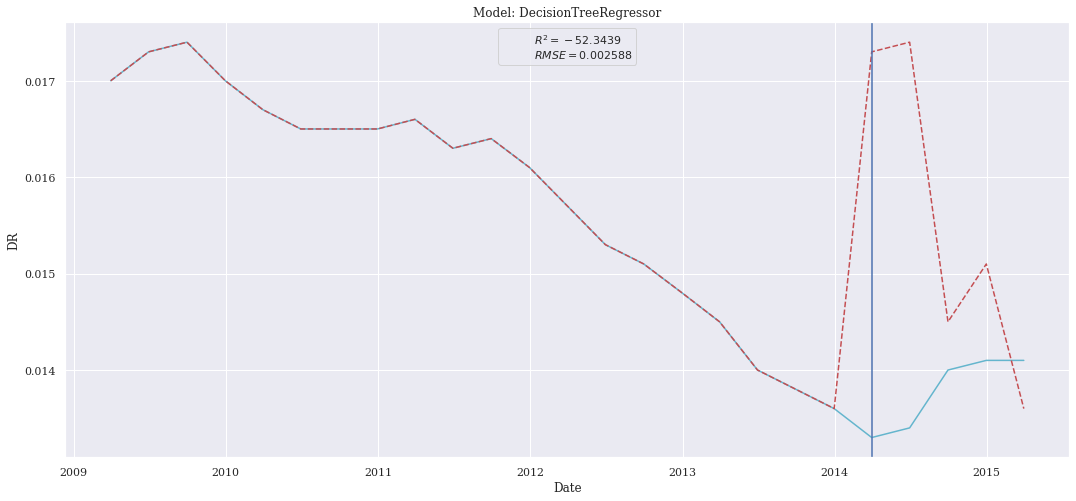

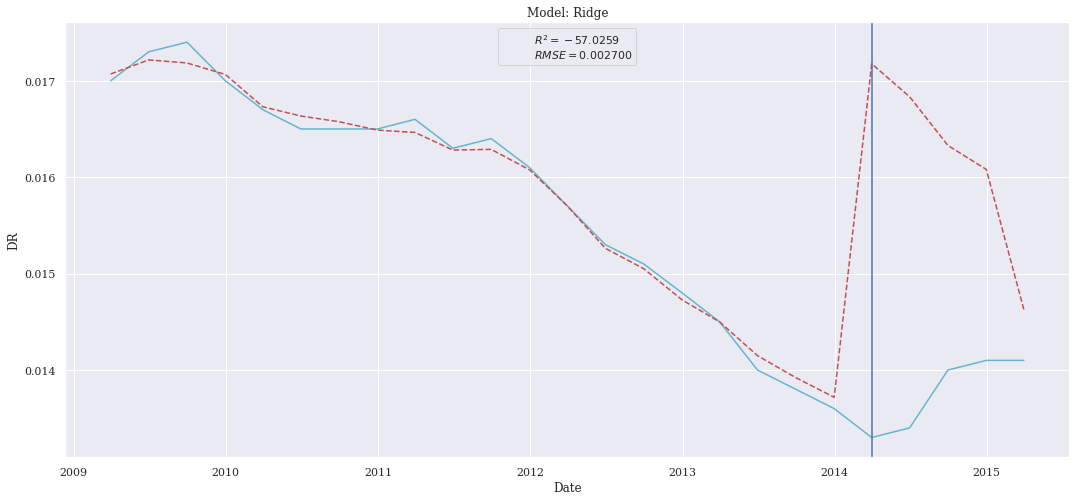

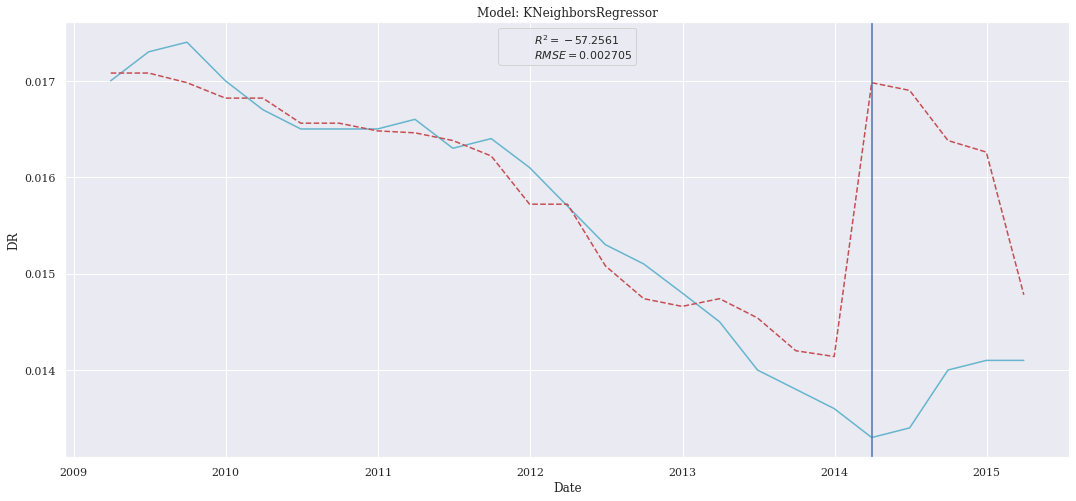

/opt/anaconda3/envs/cvxpy_env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/envs/cvxpy_env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


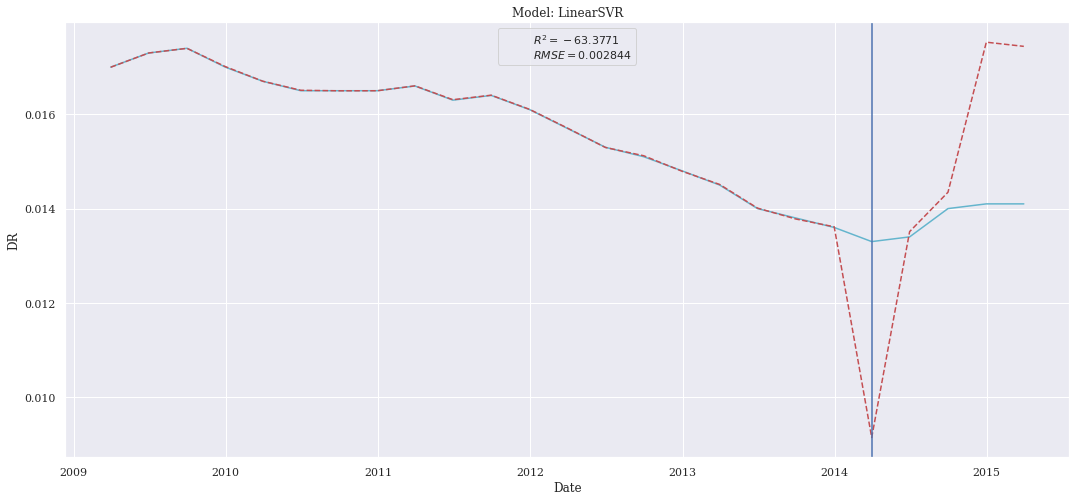

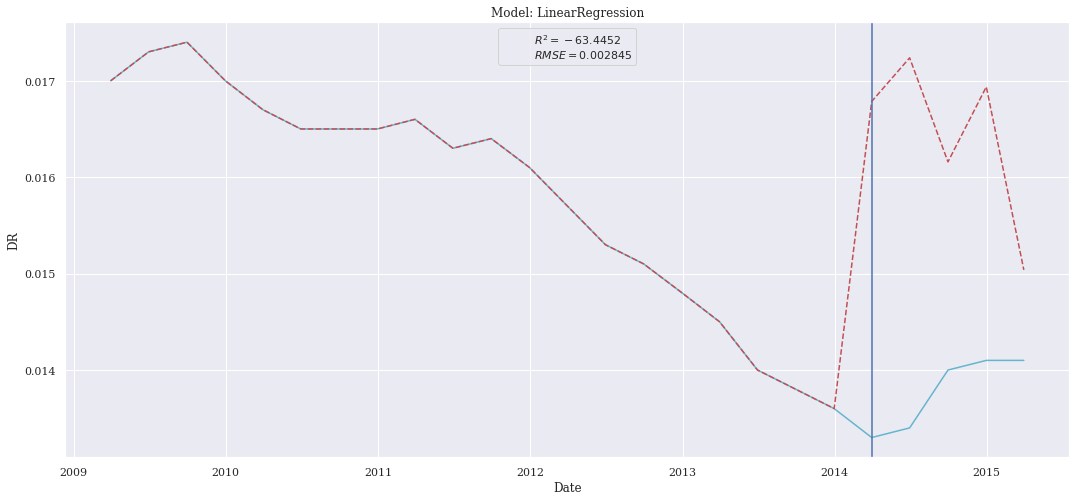

In [16]:
for i in range(summary.shape[0]): 
  y_train_pred = y_pred(X_train,y_train,X_train,y_train,model=summary.index[i])
  y_test_pred = y_pred(X_train,y_train,X_test,y_test,model=summary.index[i])
  plot_pred_detail(y_train,y_test,y_train_pred,y_test_pred,index,name_model=summary.index[i],df_score=summary)

### Low Variance Features

In [18]:
X_train, X_test, y_train, y_test,X_validation = clean_data(data,start,chronique=chronique,period=period,col_used=cl.col_totale_low_var,split=split,norm=norm)
summary = summary_ml(X_train,y_train,X_test,y_test)
summary

/opt/anaconda3/envs/cvxpy_env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


rmse       mse       mae          r2
Index                                                          
CatBoostRegressor      0.002216  0.000005  0.002076  -38.081206
XGBRegressor           0.002418  0.000006  0.002069  -45.566467
KNeighborsRegressor    0.002556  0.000007  0.002140  -51.004459
DecisionTreeRegressor  0.002589  0.000007  0.002060  -52.359873
Ridge                  0.002741  0.000008  0.002233  -58.809112
LinearRegression       0.003450  0.000012  0.002743  -93.779369
LinearSVR              0.004562  0.000021  0.003476 -164.720605

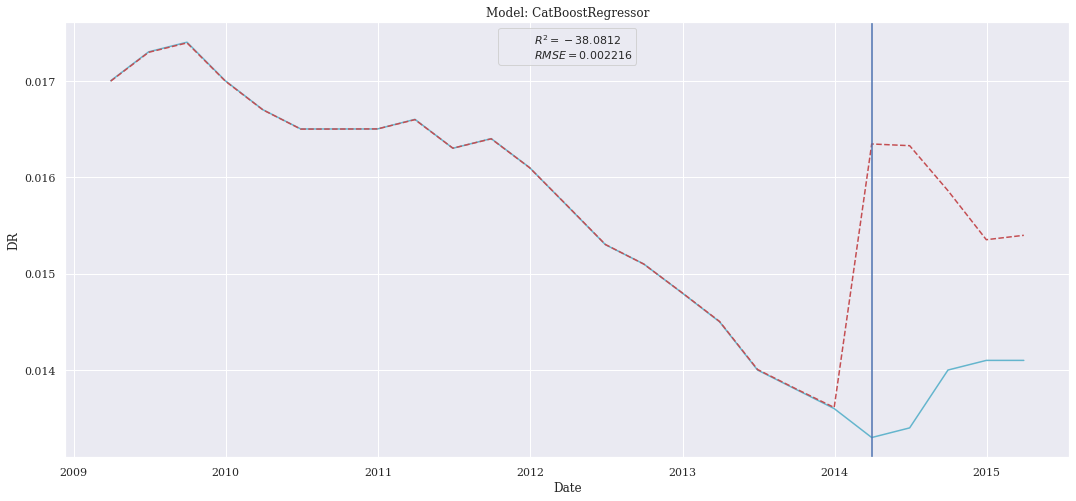

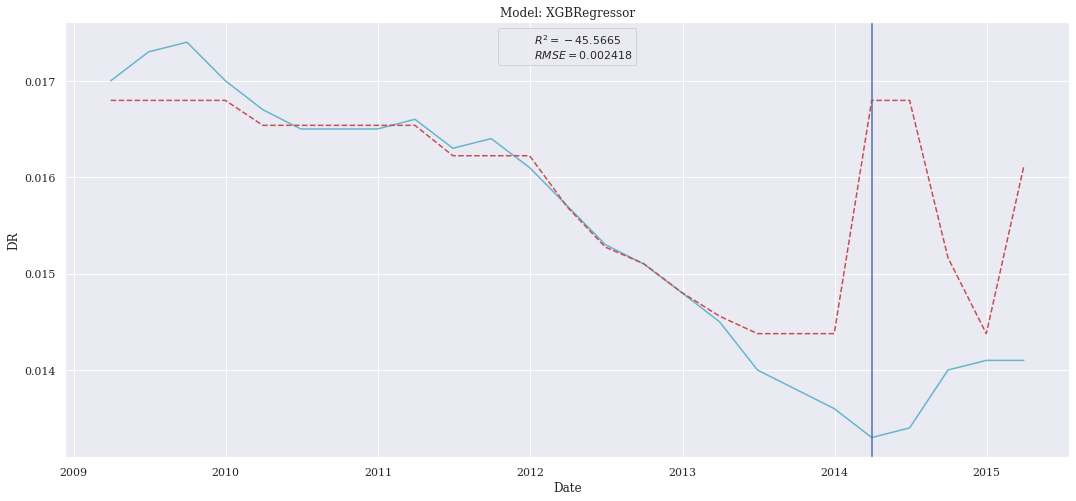

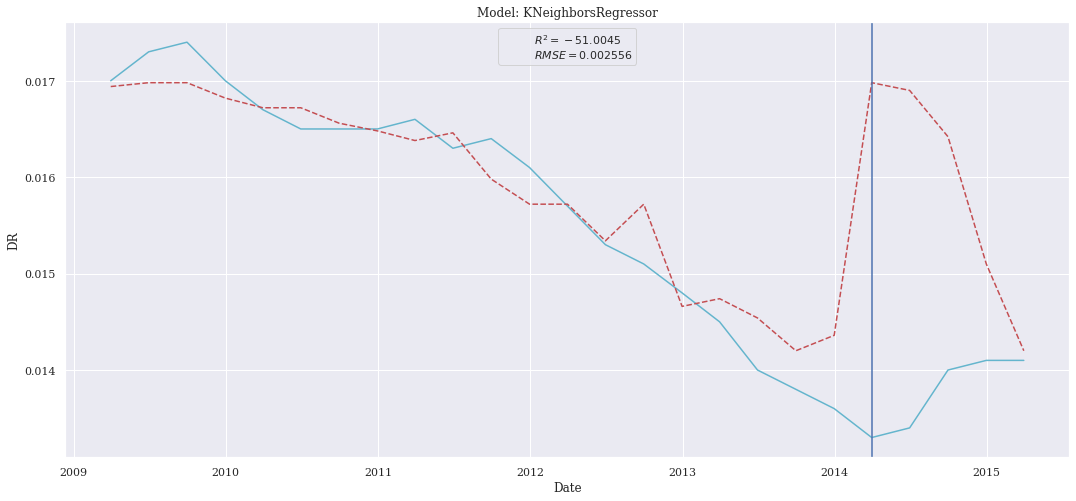

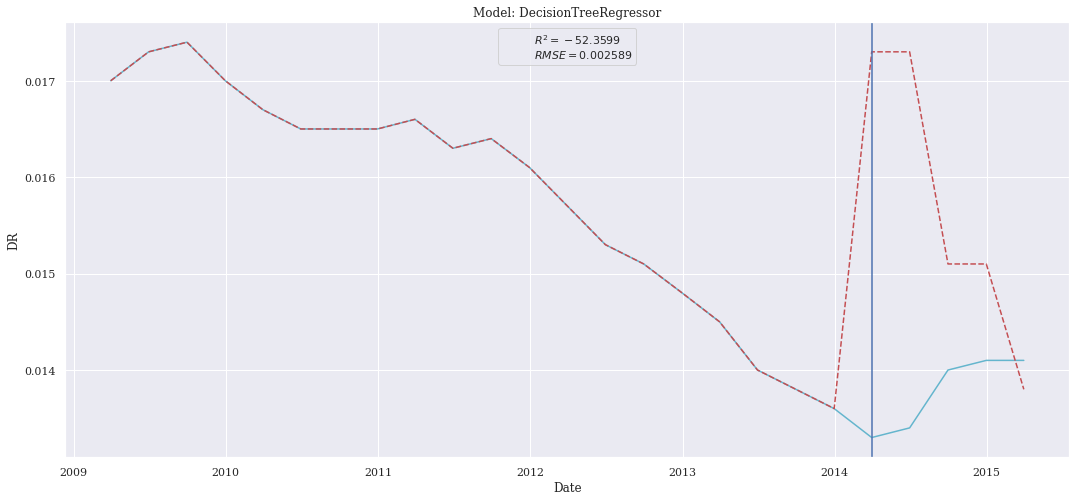

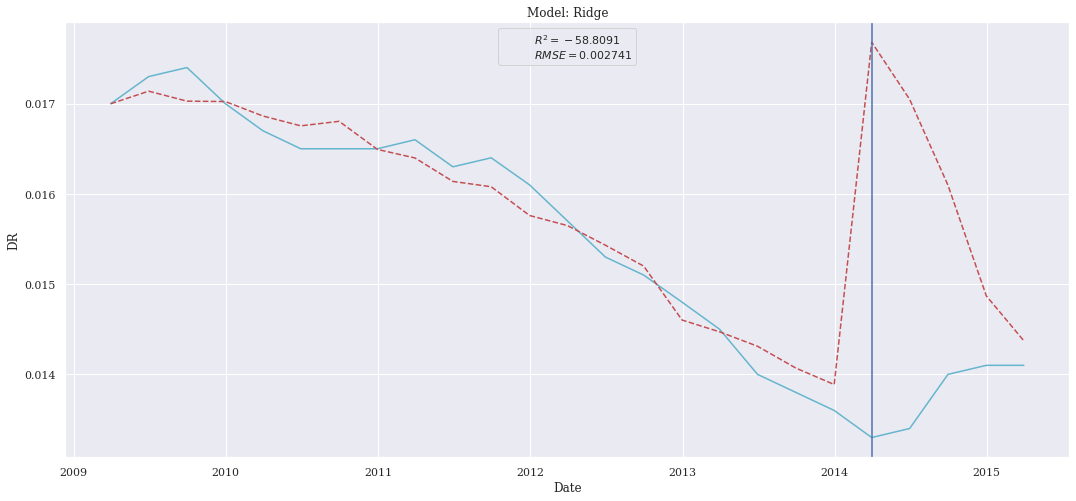

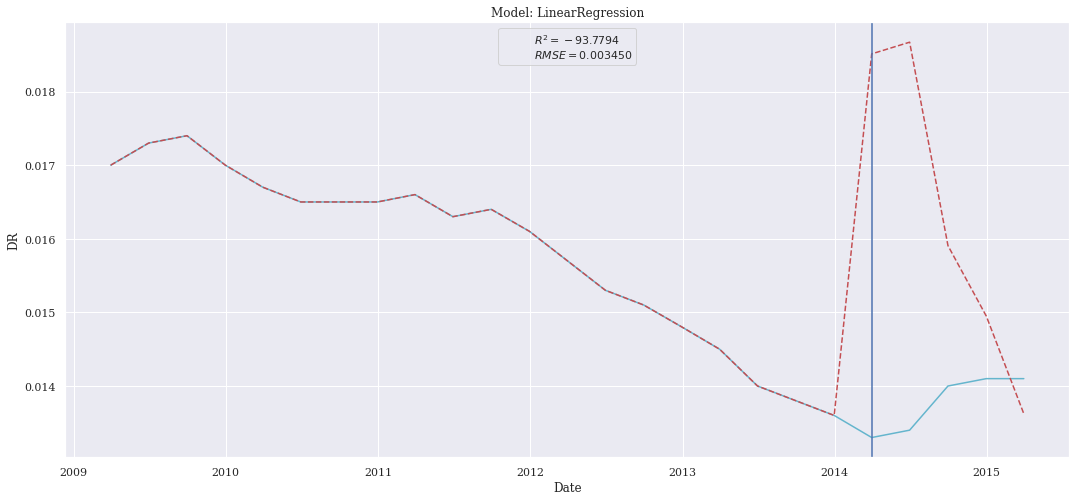

/opt/anaconda3/envs/cvxpy_env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/envs/cvxpy_env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


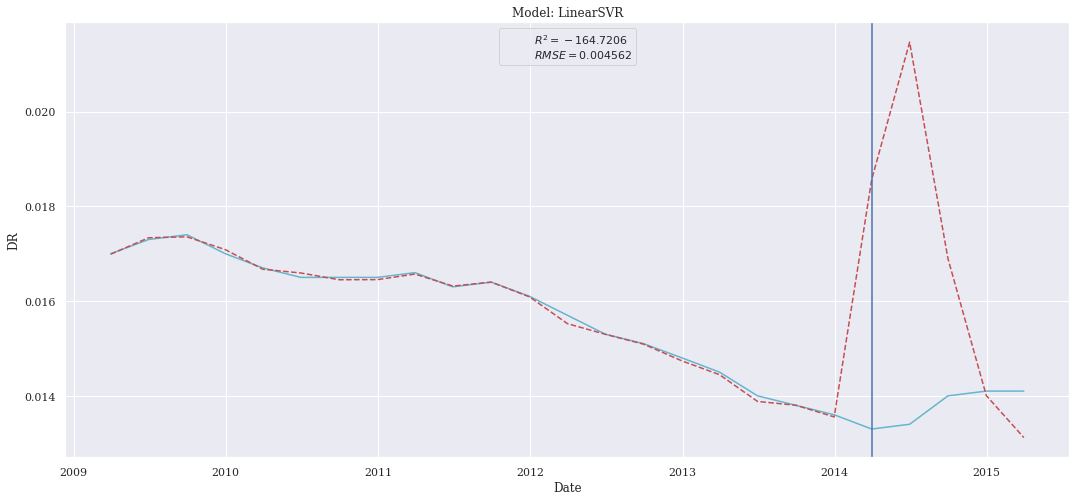

In [19]:
for i in range(summary.shape[0]): 
  y_train_pred = y_pred(X_train,y_train,X_train,y_train,model=summary.index[i])
  y_test_pred = y_pred(X_train,y_train,X_test,y_test,model=summary.index[i])
  plot_pred_detail(y_train,y_test,y_train_pred,y_test_pred,index,name_model=summary.index[i],df_score=summary)

### KBest Features

In [20]:
X_train, X_test, y_train, y_test,X_validation = clean_data(data,start,chronique=chronique,period=period,col_used=cl.col_totale_kbest,split=split,norm=norm)
summary = summary_ml(X_train,y_train,X_test,y_test)
summary

/opt/anaconda3/envs/cvxpy_env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


rmse       mse       mae         r2
Index                                                         
DecisionTreeRegressor  0.001628  0.000003  0.001600 -20.114650
XGBRegressor           0.001760  0.000003  0.001733 -23.674222
LinearSVR              0.001914  0.000004  0.001148 -28.177312
CatBoostRegressor      0.002362  0.000006  0.002224 -43.424181
Ridge                  0.002557  0.000007  0.002331 -51.038692
KNeighborsRegressor    0.002746  0.000008  0.002556 -59.022293
LinearRegression       0.003545  0.000013  0.002595 -99.043651

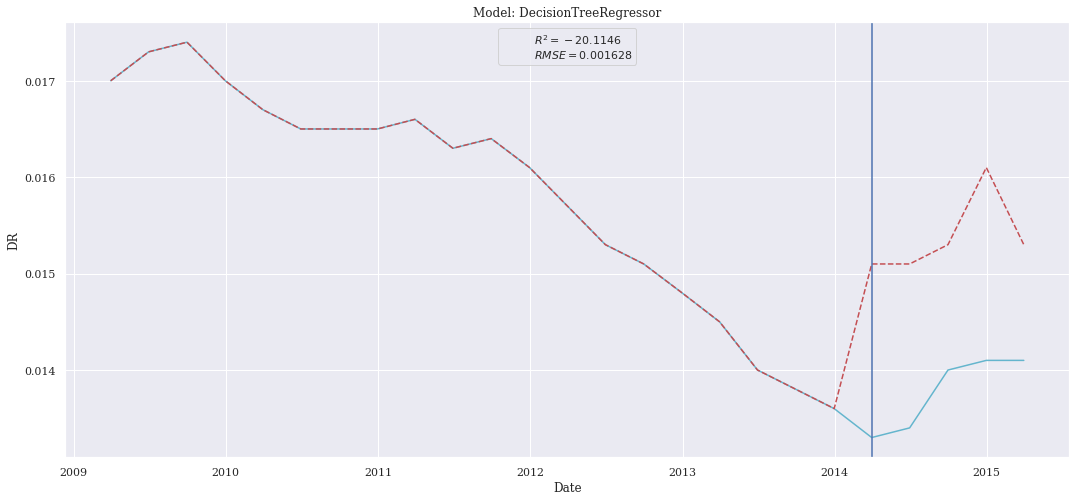

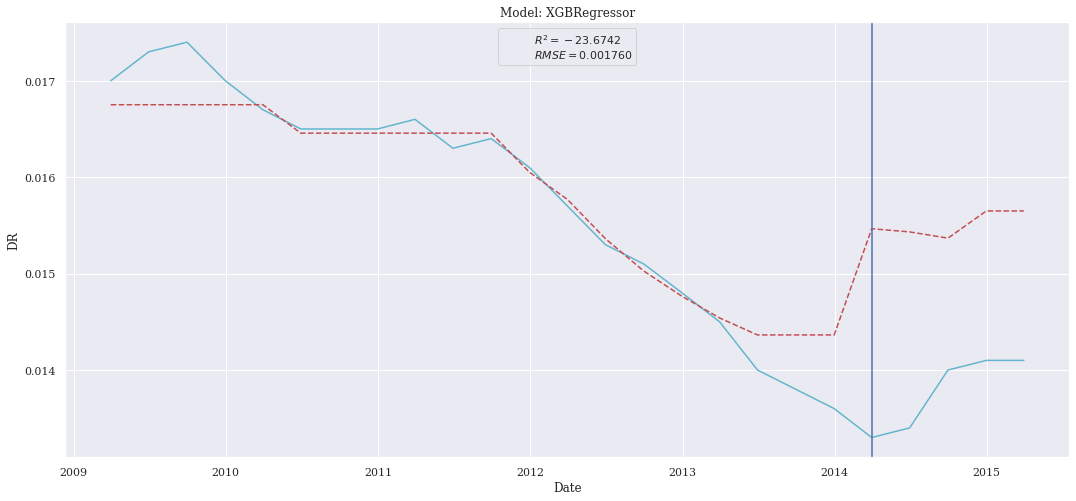

/opt/anaconda3/envs/cvxpy_env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/envs/cvxpy_env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


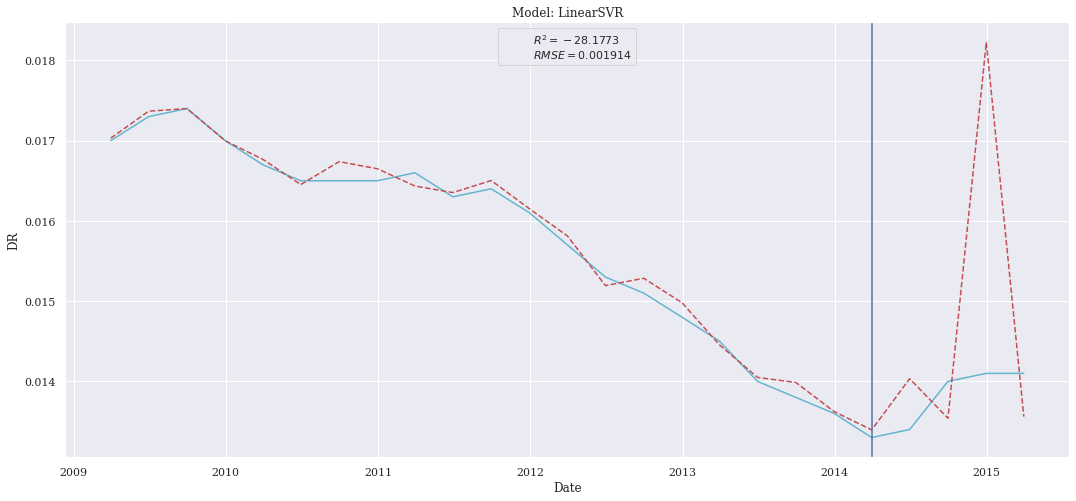

In [21]:
for i in range(summary.shape[0]): 
  y_train_pred = y_pred(X_train,y_train,X_train,y_train,model=summary.index[i])
  y_test_pred = y_pred(X_train,y_train,X_test,y_test,model=summary.index[i])
  plot_pred_detail(y_train,y_test,y_train_pred,y_test_pred,index,name_model=summary.index[i],df_score=summary)

### Recursive Features

In [ ]:
X_train, X_test, y_train, y_test,X_validation = clean_data(data,start,chronique=chronique,period=period,col_used=cl.col_totale_recur,split=split,norm=norm)
summary = summary_ml(X_train,y_train,X_test,y_test)
summary

/opt/anaconda3/envs/cvxpy_env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


rmse       mse       mae         r2
Index                                                         
XGBRegressor           0.002077  0.000004  0.002065 -33.356346
CatBoostRegressor      0.002272  0.000005  0.002208 -40.104030
DecisionTreeRegressor  0.002588  0.000007  0.002000 -52.343949
Ridge                  0.002700  0.000007  0.002430 -57.025909
KNeighborsRegressor    0.002705  0.000007  0.002480 -57.256051
LinearSVR              0.002844  0.000008  0.002278 -63.377061
LinearRegression       0.002845  0.000008  0.002652 -63.445172

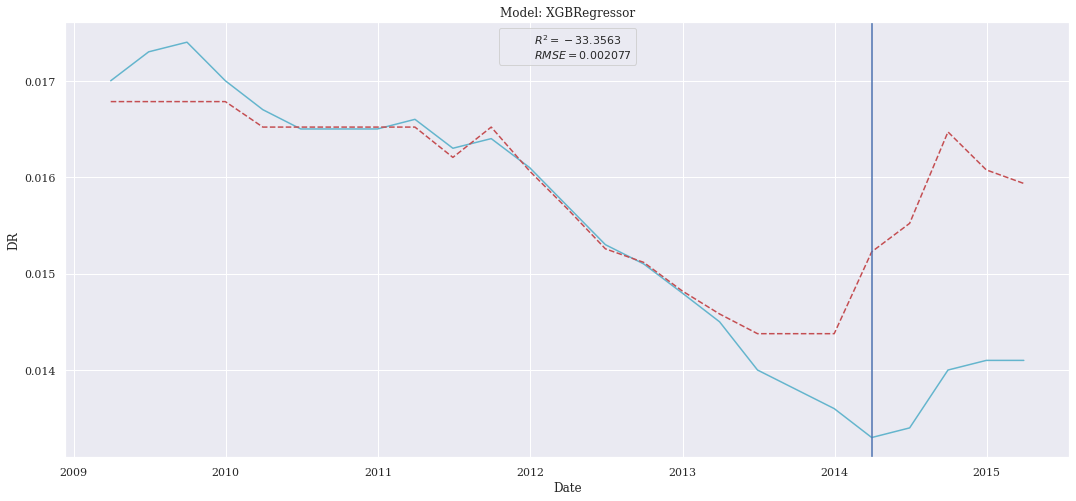

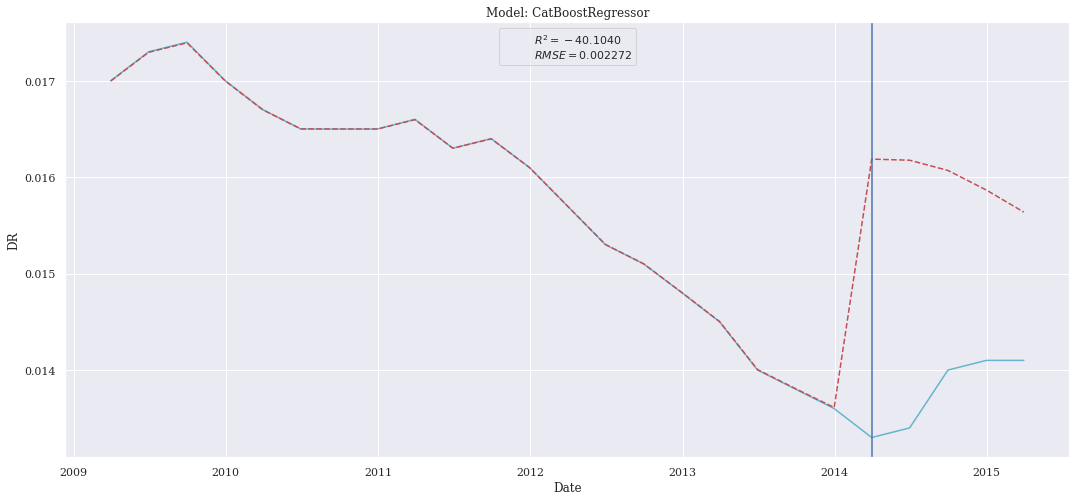

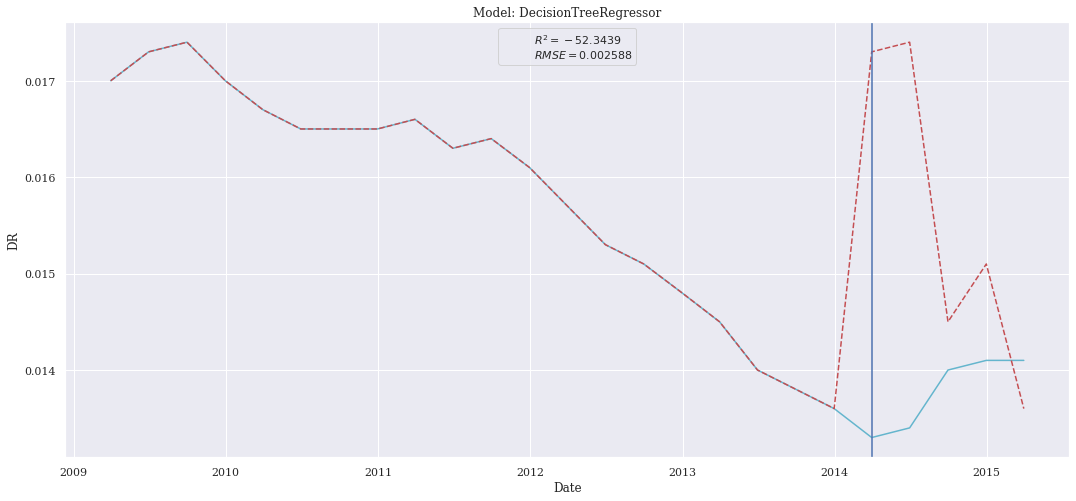

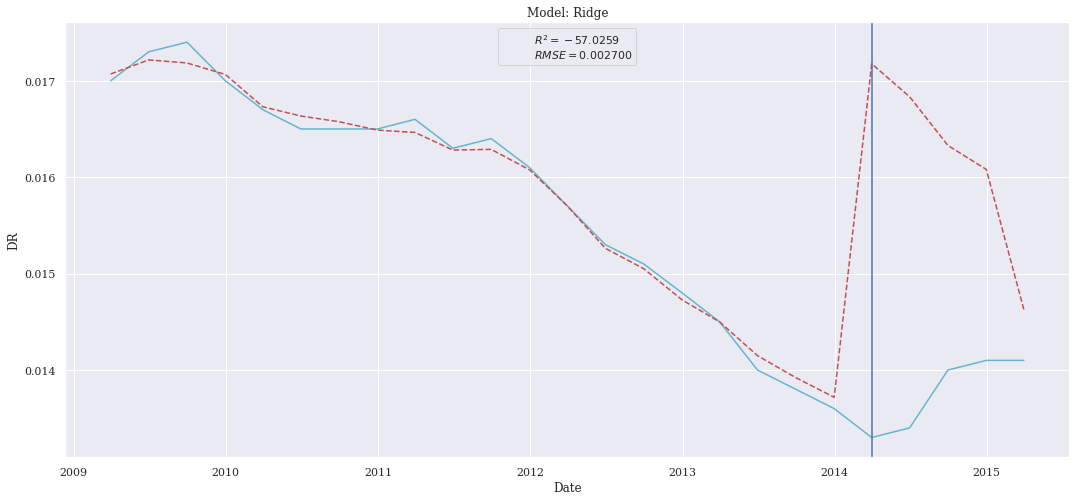

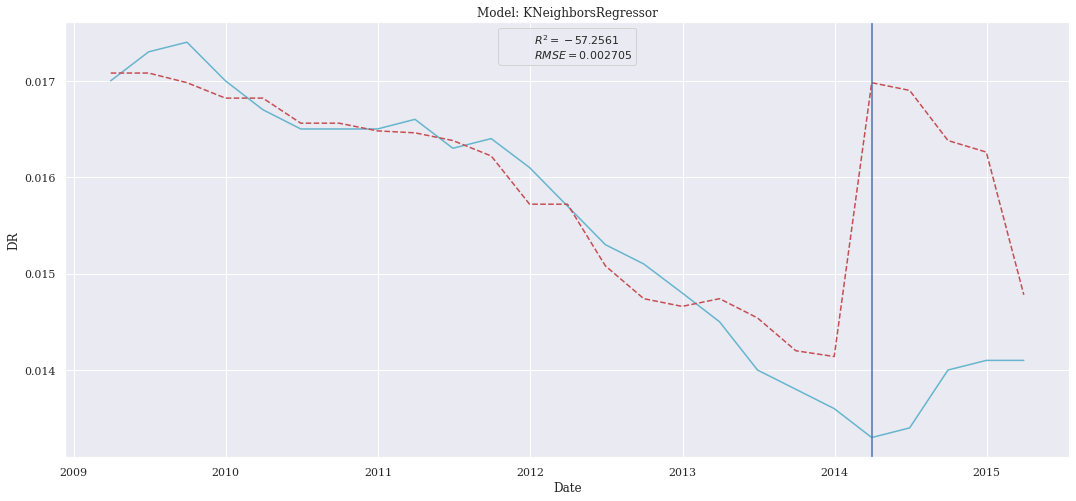

/opt/anaconda3/envs/cvxpy_env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/envs/cvxpy_env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


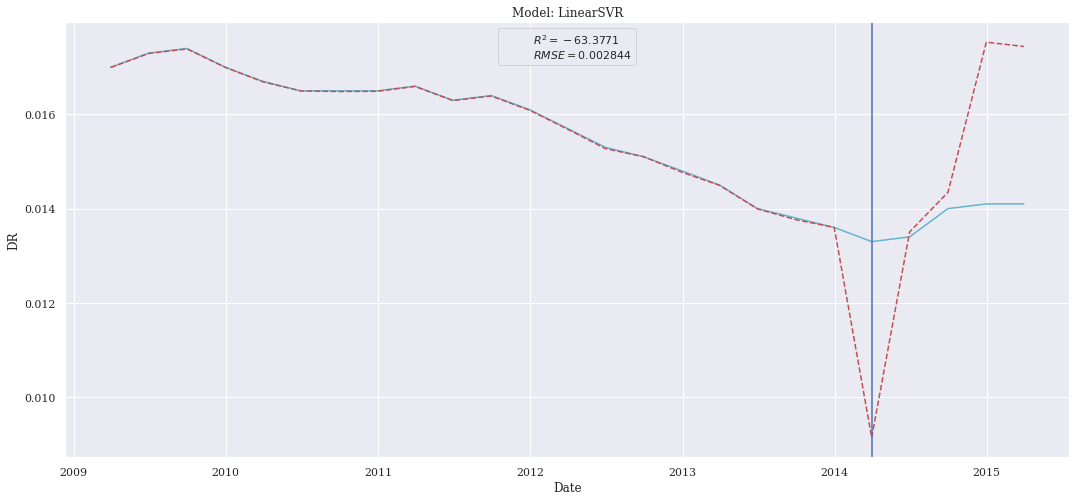

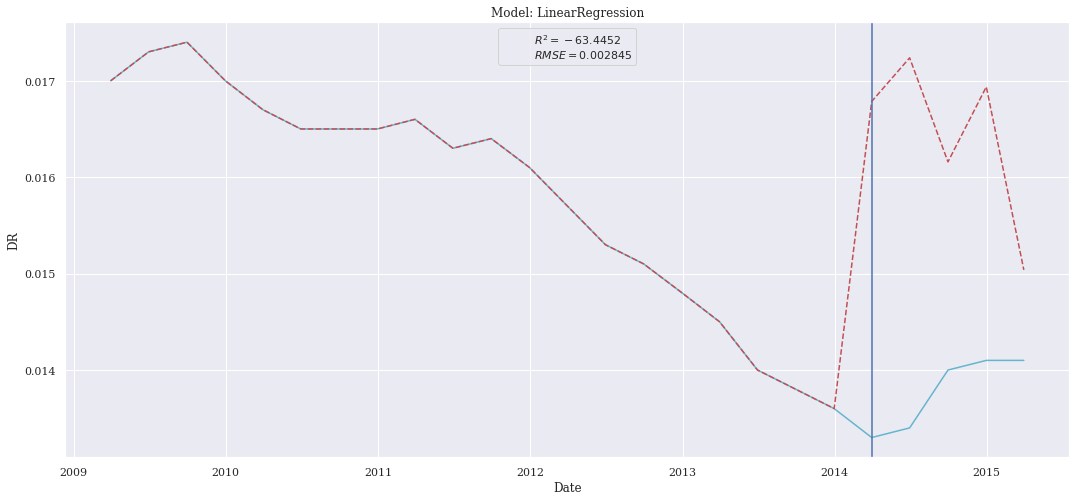

In [ ]:
for i in range(summary.shape[0]): 
  y_train_pred = y_pred(X_train,y_train,X_train,y_train,model=summary.index[i])
  y_test_pred = y_pred(X_train,y_train,X_test,y_test,model=summary.index[i])
  plot_pred_detail(y_train,y_test,y_train_pred,y_test_pred,index,name_model=summary.index[i],df_score=summary)

### SelectFromModel Features

In [ ]:
X_train, X_test, y_train, y_test,X_validation = clean_data(data,start,chronique=chronique,period=period,col_used=cl.col_totale_sfm,split=split,norm=norm)
summary = summary_ml(X_train,y_train,X_test,y_test)
summary

[14:46:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


rmse       mse       mae         r2
Index                                                         
LinearSVR              0.001774  0.000003  0.001555 -17.550539
KNeighborsRegressor    0.001999  0.000004  0.001988 -22.572170
Ridge                  0.002136  0.000005  0.002075 -25.890414
CatBoostRegressor      0.002191  0.000005  0.002175 -27.302359
LinearRegression       0.002302  0.000005  0.001939 -30.248124
DecisionTreeRegressor  0.002628  0.000007  0.002500 -39.719340
XGBRegressor           0.002660  0.000007  0.002576 -40.703862

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


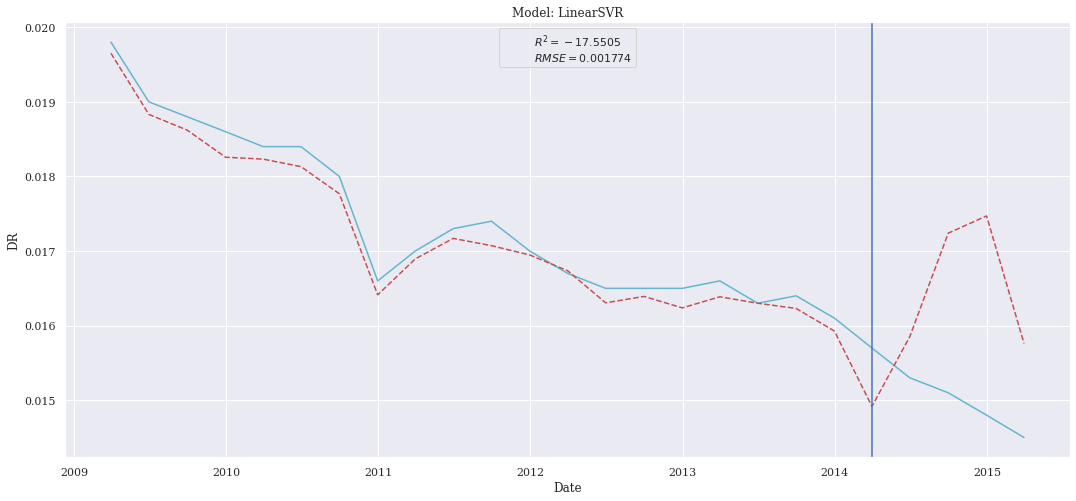

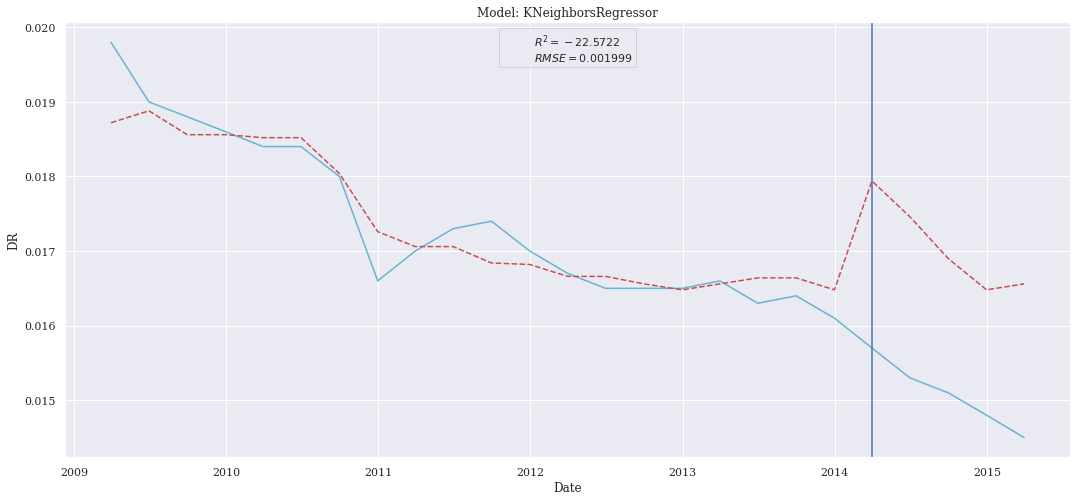

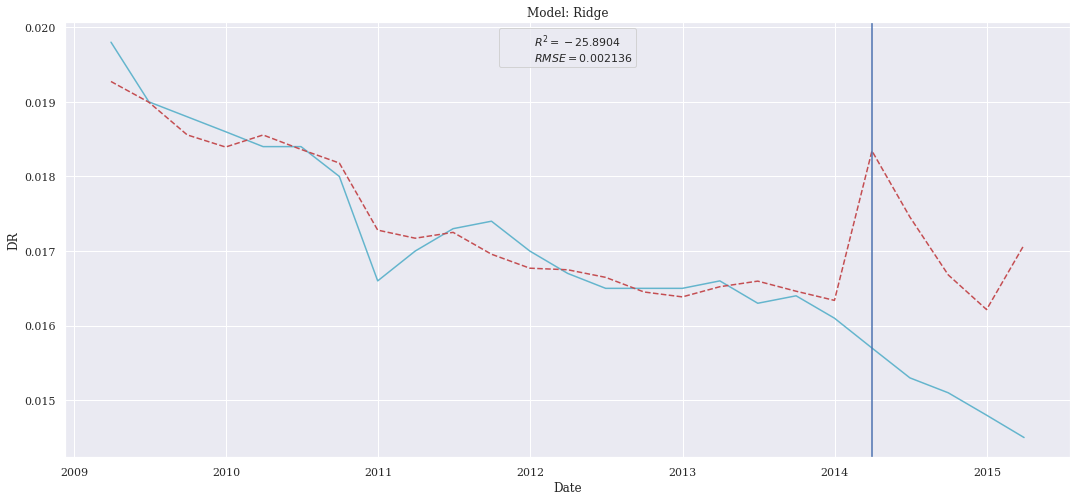

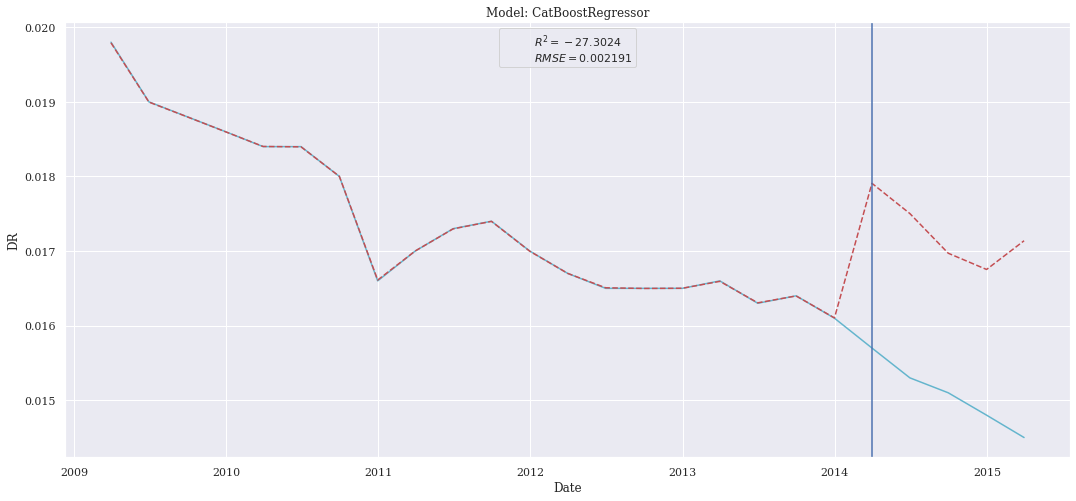

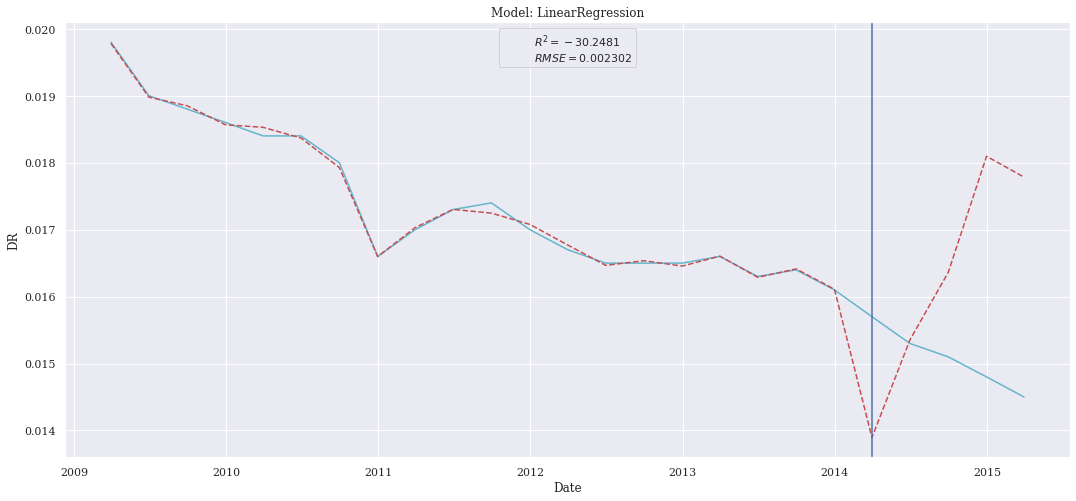

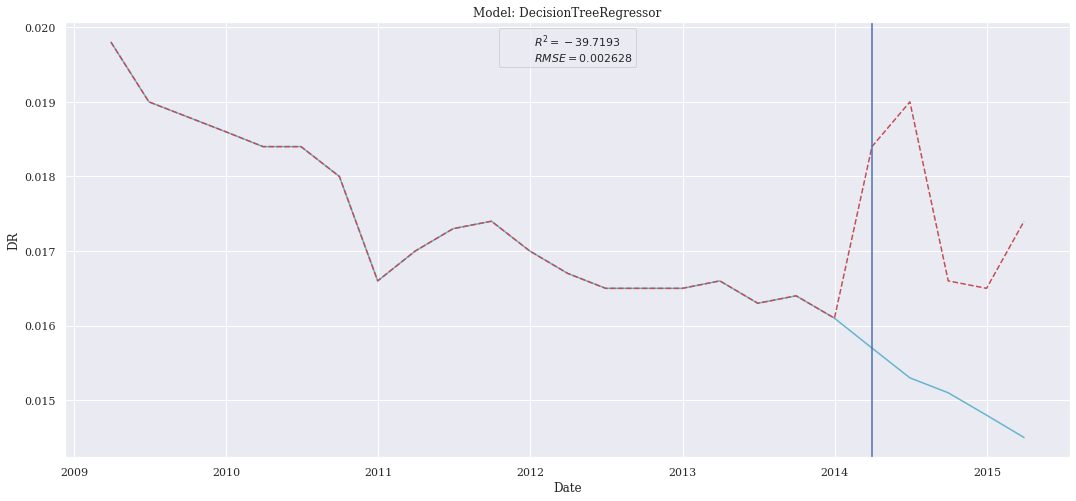

[14:47:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:47:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


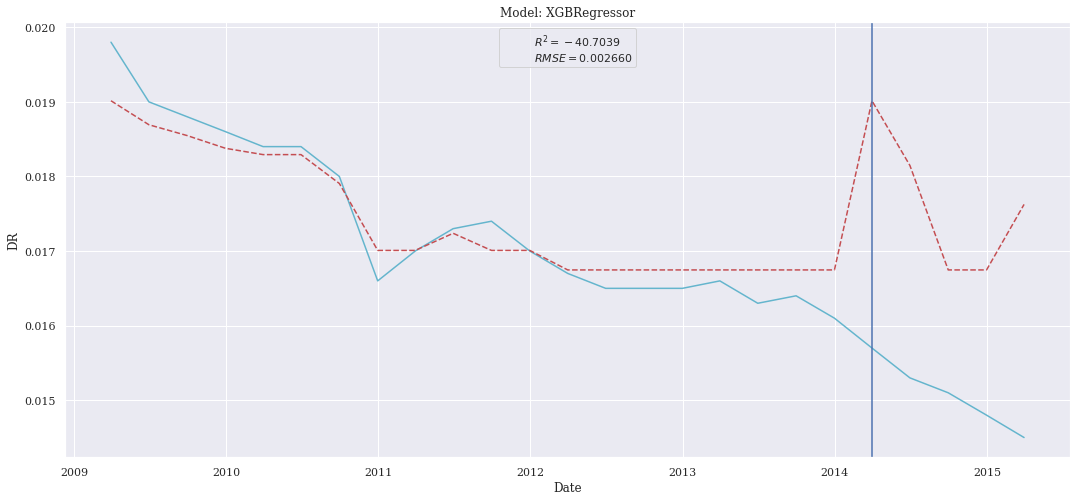

In [ ]:
for i in range(summary.shape[0]): 
  y_train_pred = y_pred(X_train,y_train,X_train,y_train,model=summary.index[i])
  y_test_pred = y_pred(X_train,y_train,X_test,y_test,model=summary.index[i])
  plot_pred_detail(y_train,y_test,y_train_pred,y_test_pred,index,name_model=summary.index[i],df_score=summary)

### Tree-Based Features

In [ ]:
X_train, X_test, y_train, y_test,X_validation = clean_data(data,start,chronique=chronique,period=period,col_used=cl.col_totale_tree,split=split,norm=norm)
summary = summary_ml(X_train,y_train,X_test,y_test)
summary

[14:47:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


rmse       mse       mae         r2
Index                                                         
KNeighborsRegressor    0.002479  0.000006  0.002428 -35.227830
CatBoostRegressor      0.002480  0.000006  0.002479 -35.275304
Ridge                  0.002503  0.000006  0.002490 -35.926890
XGBRegressor           0.002710  0.000007  0.002674 -42.305116
DecisionTreeRegressor  0.003090  0.000010  0.002900 -55.308962
LinearRegression       0.003758  0.000014  0.003704 -82.276351
LinearSVR              0.003901  0.000015  0.003391 -88.719347

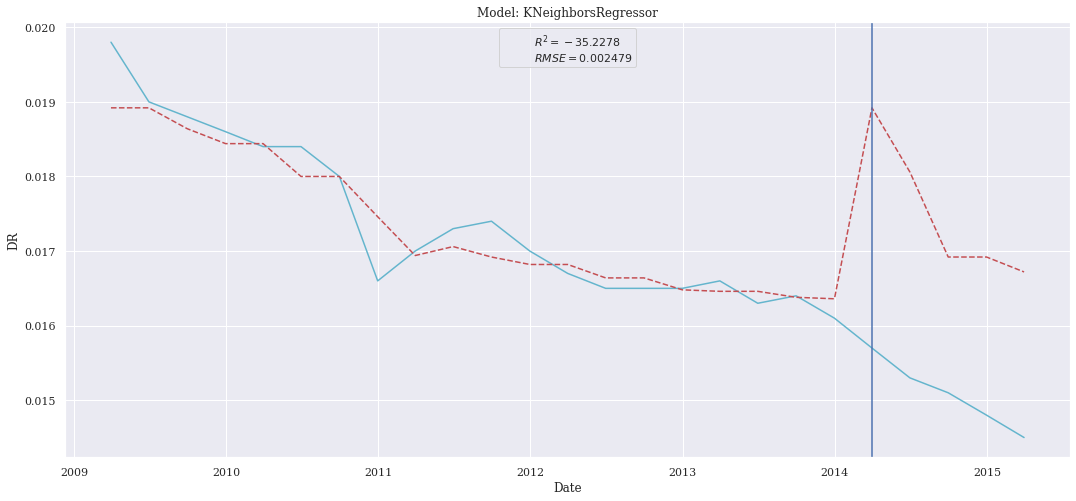

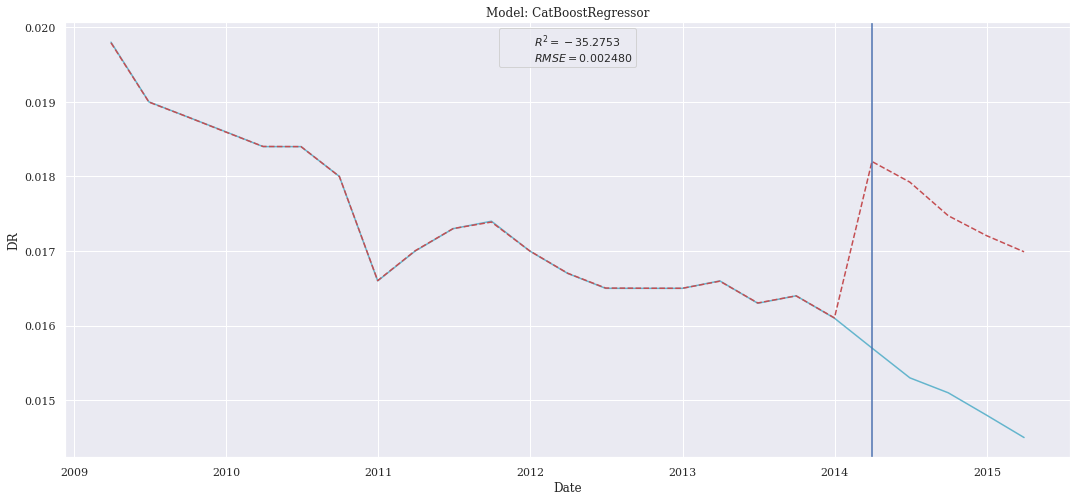

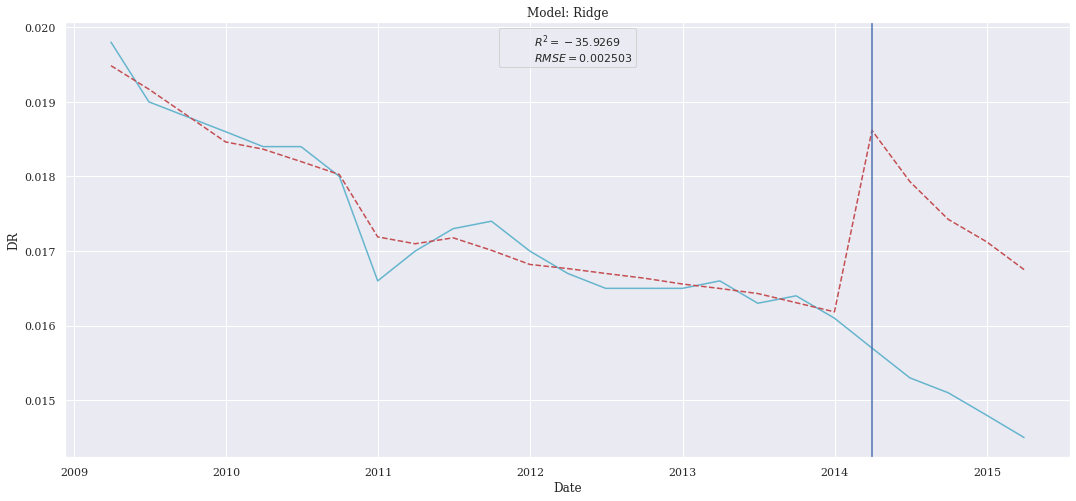

[14:47:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:47:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


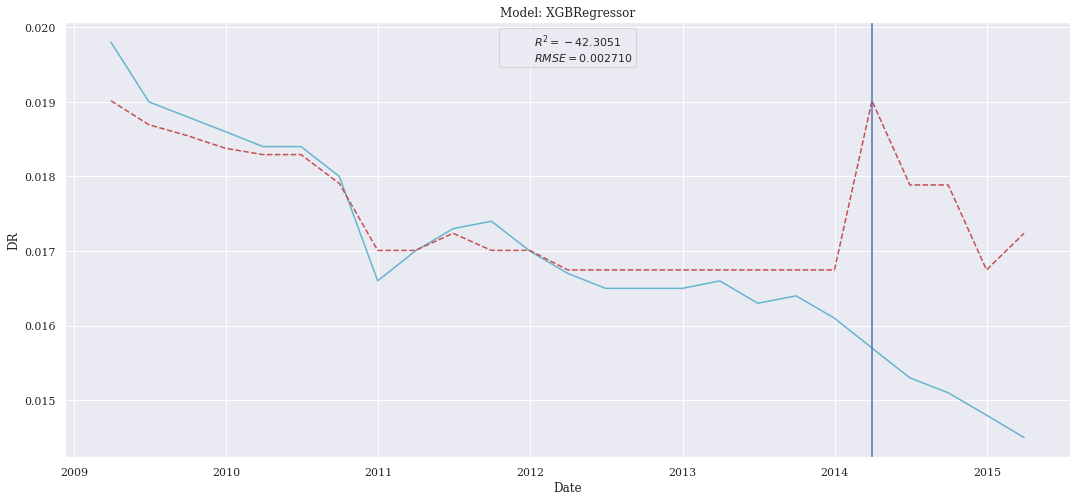

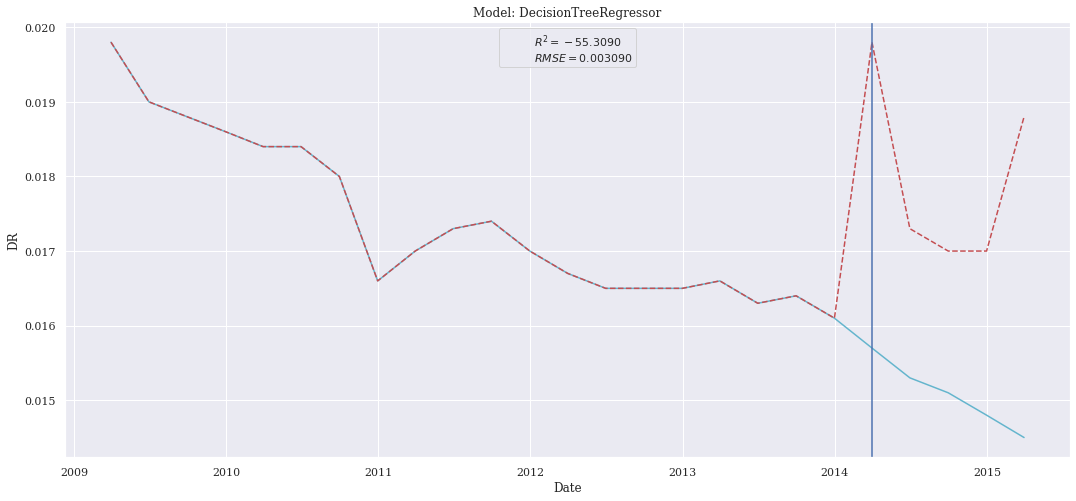

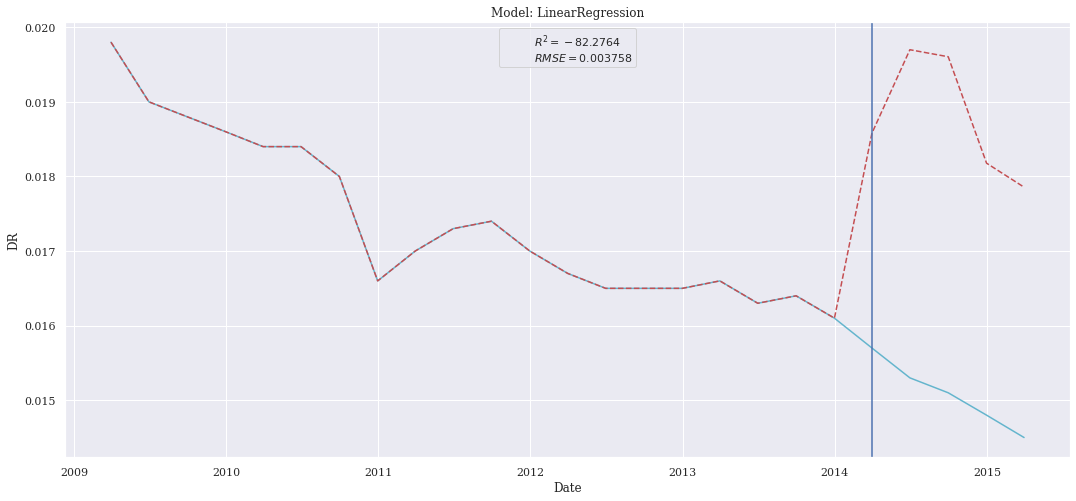

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


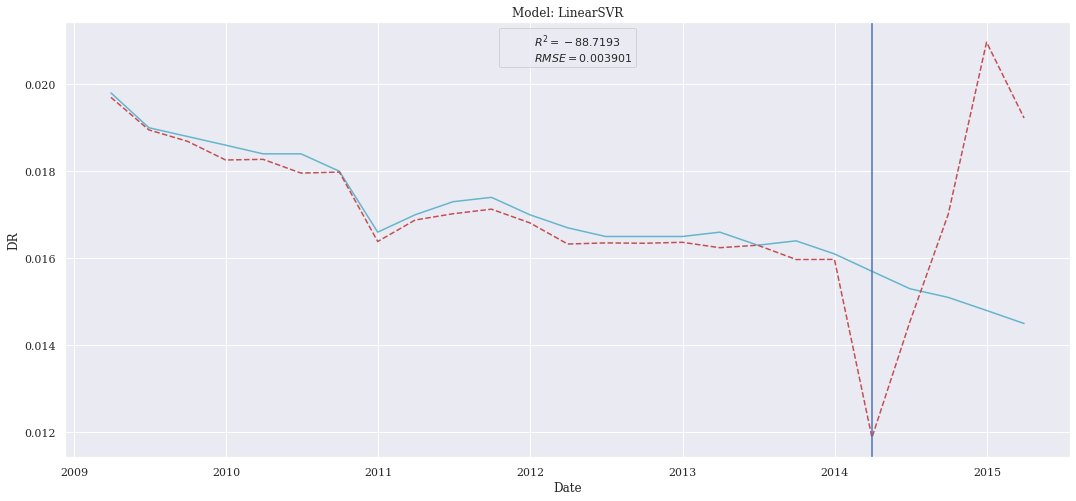

In [ ]:
for i in range(summary.shape[0]): 
  y_train_pred = y_pred(X_train,y_train,X_train,y_train,model=summary.index[i])
  y_test_pred = y_pred(X_train,y_train,X_test,y_test,model=summary.index[i])
  plot_pred_detail(y_train,y_test,y_train_pred,y_test_pred,index,name_model=summary.index[i],df_score=summary)

### Sequential Forward Features

In [ ]:
X_train, X_test, y_train, y_test,X_validation = clean_data(data,start,chronique=chronique,period=period,col_used=cl.col_totale_seq_for,split=split,norm=norm)
summary = summary_ml(X_train,y_train,X_test,y_test)
summary

[14:47:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


rmse       mse       mae         r2
Index                                                         
LinearSVR              0.001922  0.000004  0.001611 -20.790246
KNeighborsRegressor    0.002354  0.000006  0.002332 -31.674057
CatBoostRegressor      0.002598  0.000007  0.002582 -38.785177
XGBRegressor           0.002629  0.000007  0.002568 -39.756236
Ridge                  0.002818  0.000008  0.002792 -45.833657
DecisionTreeRegressor  0.002896  0.000008  0.002720 -48.433962
LinearRegression       0.003561  0.000013  0.003494 -73.754251

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


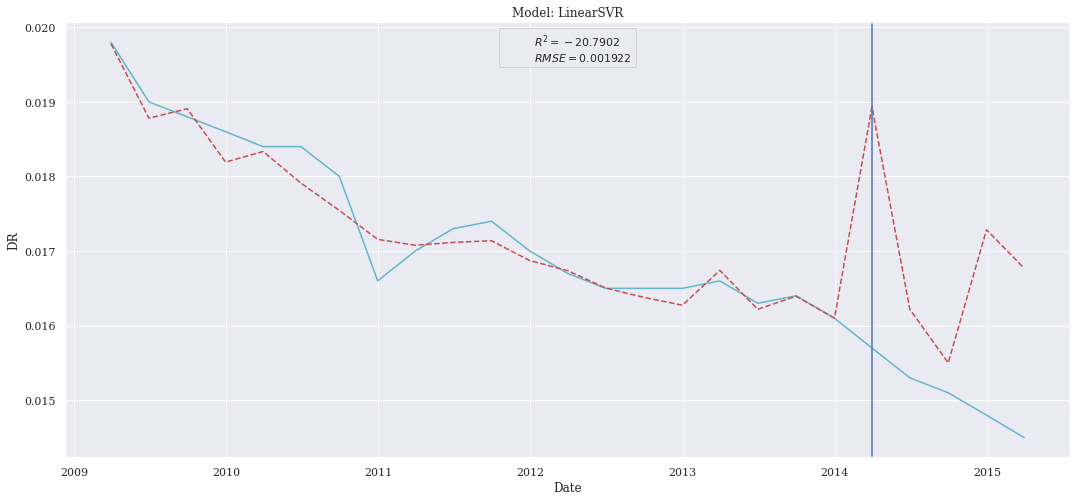

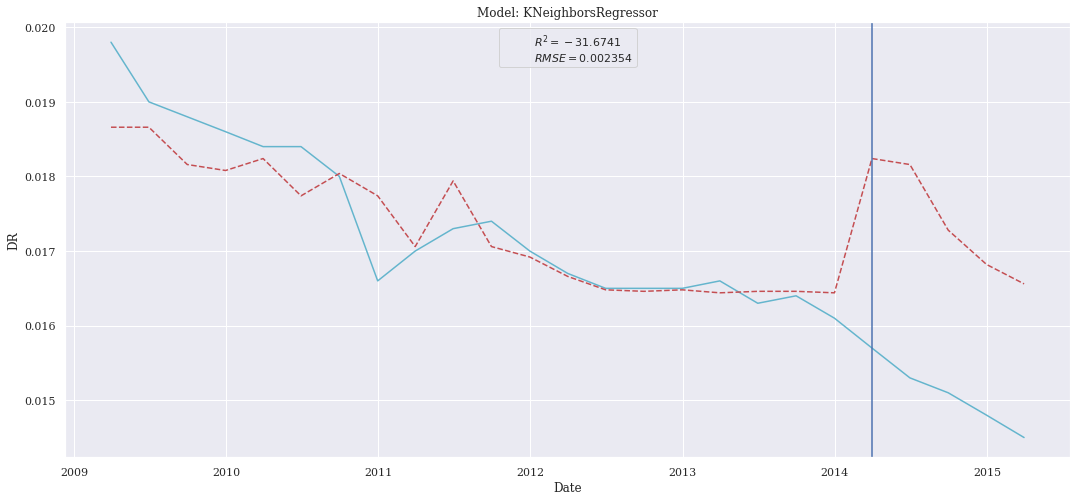

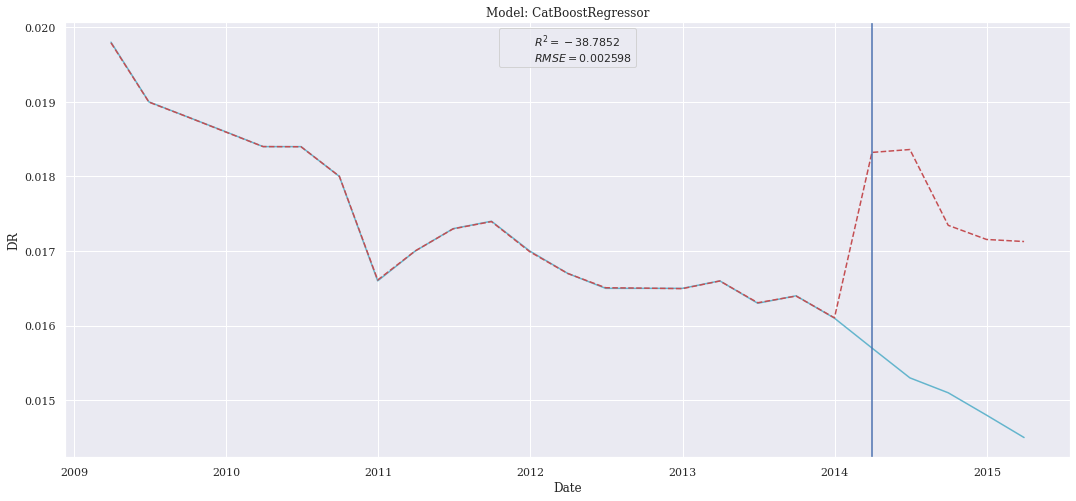

[14:47:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:47:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


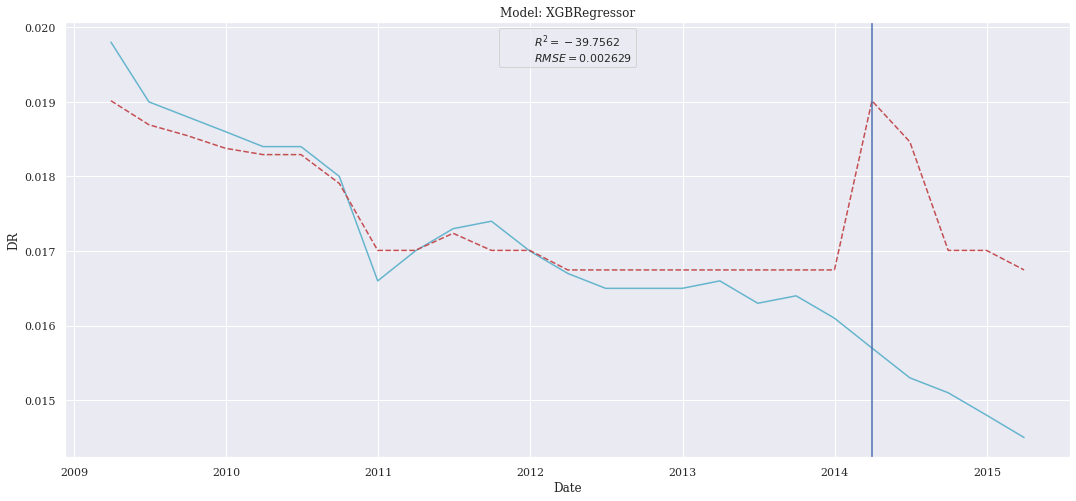

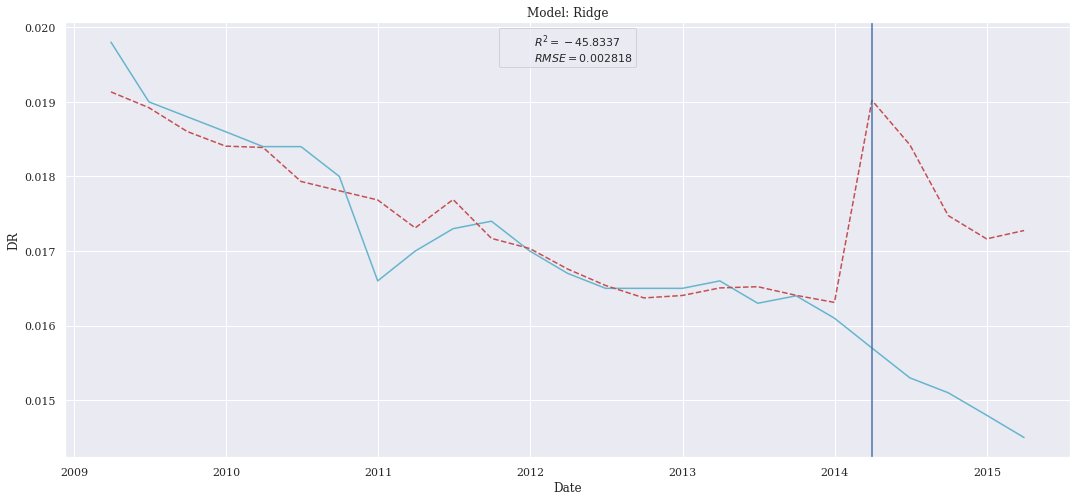

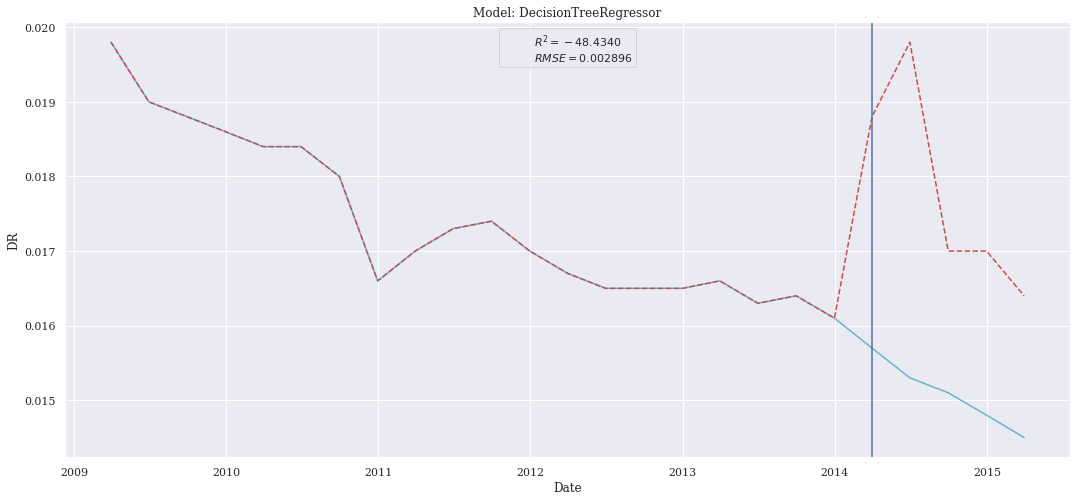

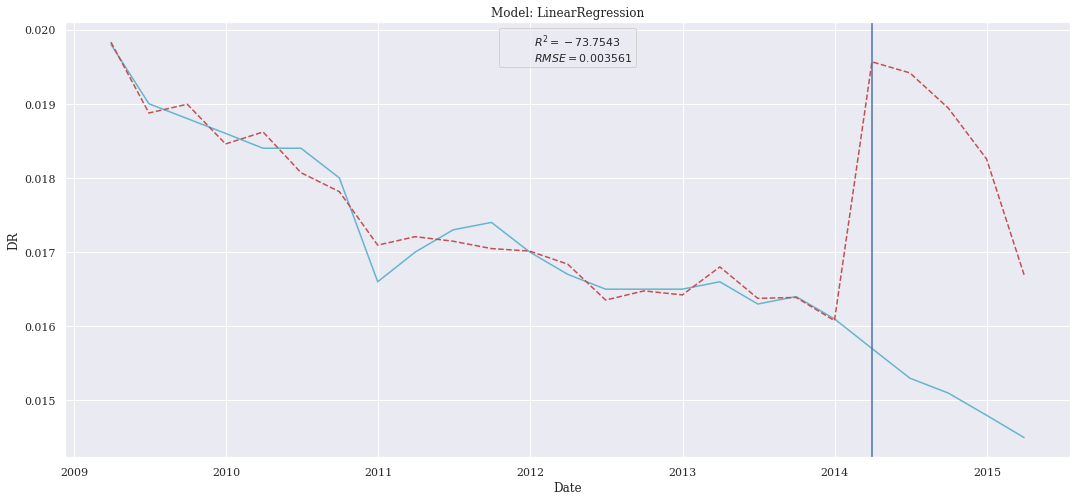

In [ ]:
for i in range(summary.shape[0]):
  y_train_pred = y_pred(X_train,y_train,X_train,y_train,model=summary.index[i])
  y_test_pred = y_pred(X_train,y_train,X_test,y_test,model=summary.index[i])
  plot_pred_detail(y_train,y_test,y_train_pred,y_test_pred,index,name_model=summary.index[i],df_score=summary)

### Sequential Backward Features

In [ ]:
X_train, X_test, y_train, y_test,X_validation = clean_data(data,start,chronique=chronique,period=period,col_used=cl.col_totale_seq_bac,split=split,norm=norm)
summary = summary_ml(X_train,y_train,X_test,y_test)
summary

[14:47:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


rmse       mse       mae         r2
Index                                                         
LinearRegression       0.002280  0.000005  0.001650 -29.651166
KNeighborsRegressor    0.002366  0.000006  0.002316 -31.996698
CatBoostRegressor      0.002390  0.000006  0.002369 -32.690870
XGBRegressor           0.002611  0.000007  0.002533 -39.205808
Ridge                  0.002654  0.000007  0.002555 -40.533190
DecisionTreeRegressor  0.003023  0.000009  0.002840 -52.867925
LinearSVR              0.003503  0.000012  0.002466 -71.333519

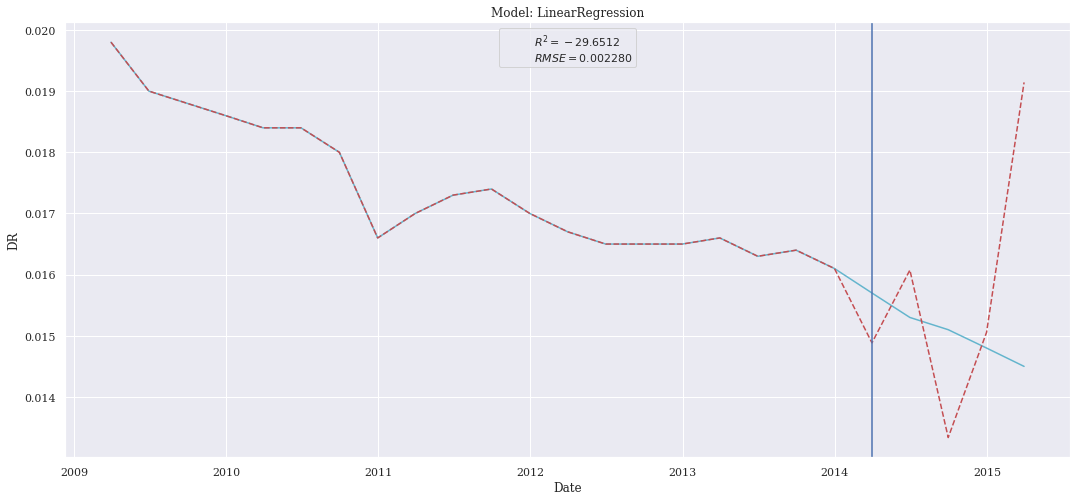

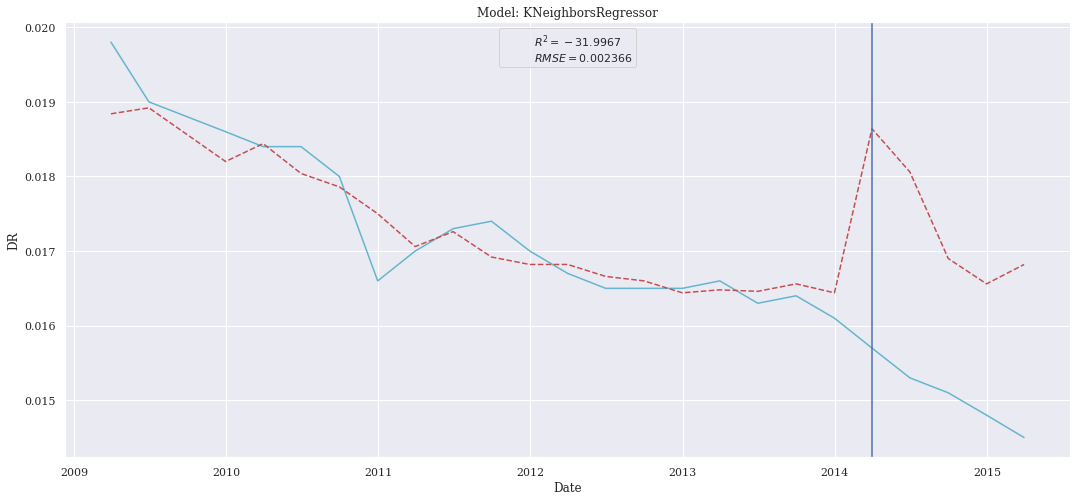

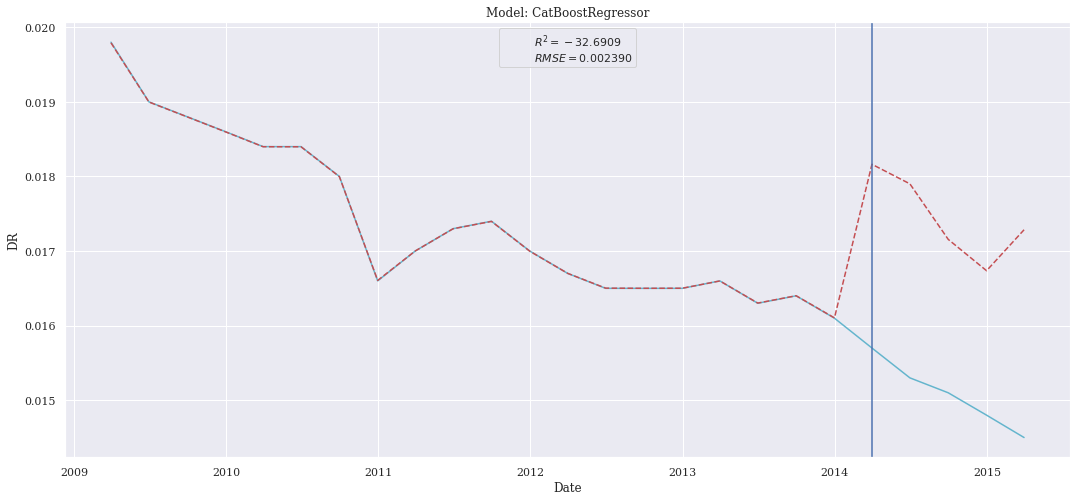

[14:47:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:47:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


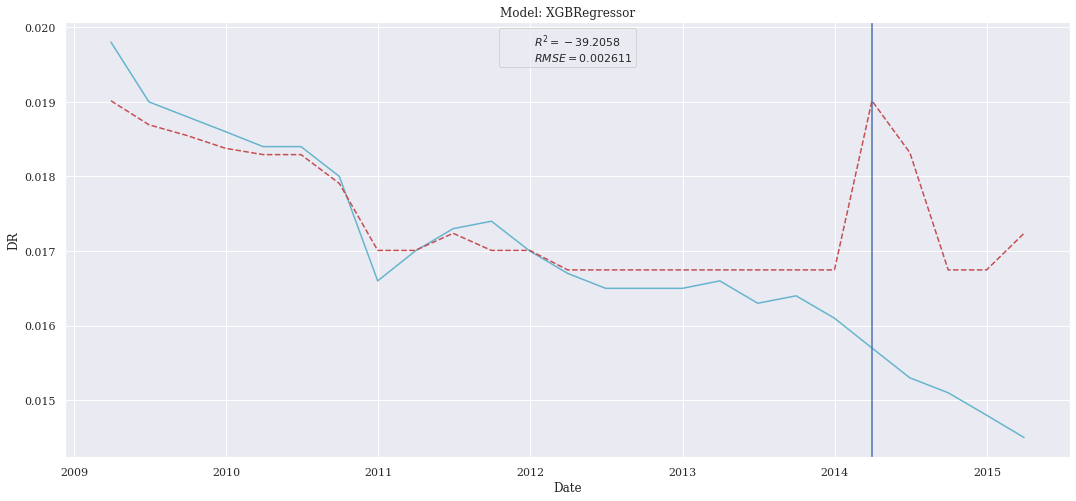

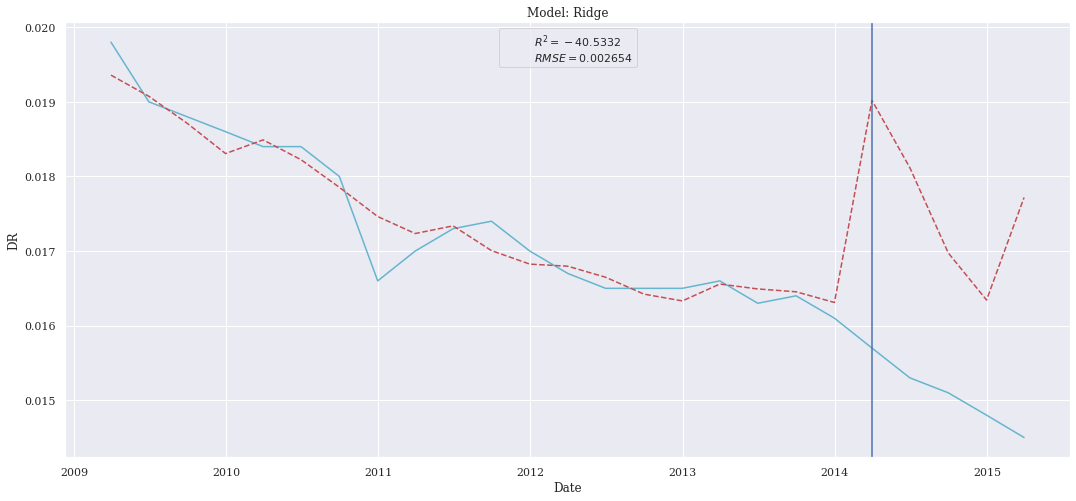

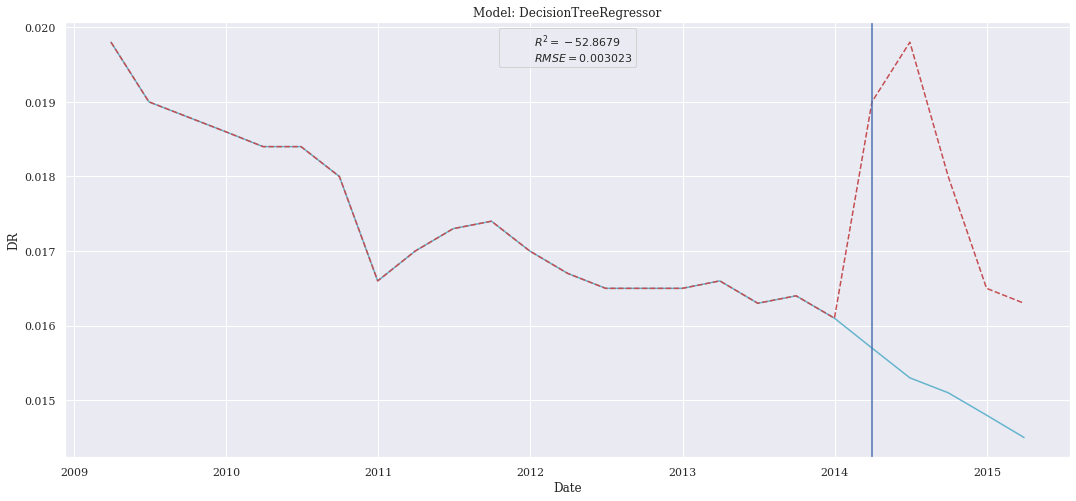

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


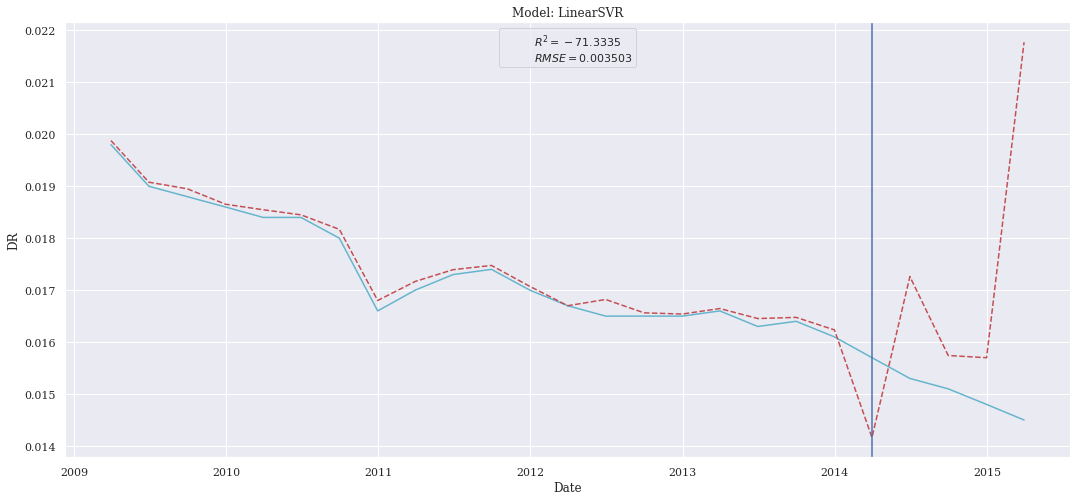

In [ ]:
for i in range(summary.shape[0]):
  y_train_pred = y_pred(X_train,y_train,X_train,y_train,model=summary.index[i])
  y_test_pred = y_pred(X_train,y_train,X_test,y_test,model=summary.index[i])
  plot_pred_detail(y_train,y_test,y_train_pred,y_test_pred,index[start:],name_model=summary.index[i],df_score=summary)

## First Conclusion
The SelectFromModel features and Recursive Features seems to give the most promising results. We will use the Knn, LinearSVR, and DecisionTree in order to design our solution.

### GridSearch on KNeighborsRegressor

In [ ]:
X_train, X_test, y_train, y_test = clean_data(data,start,b"Totale",col_used=cl.col_totale_sfm,split=split,norm=norm)
params_knr = {"n_neighbors":[1,2,3,4,5,6,7,8,9,10],"weights":["uniform"],"algorithm":["auto","ball_tree","kd_tree","brute"],"p":[1,2],"leaf_size":[1,2,3,4,5,10,20,30,40,50]}
params,score = params_grid(X_train,y_train,X_test,y_test,"knn",params_knr,metric="r2")
print(params,score)

Fitting 2 folds for each of 800 candidates, totalling 1600 fits
{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'} -21.075471698113088


In [ ]:
summary = summary_ml(X_train,y_train,X_test,y_test,models=["knn"],parameters={"p_knn":params})
summary

rmse       mse      mae         r2
Index                                                      
KNeighborsRegressor  0.001935  0.000004  0.00188 -21.075472

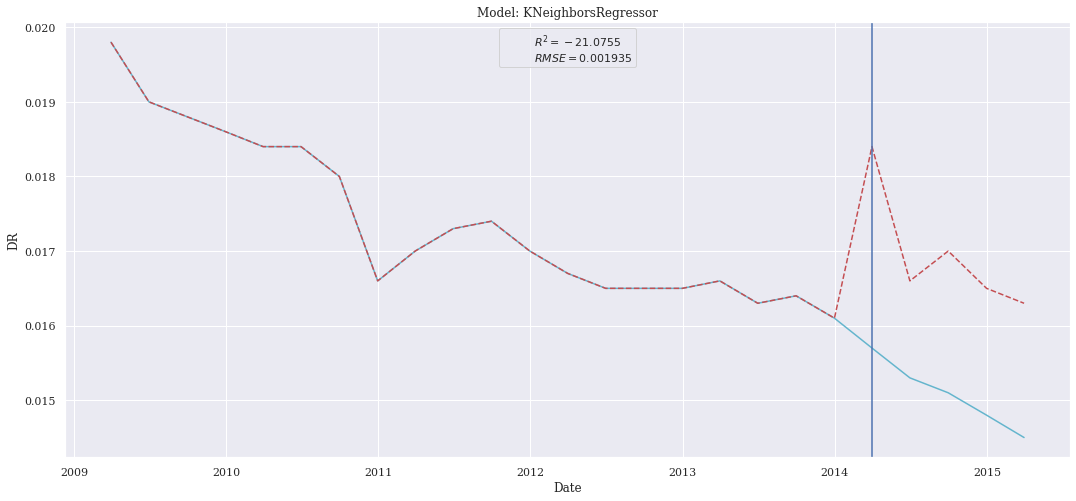

In [ ]:
y_train_pred = y_pred(X_train,y_train,X_train,y_train,model=summary.index[0],parameters={"p_knn":params})
y_test_pred = y_pred(X_train,y_train,X_test,y_test,model=summary.index[0],parameters={"p_knn":params})
plot_pred_detail(y_train,y_test,y_train_pred,y_test_pred,index[start:],name_model=summary.index[0],df_score=summary)

### GridSearch on LinearSVR

In [ ]:
X_train, X_test, y_train, y_test = clean_data(data,start,b"Totale",col_used=cl.col_totale_sfm,split=split,norm=norm)
params_svr = {"epsilon":[0,0.1,0.2],"C":[1,0.7,0.3,0.1],"loss":["epsilon_insensitive","squared_epsilon_insensitive"],"intercept_scaling":[1,5,10,15]}
params,score = params_grid(X_train,y_train,X_test,y_test,"svr",params_svr,metric="r2")
print(params,score)

Fitting 2 folds for each of 96 candidates, totalling 192 fits


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

{'C': 0.1, 'epsilon': 0, 'intercept_scaling': 15, 'loss': 'epsilon_insensitive'} -16.266772787877898


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
summary = summary_ml(X_train,y_train,X_test,y_test,models=["svr"],parameters={"p_svr":params})
summary

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


rmse       mse       mae         r2
Index                                             
LinearSVR  0.001944  0.000004  0.001878 -21.279233

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


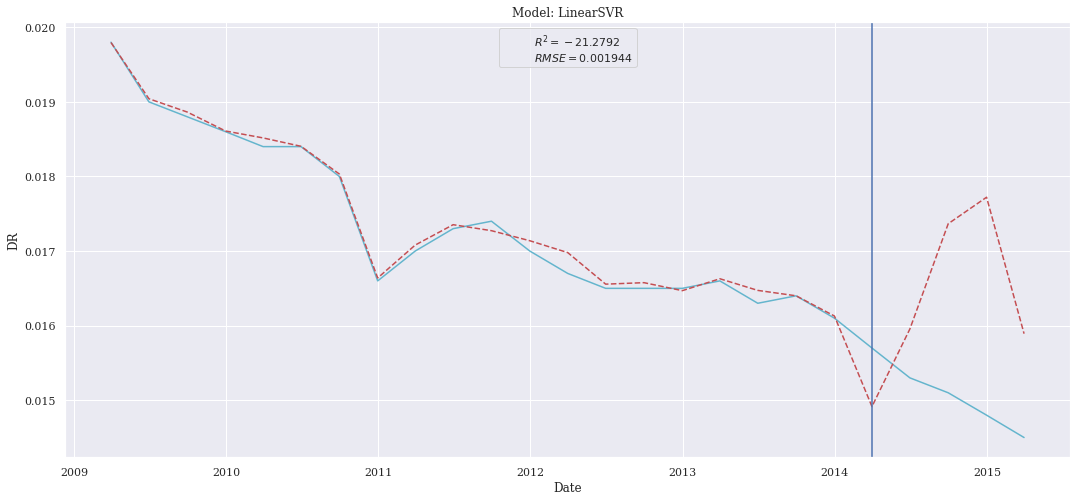

In [ ]:
y_train_pred = y_pred(X_train,y_train,X_train,y_train,model=summary.index[0],parameters={"p_knn":params})
y_test_pred = y_pred(X_train,y_train,X_test,y_test,model=summary.index[0],parameters={"p_knn":params})
plot_pred_detail(y_train,y_test,y_train_pred,y_test_pred,index[start:],name_model=summary.index[0],df_score=summary)

### GridSearch on DecisionTree

In [ ]:
X_train, X_test, y_train, y_test = clean_data(data,start,b"Totale",col_used=cl.col_totale_recur,split=split,norm=norm)
params_tre = {"criterion":["squared_error","friedman_mse","absolute_error","poisson"],"splitter":["best"],"max_features":["auto","sqrt","log2"]}
params,score = params_grid(X_train,y_train,X_test,y_test,"tre",parameters=params_tre,metric='r2')
print(params,score)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
{'criterion': 'poisson', 'max_features': 'auto', 'splitter': 'best'} -12.573113207547093


In [ ]:
summary = summary_ml(X_train,y_train,X_test,y_test,models=["tre"],parameters={"p_tre":params})
summary

rmse       mse      mae         r2
Index                                                        
DecisionTreeRegressor  0.001517  0.000002  0.00146 -12.573113

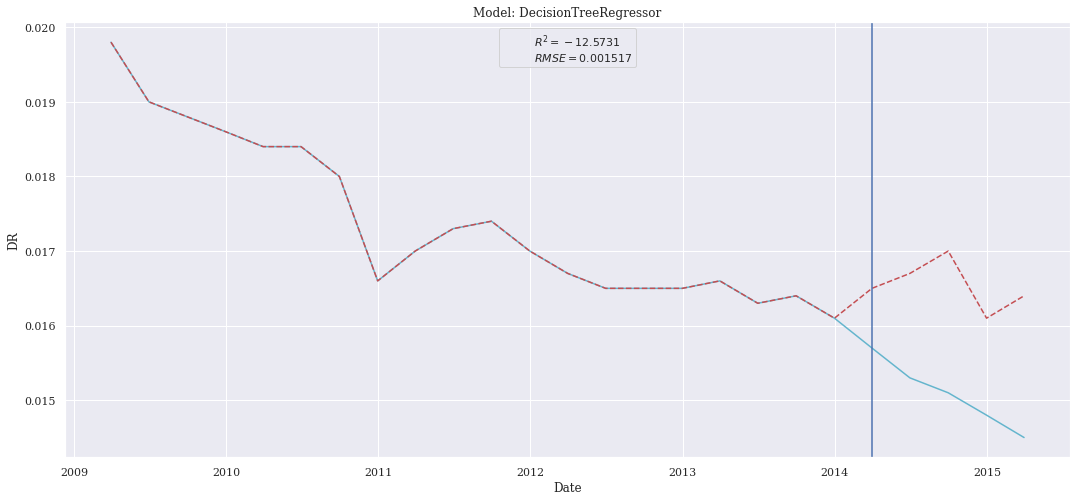

In [ ]:
y_train_pred = y_pred(X_train,y_train,X_train,y_train,model=summary.index[0],parameters={"p_tre":params})
y_test_pred = y_pred(X_train,y_train,X_test,y_test,model=summary.index[0],parameters={"p_tre":params})
plot_pred_detail(y_train,y_test,y_train_pred,y_test_pred,index[start:],name_model=summary.index[0],df_score=summary)

## Final Conclusion
Grid Search is relevant for the DecisionTree model but not for the others. With the Grid we obtain a r2 equals to -12.57 against 15.38 before GridSearch. Concerning the rmse is now 0.001517 against 0.001667.